## Project: Telecom Churn Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from scipy import stats
from sklearn.metrics import confusion_matrix, accuracy_score
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
%matplotlib inline

In [541]:
import warnings
warnings.filterwarnings('ignore')

In [542]:
# increasing the maximum number of rows and columns displayable to 300
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [543]:
data = pd.read_csv("telecom_churn_data.csv", na_values="NAN")

In [544]:
data.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [545]:
data.shape

(99999, 226)

In [546]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Missing Value Treatment ###

In [547]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(20)

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)


missing_data

,Total,Percent
count_rech_2g_6,74846,74.846748
date_of_last_rech_data_6,74846,74.846748
count_rech_3g_6,74846,74.846748
av_rech_amt_data_6,74846,74.846748
max_rech_data_6,74846,74.846748
total_rech_data_6,74846,74.846748
arpu_3g_6,74846,74.846748
arpu_2g_6,74846,74.846748
night_pck_user_6,74846,74.846748
fb_user_6,74846,74.846748


### Imputing with zero ####

In [548]:
#you can find these features on the description data file provided

zero_imputation = ["count_rech_2g_6","count_rech_3g_6","count_rech_2g_7","count_rech_3g_7","count_rech_2g_9","count_rech_3g_9","count_rech_3g_8","count_rech_2g_8"]

for i in zero_imputation:
    data[i].fillna(0, inplace=True)

In [549]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(20)

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)


missing_data

,Total,Percent
arpu_3g_6,74846,74.846748
total_rech_data_6,74846,74.846748
av_rech_amt_data_6,74846,74.846748
max_rech_data_6,74846,74.846748
arpu_2g_6,74846,74.846748
night_pck_user_6,74846,74.846748
fb_user_6,74846,74.846748
date_of_last_rech_data_6,74846,74.846748
max_rech_data_7,74428,74.428744
night_pck_user_7,74428,74.428744


### Impute recharge amount to zero if both 2G and 3G count is zero ###

In [550]:
data.loc[(data['total_rech_data_6'].isnull()) & (data['count_rech_2g_6']==0) & (data['count_rech_3g_6']==0),'total_rech_data_6'] = 0
data.loc[(data['total_rech_data_7'].isnull()) & (data['count_rech_2g_7']==0) & (data['count_rech_3g_7']==0),'total_rech_data_7'] = 0
data.loc[(data['total_rech_data_8'].isnull()) & (data['count_rech_2g_8']==0) & (data['count_rech_3g_8']==0),'total_rech_data_8'] = 0
data.loc[(data['total_rech_data_9'].isnull()) & (data['count_rech_2g_9']==0) & (data['count_rech_3g_9']==0),'total_rech_data_9'] = 0

In [551]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(20)

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)


missing_data

,Total,Percent
arpu_3g_6,74846,74.846748
fb_user_6,74846,74.846748
arpu_2g_6,74846,74.846748
max_rech_data_6,74846,74.846748
date_of_last_rech_data_6,74846,74.846748
av_rech_amt_data_6,74846,74.846748
night_pck_user_6,74846,74.846748
fb_user_7,74428,74.428744
arpu_2g_7,74428,74.428744
av_rech_amt_data_7,74428,74.428744


### Dropping Columns having high percentage of missing values ###

In [552]:
data.shape

(99999, 226)

In [553]:
cols_high_missing=['arpu_3g_6','fb_user_6','arpu_2g_6','max_rech_data_6','date_of_last_rech_data_6','av_rech_amt_data_6','night_pck_user_6','arpu_3g_7','fb_user_7','arpu_2g_7','max_rech_data_7','date_of_last_rech_data_7','av_rech_amt_data_7','night_pck_user_7','arpu_3g_8','fb_user_8','arpu_2g_8','max_rech_data_8','date_of_last_rech_data_8','av_rech_amt_data_8','night_pck_user_8','arpu_3g_9','fb_user_9','arpu_2g_9','max_rech_data_9','date_of_last_rech_data_9','av_rech_amt_data_9','night_pck_user_9']

In [554]:
for i in cols_high_missing:
    data.drop(i,axis=1,inplace=True)

In [555]:
data.shape

(99999, 198)

In [556]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(20)

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)


missing_data

,Total,Percent
loc_ic_t2t_mou_9,7745,7.745077
ic_others_9,7745,7.745077
offnet_mou_9,7745,7.745077
std_og_t2c_mou_9,7745,7.745077
roam_ic_mou_9,7745,7.745077
spl_ic_mou_9,7745,7.745077
isd_ic_mou_9,7745,7.745077
roam_og_mou_9,7745,7.745077
loc_og_t2t_mou_9,7745,7.745077
og_others_9,7745,7.745077


In [557]:
cols_9=['loc_ic_t2t_mou_9','ic_others_9','offnet_mou_9','std_og_t2c_mou_9','roam_ic_mou_9','spl_ic_mou_9','isd_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9','og_others_9','loc_ic_t2m_mou_9','std_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_ic_t2f_mou_9','std_og_t2m_mou_9','isd_og_mou_9','std_ic_mou_9','std_ic_t2t_mou_9','std_og_mou_9','std_ic_t2o_mou_9','loc_ic_mou_9','std_og_t2f_mou_9','spl_og_mou_9','std_ic_t2f_mou_9','onnet_mou_9','std_ic_t2m_mou_9']

In [558]:
for i in cols_9:
    data[i].fillna(data[i].median(),inplace=True)

In [559]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(20)

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)


missing_data

,Total,Percent
og_others_8,5378,5.378054
std_ic_t2f_mou_8,5378,5.378054
roam_og_mou_8,5378,5.378054
std_ic_t2t_mou_8,5378,5.378054
loc_og_t2t_mou_8,5378,5.378054
std_og_mou_8,5378,5.378054
loc_og_t2m_mou_8,5378,5.378054
std_ic_t2m_mou_8,5378,5.378054
loc_og_t2f_mou_8,5378,5.378054
loc_og_t2c_mou_8,5378,5.378054


In [560]:
cols_8=['og_others_8','std_ic_t2f_mou_8','roam_og_mou_8','std_ic_t2t_mou_8','loc_og_t2t_mou_8','std_og_mou_8','loc_og_t2m_mou_8','std_ic_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_mou_8','loc_og_mou_8','roam_ic_mou_8','std_ic_t2o_mou_8','std_og_t2t_mou_8','loc_og_t2c_mou_9','std_ic_mou_8','std_og_t2m_mou_8','std_og_t2c_mou_8','ic_others_8','isd_ic_mou_8','std_og_t2f_mou_8','spl_ic_mou_8','loc_ic_t2t_mou_8','isd_og_mou_8','offnet_mou_8','loc_ic_t2m_mou_8','spl_og_mou_8','loc_ic_t2f_mou_8','onnet_mou_8','loc_ic_mou_8']

In [561]:
for i in cols_8:
    data[i].fillna(data[i].median(),inplace=True)

In [562]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(20)

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)


missing_data

,Total,Percent
date_of_last_rech_9,4760,4.760048
offnet_mou_6,3937,3.937039
roam_og_mou_6,3937,3.937039
std_ic_t2o_mou_6,3937,3.937039
roam_ic_mou_6,3937,3.937039
isd_og_mou_6,3937,3.937039
std_ic_mou_6,3937,3.937039
loc_og_mou_6,3937,3.937039
ic_others_6,3937,3.937039
loc_og_t2c_mou_6,3937,3.937039


In [563]:
cols_6=['offnet_mou_6','roam_og_mou_6','std_ic_t2o_mou_6','roam_ic_mou_6','isd_og_mou_6','std_ic_mou_6','isd_og_mou_6','std_ic_mou_6','loc_og_mou_6','ic_others_6','loc_og_t2c_mou_6','ic_others_6','loc_og_t2c_mou_6','std_og_mou_6','loc_og_t2f_mou_6','spl_ic_mou_6','std_og_t2c_mou_6','loc_og_t2m_mou_6','std_og_t2f_mou_6','isd_ic_mou_6','og_others_6','loc_ic_t2f_mou_6','spl_og_mou_6','loc_ic_t2m_mou_6','onnet_mou_6','spl_og_mou_8','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2m_mou_6','std_ic_t2t_mou_6','std_ic_t2f_mou_6','loc_ic_t2t_mou_6','loc_ic_mou_6','std_ic_t2m_mou_6','loc_og_t2t_mou_6']

In [564]:
for i in cols_6:
    data[i].fillna(data[i].median(),inplace=True)

In [565]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(20)

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)


missing_data

,Total,Percent
date_of_last_rech_9,4760,4.760048
loc_ic_mou_7,3859,3.859039
roam_og_mou_7,3859,3.859039
loc_og_t2m_mou_7,3859,3.859039
loc_og_t2f_mou_7,3859,3.859039
loc_og_t2c_mou_7,3859,3.859039
loc_og_mou_7,3859,3.859039
std_og_t2t_mou_7,3859,3.859039
std_og_t2m_mou_7,3859,3.859039
ic_others_7,3859,3.859039


In [566]:
cols_7=['loc_ic_mou_7','roam_og_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','ic_others_7','isd_ic_mou_7','std_og_t2c_mou_7','spl_ic_mou_7','isd_og_mou_7','std_ic_mou_7','spl_og_mou_7','std_ic_t2f_mou_7','spl_og_mou_7','std_ic_t2f_mou_7','og_others_7','std_ic_t2m_mou_7','std_ic_t2t_mou_7','loc_ic_t2t_mou_7','loc_ic_t2f_mou_7','loc_og_t2t_mou_7','loc_ic_t2m_mou_7','roam_ic_mou_7','offnet_mou_7','onnet_mou_7','std_og_t2f_mou_7','std_og_mou_7','std_ic_t2o_mou_7']

In [567]:
for i in cols_7:
    data[i].fillna(data[i].median(),inplace=True)

In [568]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(20)

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)


missing_data

,Total,Percent
date_of_last_rech_9,4760,4.760048
date_of_last_rech_8,3622,3.622036
date_of_last_rech_7,1767,1.767018
last_date_of_month_9,1659,1.659017
date_of_last_rech_6,1607,1.607016
last_date_of_month_8,1100,1.100011
std_og_t2o_mou,1018,1.018010
loc_ic_t2o_mou,1018,1.018010
loc_og_t2o_mou,1018,1.018010
last_date_of_month_7,601,0.601006


In [569]:
cols_others=['std_og_t2o_mou','loc_ic_t2o_mou','loc_og_t2o_mou']

In [570]:
for i in cols_others:
    data[i].fillna(data[i].median(),inplace=True)

In [571]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(20)

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)


missing_data

,Total,Percent
date_of_last_rech_9,4760,4.760048
date_of_last_rech_8,3622,3.622036
date_of_last_rech_7,1767,1.767018
last_date_of_month_9,1659,1.659017
date_of_last_rech_6,1607,1.607016
last_date_of_month_8,1100,1.100011
last_date_of_month_7,601,0.601006
std_og_t2c_mou_7,0,0.000000
std_og_t2c_mou_8,0,0.000000
std_og_t2c_mou_9,0,0.000000


### Drop Date fields ###

In [572]:
cols_date=['date_of_last_rech_9','date_of_last_rech_8','last_date_of_month_9','date_of_last_rech_6','last_date_of_month_8','last_date_of_month_7','date_of_last_rech_7','last_date_of_month_6']

In [573]:
for i in cols_date:
    data.drop(i,axis=1,inplace=True)

In [574]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.510,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.460,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,

In [575]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(20)

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)


missing_data

,Total,Percent
sep_vbc_3g,0,0.0
std_og_t2c_mou_8,0,0.0
isd_og_mou_9,0,0.0
isd_og_mou_8,0,0.0
isd_og_mou_7,0,0.0
isd_og_mou_6,0,0.0
std_og_mou_9,0,0.0
std_og_mou_8,0,0.0
std_og_mou_7,0,0.0
std_og_mou_6,0,0.0


In [576]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 190 entries, mobile_number to sep_vbc_3g
dtypes: float64(155), int64(35)
memory usage: 145.0 MB


### Filtering High Value Customers based on the condition if the Average recharge amount is greater than 70 percentile###

In [577]:
data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=190)

In [578]:
data['Average_Recharge_Amount']=(data['total_rech_amt_6']+data['total_rech_amt_7'])/2

In [579]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_Recharge_Amount
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,307.0
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.510,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.460,0.13,0.00,0.00,

In [580]:
data_high_value_cust=data[data.Average_Recharge_Amount > data.Average_Recharge_Amount.quantile(.70)]

### Deriving Target Variable-Churn Rate ###

In [581]:
data_high_value_cust['Churn']=np.where((data_high_value_cust['total_og_mou_9']==0)&(data_high_value_cust['total_ic_mou_9']==0)&(data_high_value_cust['vol_2g_mb_9']==0)&(data_high_value_cust['vol_3g_mb_9']==0),1,0)

In [582]:
data_high_value_cust['Churn'].value_counts()

0    27390
1     2589
Name: Churn, dtype: int64

In [583]:
data_high_value_cust.dtypes

mobile_number                int64
circle_id                    int64
loc_og_t2o_mou             float64
std_og_t2o_mou             float64
loc_ic_t2o_mou             float64
arpu_6                     float64
arpu_7                     float64
arpu_8                     float64
arpu_9                     float64
onnet_mou_6                float64
onnet_mou_7                float64
onnet_mou_8                float64
onnet_mou_9                float64
offnet_mou_6               float64
offnet_mou_7               float64
offnet_mou_8               float64
offnet_mou_9               float64
roam_ic_mou_6              float64
roam_ic_mou_7              float64
roam_ic_mou_8              float64
roam_ic_mou_9              float64
roam_og_mou_6              float64
roam_og_mou_7              float64
roam_og_mou_8              float64
roam_og_mou_9              float64
loc_og_t2t_mou_6           float64
loc_og_t2t_mou_7           float64
loc_og_t2t_mou_8           float64
loc_og_t2t_mou_9    

### Drop columns of month 9 ###

In [584]:
column_9=['arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9','std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_t2c_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9','total_og_mou_9','loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9','std_ic_t2o_mou_9','std_ic_mou_9','total_ic_mou_9','spl_ic_mou_9','isd_ic_mou_9','ic_others_9','total_rech_num_9','total_rech_amt_9','max_rech_amt_9','last_day_rch_amt_9','total_rech_data_9','count_rech_2g_9','count_rech_3g_9','vol_2g_mb_9','vol_3g_mb_9','monthly_2g_9','sachet_2g_9','sachet_3g_9','sep_vbc_3g', 'monthly_3g_9']

In [585]:
for i in column_9:
    data_high_value_cust.drop(i,axis=1,inplace=True)

In [586]:

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)


data_high_value_cust

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_Recharge_Amount,Churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,2.0,3.0,0.0,0.0,0.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.2

### Derived Features ###

#### a. CARPU--->Change in Average Revenue month to month basis
#### b. ARLC--->Combined Average Revenue on 6,7,8 month divided by number of days customer has been in the network


In [587]:
data_high_value_cust['Carpu_8_7']=data_high_value_cust['arpu_8']-data_high_value_cust['arpu_7']
data_high_value_cust['Carpu_7_6']=data_high_value_cust['arpu_7']-data_high_value_cust['arpu_6']

In [588]:
data_high_value_cust['Arlc']=(data_high_value_cust['arpu_6']+data_high_value_cust['arpu_7']+data_high_value_cust['arpu_8'])/(3*data_high_value_cust['aon'])

### EDA and Outlier Treatment ####

In [589]:
# create box plot for  6th, 7th and 8th month
def plot_box_plot(attribute):
    plt.figure(figsize=(20,16))
    df = data_high_value_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6")
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7")
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8")
    plt.show()

In [590]:
recharge_amnt_columns =  data_high_value_cust.columns[data_high_value_cust.columns.str.contains('rech_amt')]
recharge_amnt_list = list(recharge_amnt_columns)
recharge_amnt_list

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8']

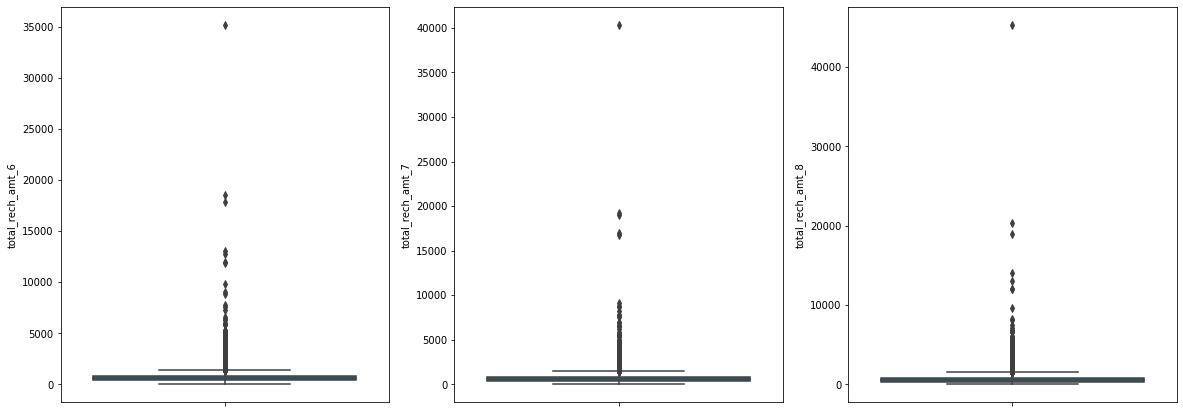

In [591]:
# Ploting box plot for total recharge amounts:
plot_box_plot('total_rech_amt')

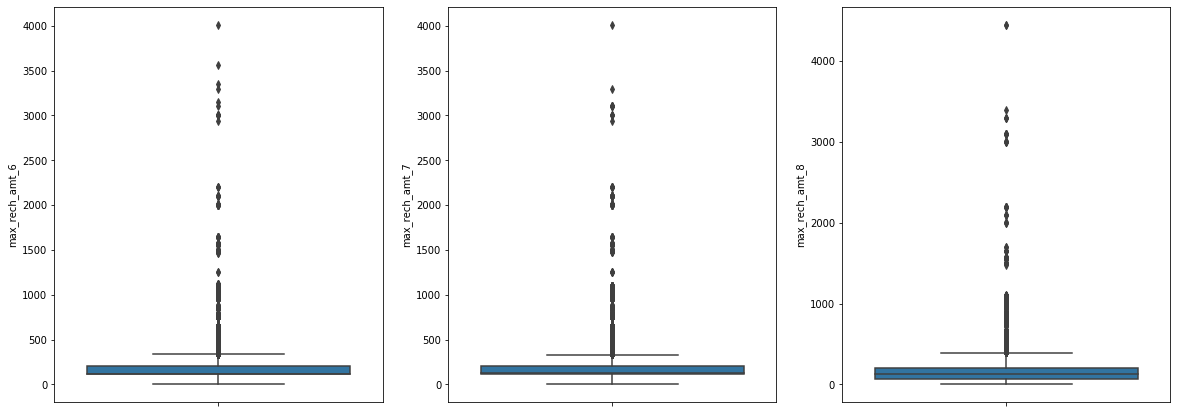

In [592]:
# Plotting boxplot for Max recharge amount
plot_box_plot('max_rech_amt')

In [593]:
data_high_value_cust[recharge_amnt_columns].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,697.720204,696.309083,613.908403,171.471130,175.723006,162.929351
std,539.488337,562.327538,602.047678,174.762549,181.606909,172.671442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,240.000000,220.000000,0.000000,36.000000,36.000000,0.000000
25%,433.000000,427.000000,309.000000,110.000000,110.000000,67.000000
50%,585.000000,581.000000,520.000000,120.000000,128.000000,130.000000
75%,838.000000,836.000000,790.000000,200.000000,200.000000,198.000000
90%,1181.000000,1194.000000,1156.000000,297.000000,300.000000,252.000000
95%,1480.000000,1510.000000,1494.100000,500.000000,500.000000,455.000000


In [594]:
def capping(colname, percentile):
    # Calculating the Cap value
    cap_value = data_high_value_cust[colname].quantile(percentile)

    ## capping the values above provided quantile with value equal to provided quantile
    data_high_value_cust[colname] = np.where(data_high_value_cust[colname]>cap_value, cap_value, data_high_value_cust[colname])

    # Calculating the skewness
    skew_val = data_high_value_cust[colname].skew()
    print(colname,":",skew_val)

In [595]:
for item in recharge_amnt_list:
    capping(item, 0.95)

total_rech_amt_6 : 0.8007211909854546
total_rech_amt_7 : 0.8230396040376329
total_rech_amt_8 : 0.6772728461172627
max_rech_amt_6 : 1.6149878986256245
max_rech_amt_7 : 1.5520047508990682
max_rech_amt_8 : 1.1426379429033675


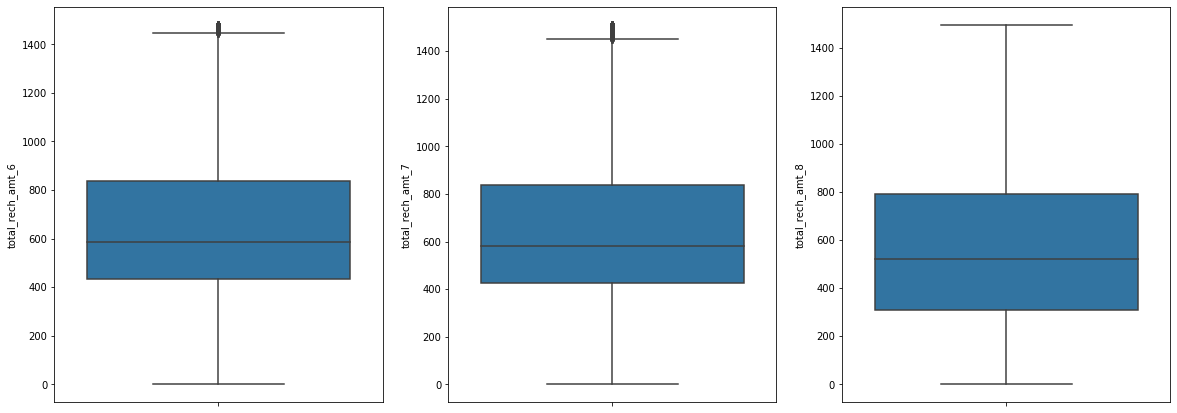

In [596]:
# Ploting box plot for total recharge amounts:
plot_box_plot('total_rech_amt')

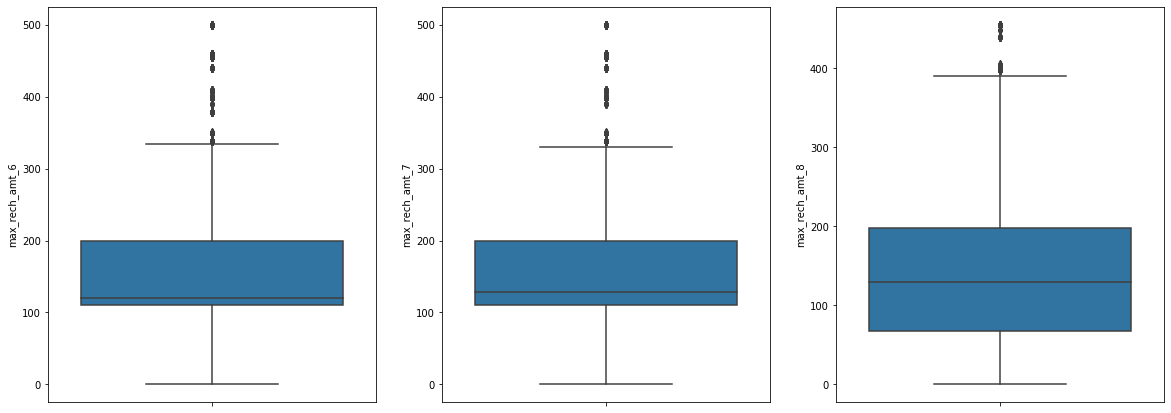

In [597]:
# Plotting boxplot for Max recharge amount
plot_box_plot('max_rech_amt')

In [598]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = data_high_value_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="Churn",hue="Churn")
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="Churn",hue="Churn")
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="Churn",hue="Churn")
    plt.show()

##### 1. Recharge Amount related variables

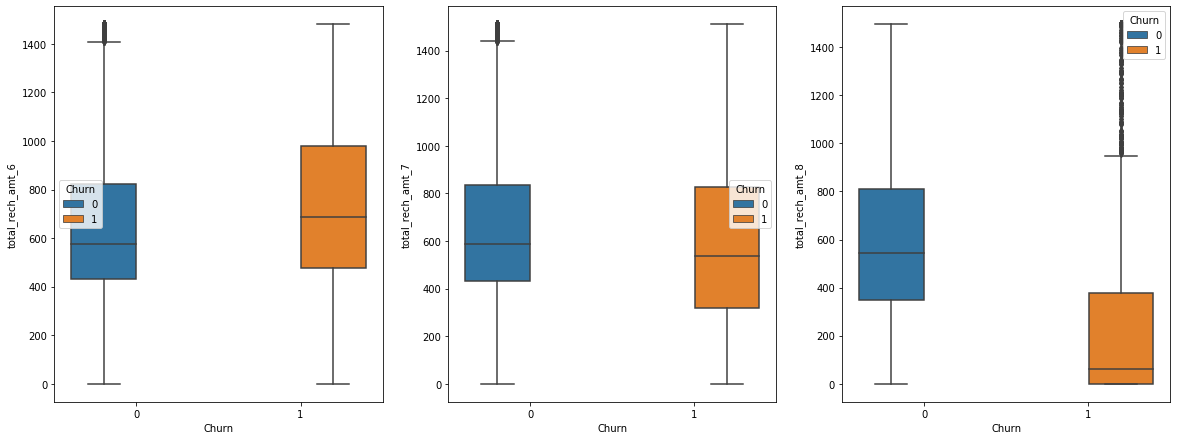

In [599]:
# Ploting box plot for total recharge amounts:
plot_box_chart('total_rech_amt')

- Conclusion: There is significant drop in total recharge amount for the Churned customers in the 8th month (action phase).

##### 2. Maximum Recharge Amount

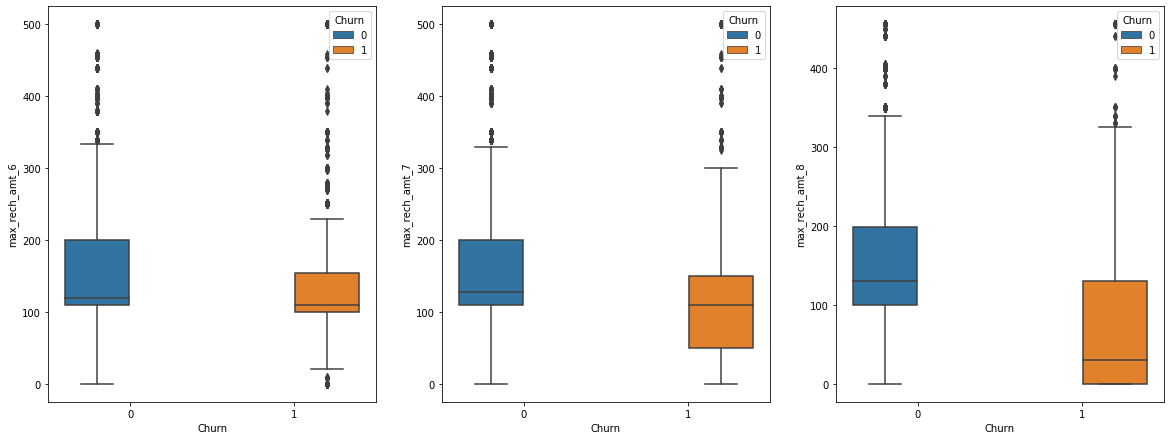

In [600]:
# Ploting box plot for max recharge amounts:
plot_box_chart('max_rech_amt')

- Conclusion: There is significant drop in maximum recharge amount for the Churned customers in the 8th month (action phase).

##### 3. Total Recharge Number

In [601]:
total_rech_num_columns =  data_high_value_cust.columns[data_high_value_cust.columns.str.contains('total_rech_num')]
total_rech_num_list = list(total_rech_num_columns)
total_rech_num_list

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8']

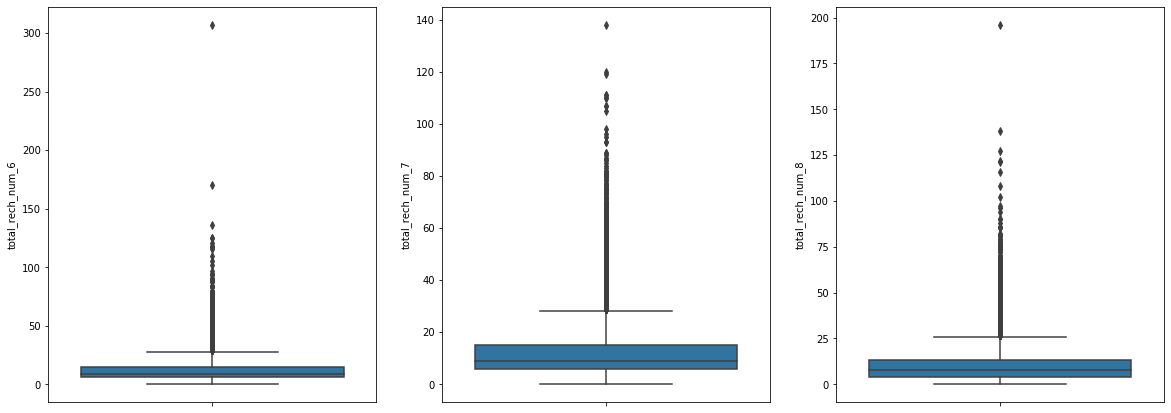

In [602]:
# Ploting box plot for total recharge amounts:
plot_box_plot('total_rech_num')

In [603]:
data_high_value_cust[total_rech_num_columns].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

,total_rech_num_6,total_rech_num_7,total_rech_num_8
count,29979.000000,29979.000000,29979.000000
mean,12.123253,11.914207,10.226092
std,9.546424,9.605757,9.480012
min,0.000000,0.000000,0.000000
5%,3.000000,3.000000,1.000000
25%,6.000000,6.000000,4.000000
50%,9.000000,9.000000,8.000000
75%,15.000000,15.000000,13.000000
90%,23.000000,23.000000,21.000000
95%,30.000000,30.000000,28.000000


In [604]:
for item in total_rech_num_list:
    capping(item, 0.95)

total_rech_num_6 : 1.1017673007721394
total_rech_num_7 : 1.0869237594212582
total_rech_num_8 : 1.0952991962883956


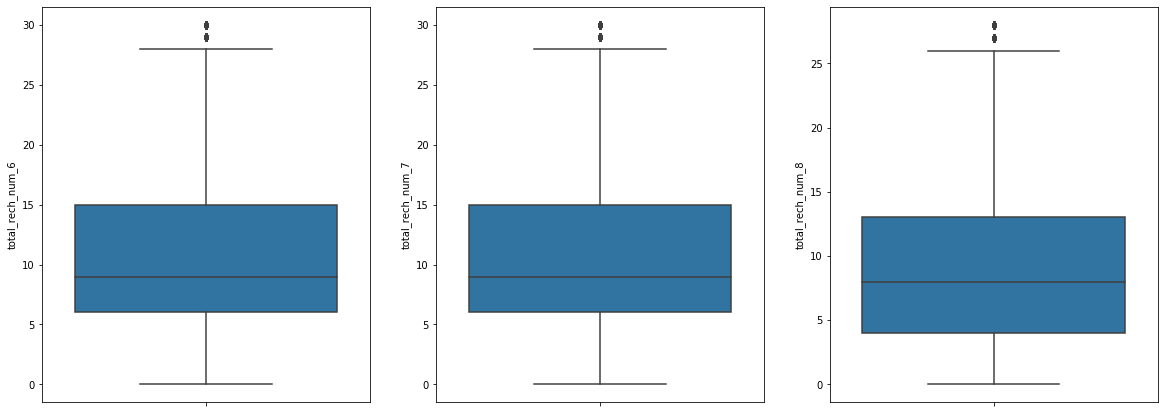

In [605]:
# Ploting box plot for total recharge amounts:
plot_box_plot('total_rech_num')

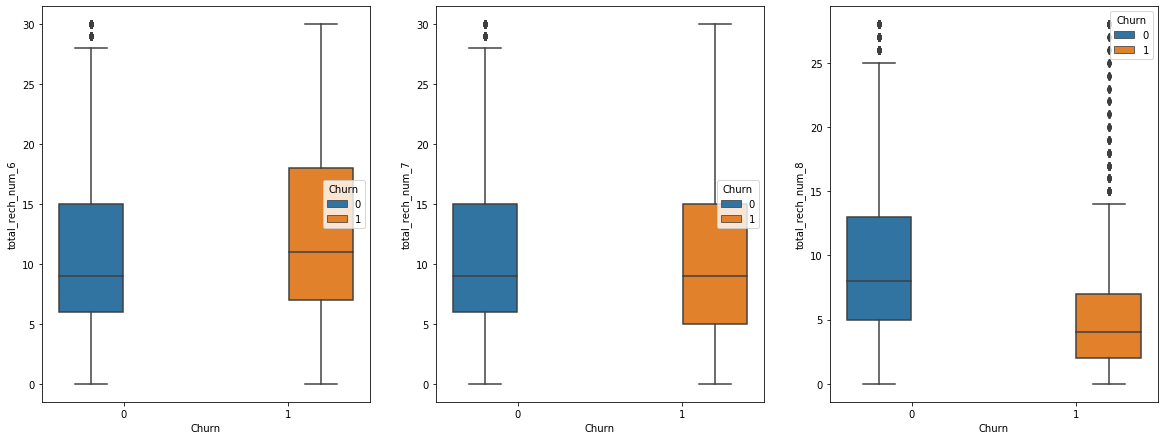

In [606]:
# Ploting box plot for total_rech_num:
plot_box_chart('total_rech_num')

- Conclusion: There is significant drop in Total Recharge Number for the Churned customers in the 8th month (action phase).

##### 4.  Total recharge data

In [607]:
total_rech_data_columns =  data_high_value_cust.columns[data_high_value_cust.columns.str.contains('total_rech_data')]
total_rech_data_list = list(total_rech_data_columns)
total_rech_data_list

['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']

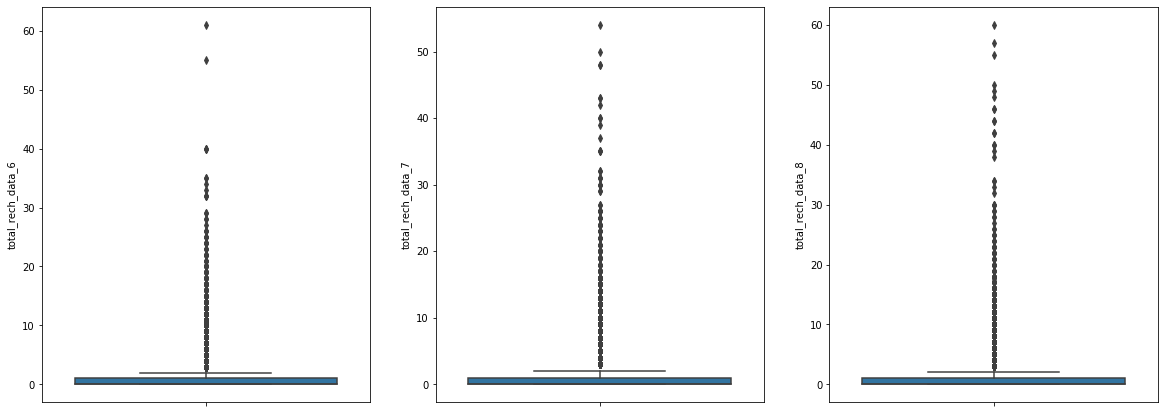

In [608]:
# Ploting box plot for total recharge data:
plot_box_plot('total_rech_data')

In [609]:
data_high_value_cust[total_rech_data_columns].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

,total_rech_data_6,total_rech_data_7,total_rech_data_8
count,29979.000000,29979.000000,29979.000000
mean,0.936889,1.053938,1.035425
std,2.176824,2.412950,2.405824
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
90%,3.000000,3.000000,3.000000
95%,4.000000,5.000000,5.000000


In [610]:
for item in total_rech_data_list:
    capping(item, 0.90)

total_rech_data_6 : 1.3039598758883955
total_rech_data_7 : 1.2210573331779273
total_rech_data_8 : 1.238179647007667


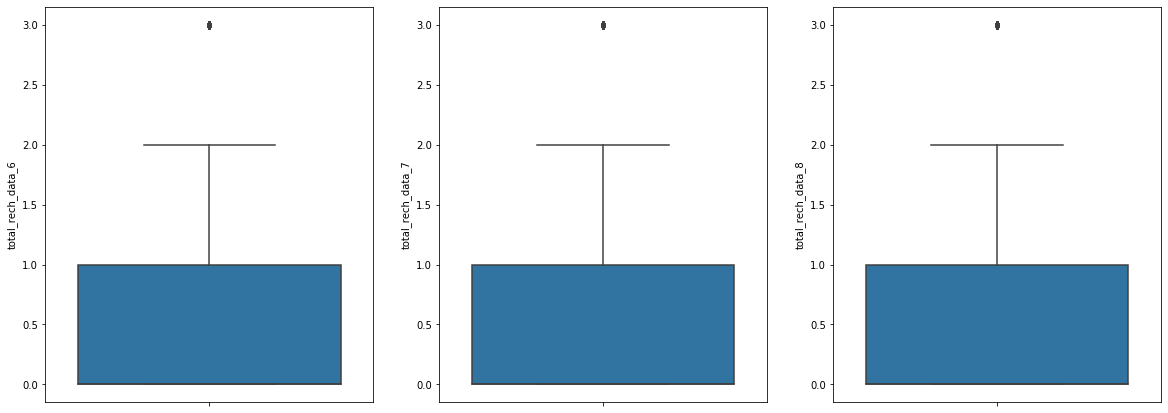

In [611]:
# Ploting box plot for total recharge data:
plot_box_plot('total_rech_data')

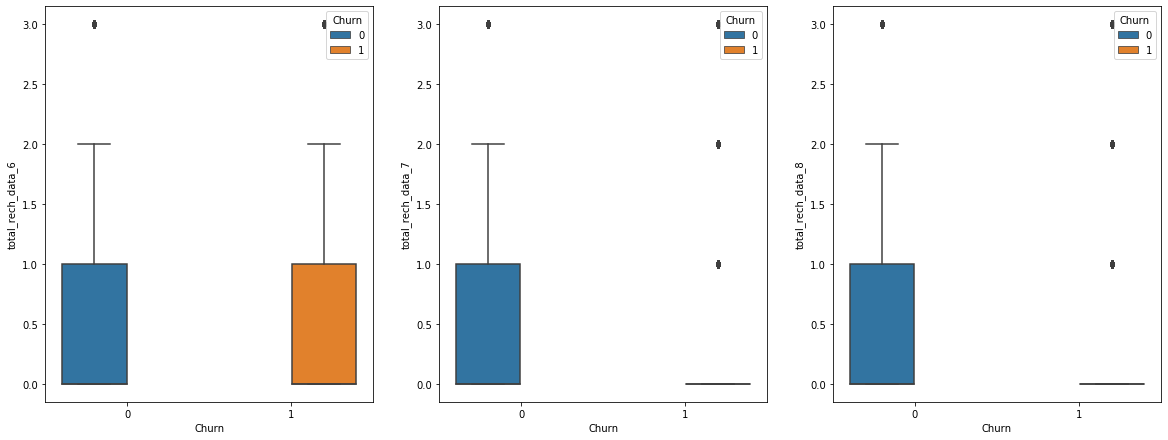

In [612]:
# Ploting box plot for total_rech_num:
plot_box_chart('total_rech_data')

Conclusion: The value of Total Recharge Data is amlost Zero for the Churned customers in the 7th and 8th month (action phase).

##### 5. Count recharge both 2g and 3g

In [613]:
count_rech_columns =  data_high_value_cust.columns[data_high_value_cust.columns.str.contains('count_rech')]
count_rech_list = list(count_rech_columns)
count_rech_list

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8']

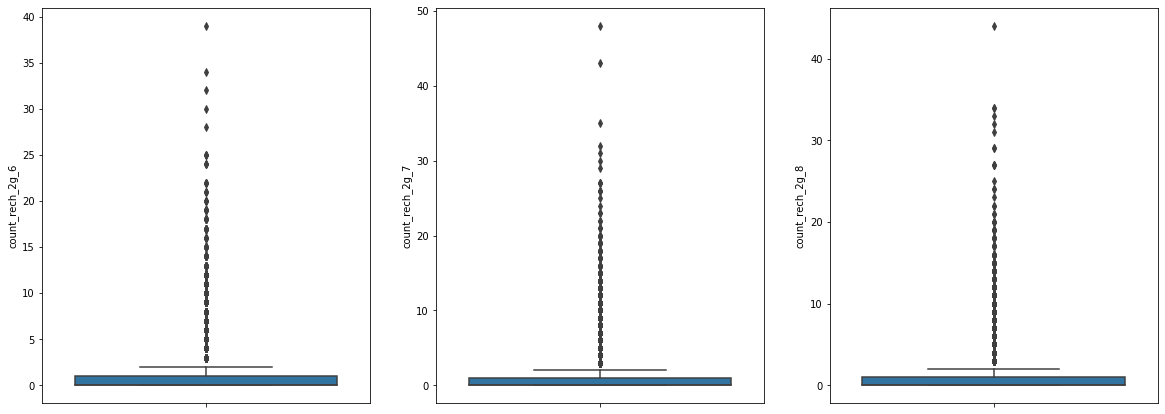

In [614]:
# Ploting box plot for count recharge 2g data:
plot_box_plot('count_rech_2g')

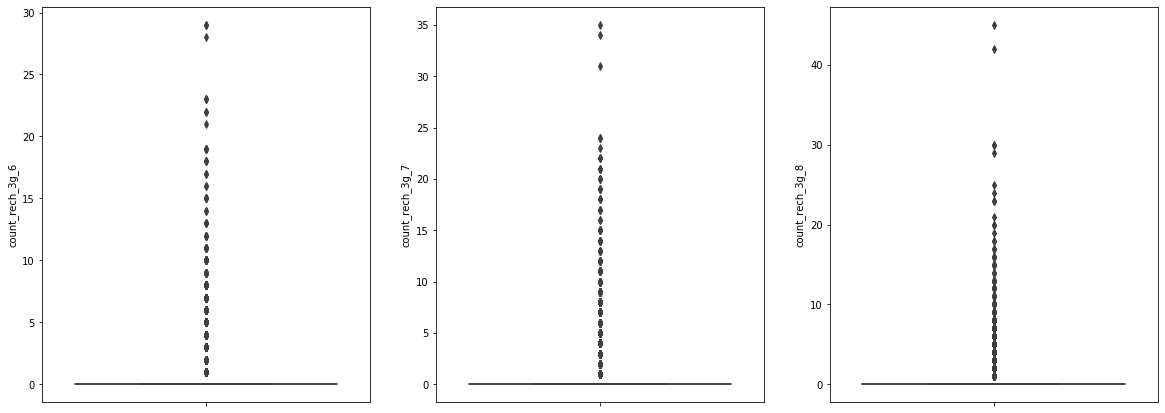

In [615]:
# Ploting box plot for count recharge 3g data:
plot_box_plot('count_rech_3g')

In [616]:
data_high_value_cust[count_rech_columns].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,0.624771,0.718303,0.721605,0.312118,0.335635,0.313820
std,1.730741,1.930804,1.871110,1.066232,1.176567,1.162114
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
90%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
95%,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [617]:
for item in count_rech_list:
    capping(item, 0.90)

count_rech_2g_6 : 1.511322922331698
count_rech_2g_7 : 1.4270580442043412
count_rech_2g_8 : 1.3879427803099045
count_rech_3g_6 : 1.7320042849730155
count_rech_3g_7 : 1.7227698337054154
count_rech_3g_8 : 1.8227170632220862


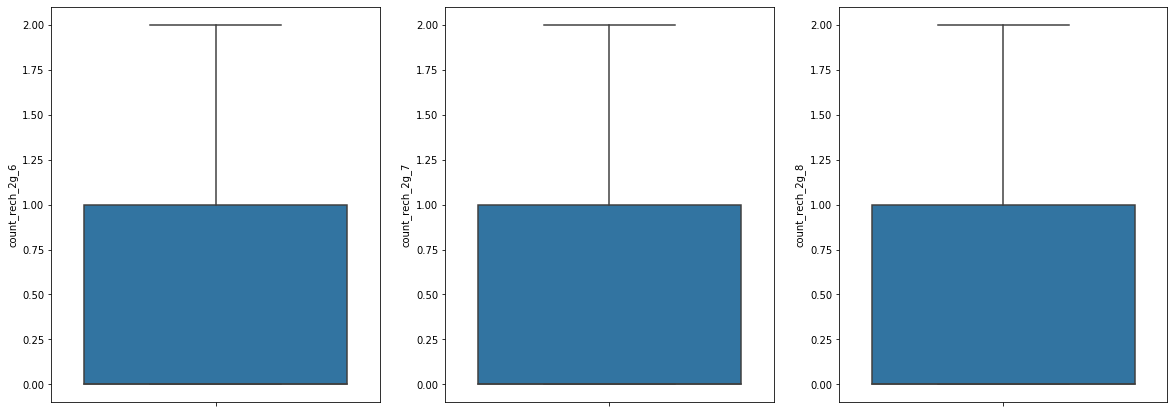

In [618]:
# Ploting box plot for total recharge data:
plot_box_plot('count_rech_2g')

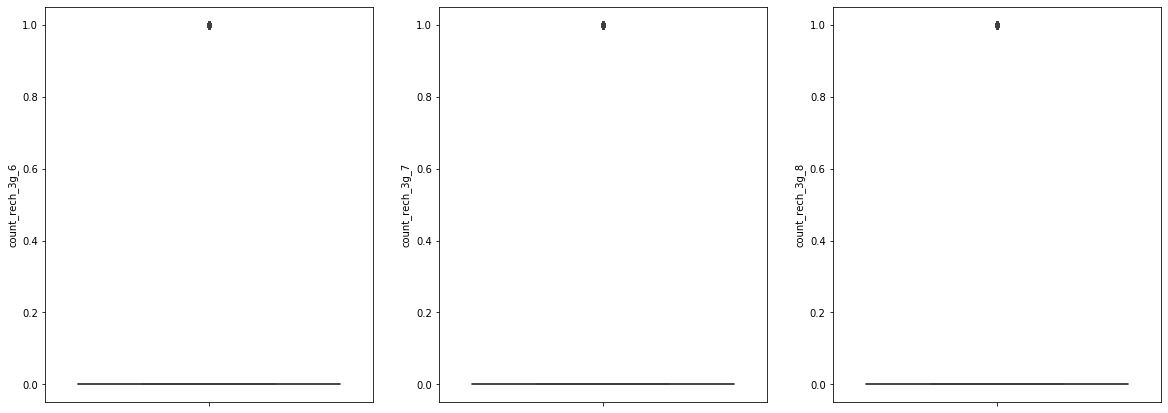

In [619]:
# Ploting box plot for total recharge data:
plot_box_plot('count_rech_3g')

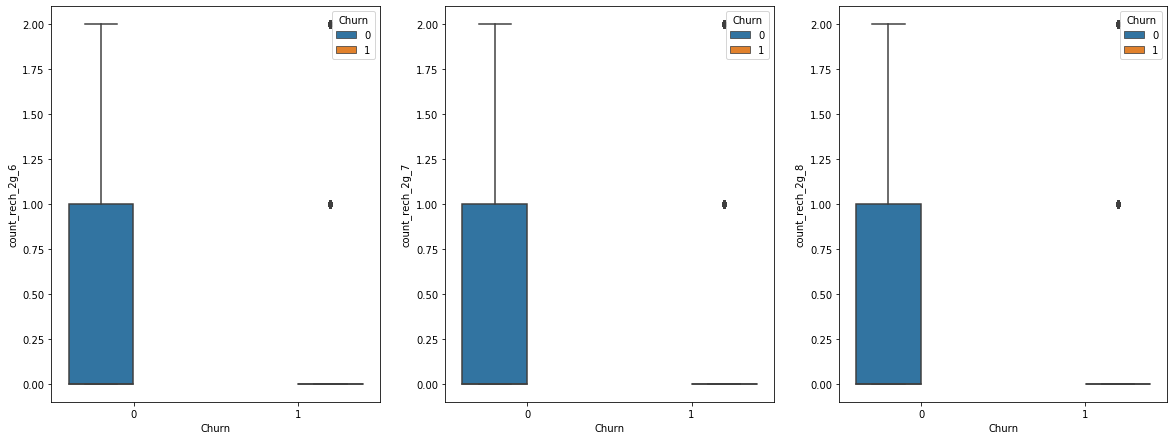

In [620]:
# Ploting box plot for total_rech_num:
plot_box_chart('count_rech_2g')

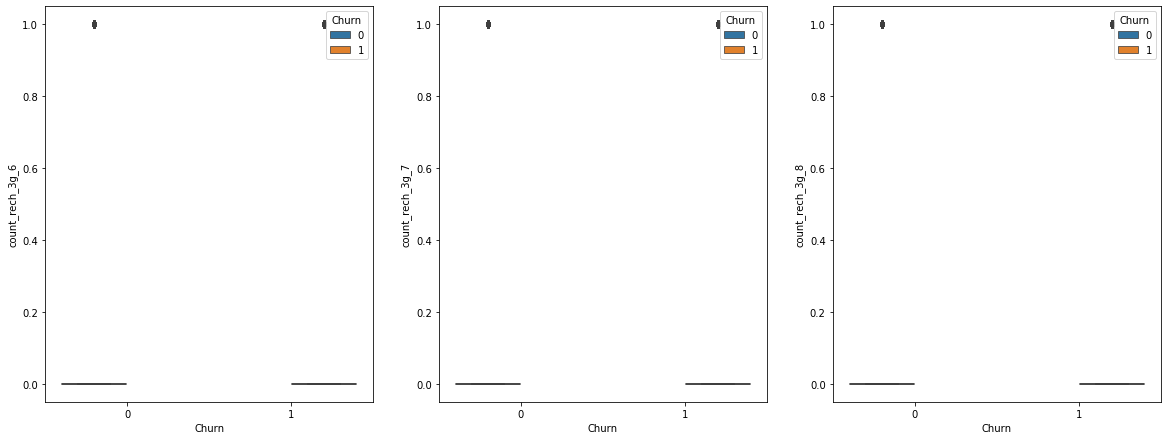

In [621]:
# Ploting box plot for total_rech_num:
plot_box_chart('count_rech_3g')

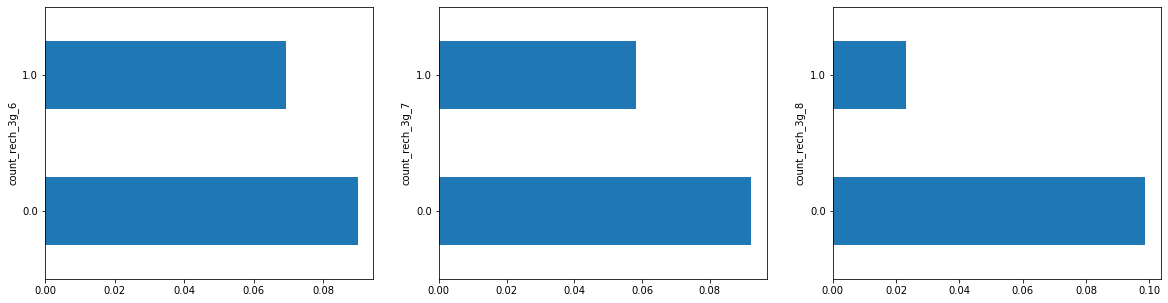

In [622]:
# Ploting bar plot for total_rech_num:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
data_high_value_cust.groupby(['count_rech_3g_6'])['Churn'].mean().plot.barh()

plt.subplot(1,3,2)
data_high_value_cust.groupby(['count_rech_3g_7'])['Churn'].mean().plot.barh()

plt.subplot(1,3,3)
data_high_value_cust.groupby(['count_rech_3g_8'])['Churn'].mean().plot.barh()

plt.show()

Conclusion: The value of Count of Recharge 3g Data is ver low for the Churned customers in the 7th and 8th month (action phase).

##### 6. Volume of 2G and 3G data

In [623]:
vol_mb_columns =  data_high_value_cust.columns[data_high_value_cust.columns.str.contains('vol_')]
vol_mb_list = list(vol_mb_columns)
vol_mb_list

['vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8']

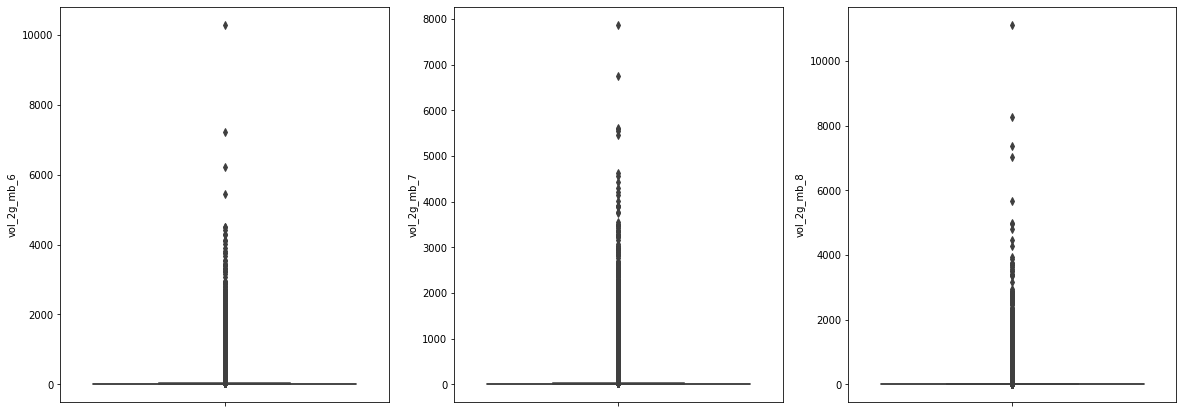

In [624]:
# Ploting box plot for volume recharge 2g data:
plot_box_plot('vol_2g_mb')

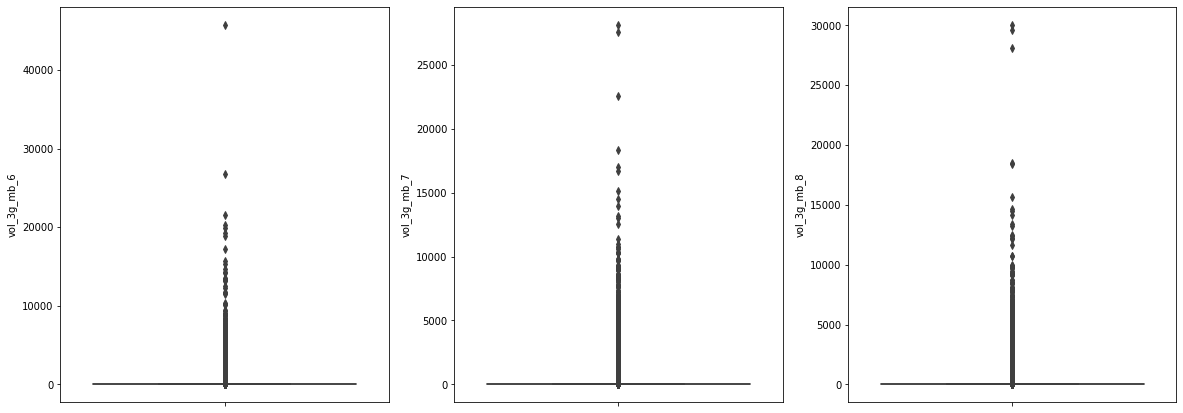

In [625]:
# Ploting box plot for volume recharge 3g data:
plot_box_plot('vol_3g_mb')

In [626]:
data_high_value_cust[vol_mb_columns].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,78.875263,78.196804,69.248761,258.623297,278.341301,270.061116
std,277.525473,280.430249,268.616268,866.619871,856.096362,859.715968
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14.470000,14.960000,9.625000,0.000000,2.275000,0.000000
90%,199.260000,194.458000,153.624000,876.500000,962.828000,915.548000
95%,485.126000,470.815000,410.051000,1510.517000,1614.668000,1542.808000


In [627]:
for item in vol_mb_list:
    capping(item, 0.90)

vol_2g_mb_6 : 1.9321155905912362
vol_2g_mb_7 : 1.9549694781560432
vol_2g_mb_8 : 1.966460542832651
vol_3g_mb_6 : 1.835499520789581
vol_3g_mb_7 : 1.7912055078491496
vol_3g_mb_8 : 1.8045406602841811


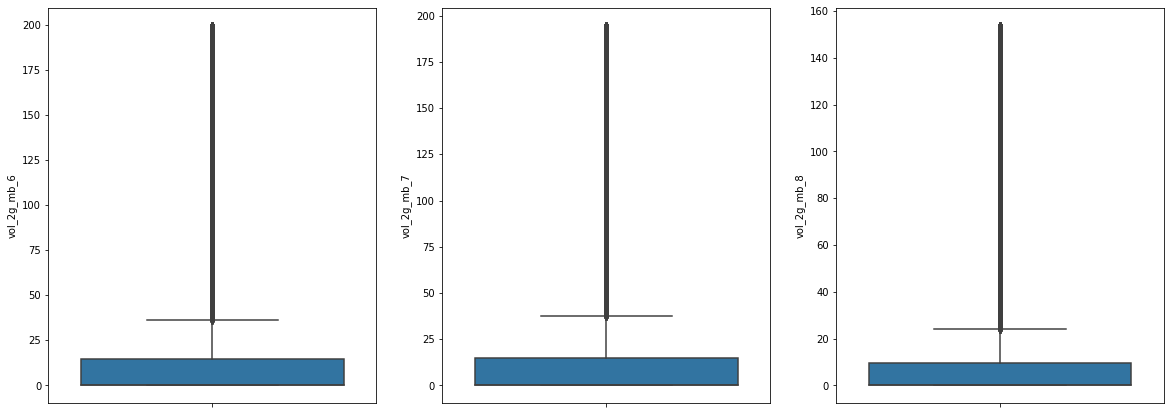

In [628]:
# Ploting box plot for total recharge data:
plot_box_plot('vol_2g_mb')

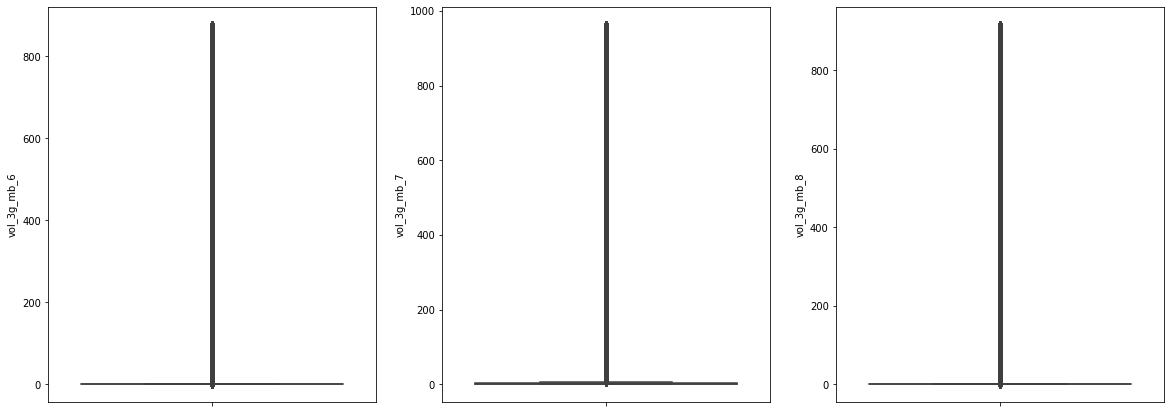

In [629]:
# Ploting box plot for total recharge data:
plot_box_plot('vol_3g_mb')

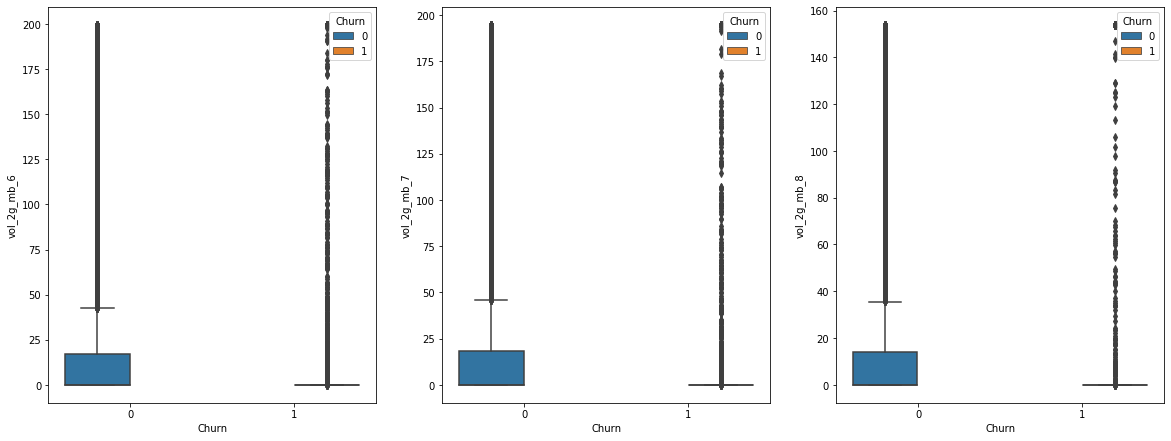

In [630]:
# Ploting box plot for total_rech_num:
plot_box_chart('vol_2g_mb')

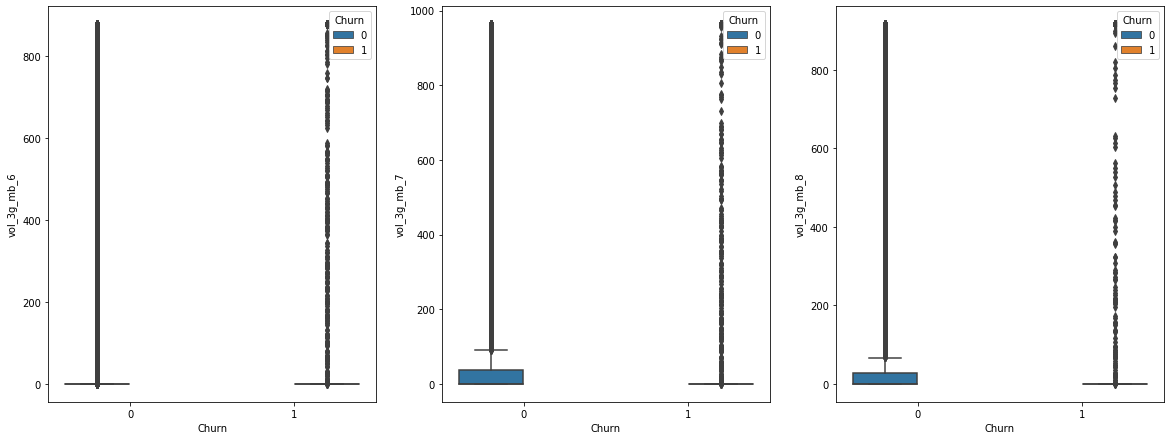

In [631]:
# Ploting box plot for total_rech_num:
plot_box_chart('vol_3g_mb')

- Conclusion: Not much of trend can be identified from the plots, but people who have churned seemed to use very less amount of data be it 2G or 3G. 

##### 7. Monthly 2G and 3G

In [632]:
monthly_columns =  data_high_value_cust.columns[data_high_value_cust.columns.str.contains('monthly_')]
monthly_list = list(monthly_columns)
monthly_list

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

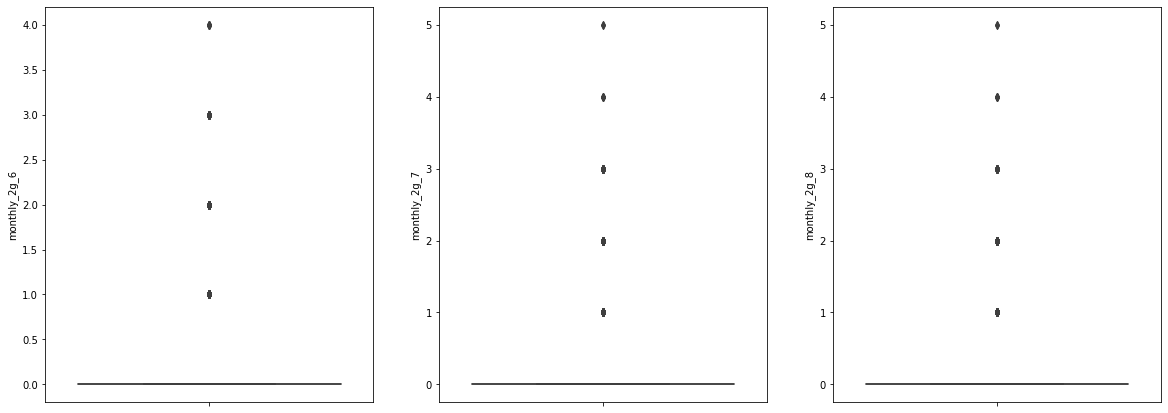

In [633]:
# Ploting box plot for volume recharge 2g data:
plot_box_plot('monthly_2g')

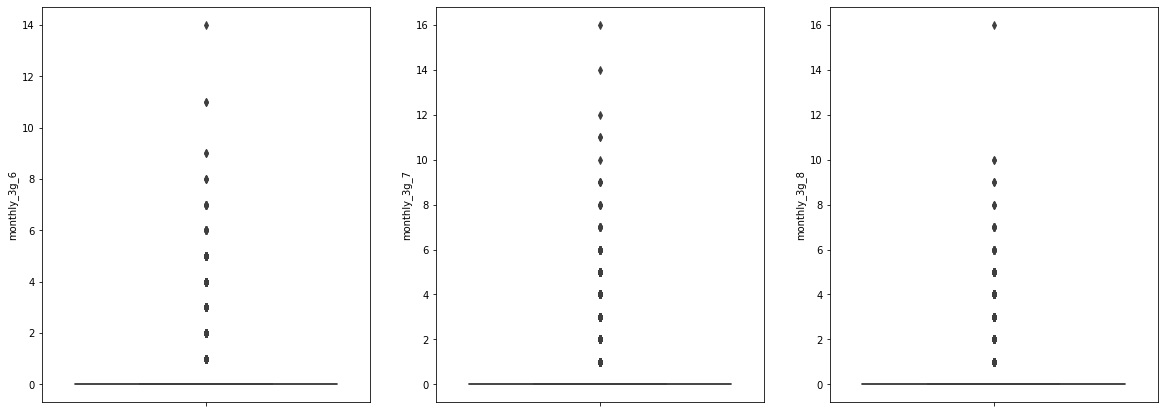

In [634]:
# Ploting box plot for volume recharge 3g data:
plot_box_plot('monthly_3g')

In [635]:
data_high_value_cust[monthly_columns].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,0.124954,0.131425,0.114080,0.174055,0.185296,0.173321
std,0.374656,0.387793,0.357335,0.574545,0.620703,0.583178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
95%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [636]:
for item in monthly_list:
    capping(item, 0.90)

monthly_2g_6 : 2.476610612654036
monthly_2g_7 : 2.410968992993253
monthly_2g_8 : 2.622960783099742
monthly_3g_6 : 2.348356917895734
monthly_3g_7 : 2.314043763516133
monthly_3g_8 : 2.3956759523018283


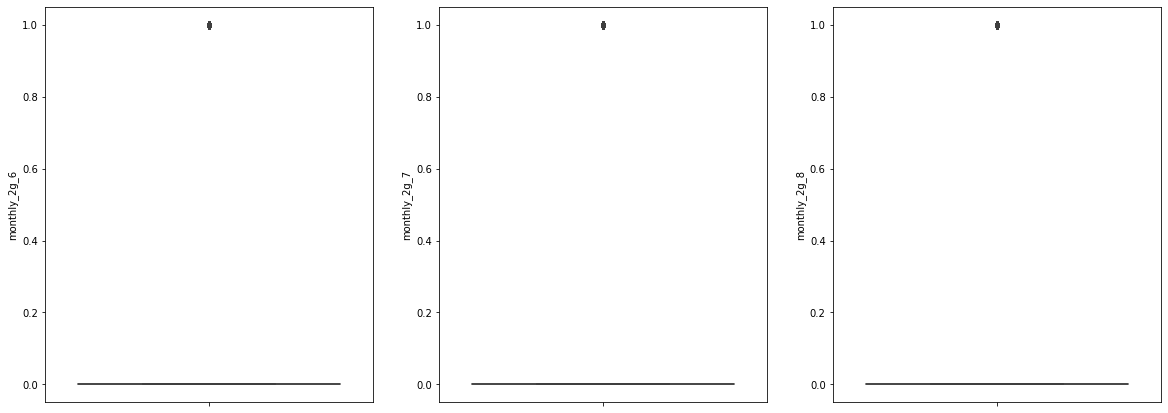

In [637]:
# Ploting box plot for total recharge data:
plot_box_plot('monthly_2g')

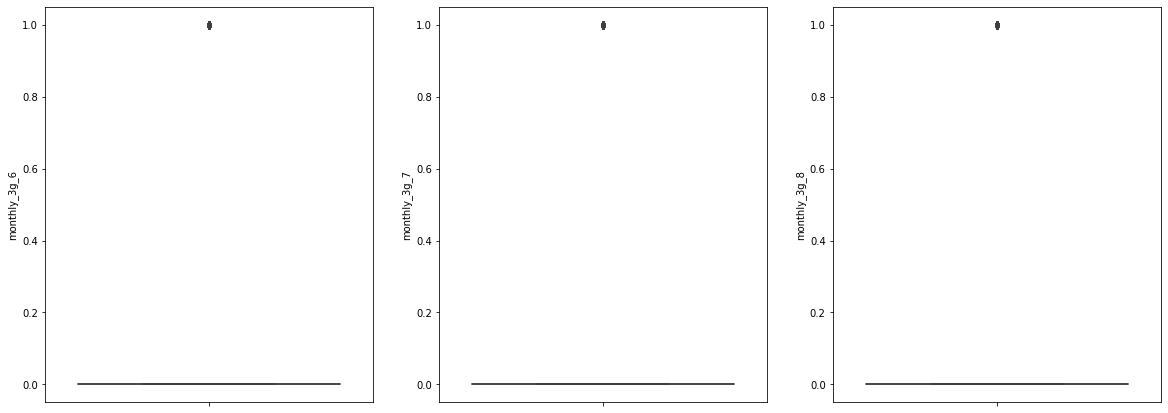

In [638]:
# Ploting box plot for total recharge data:
plot_box_plot('monthly_3g')

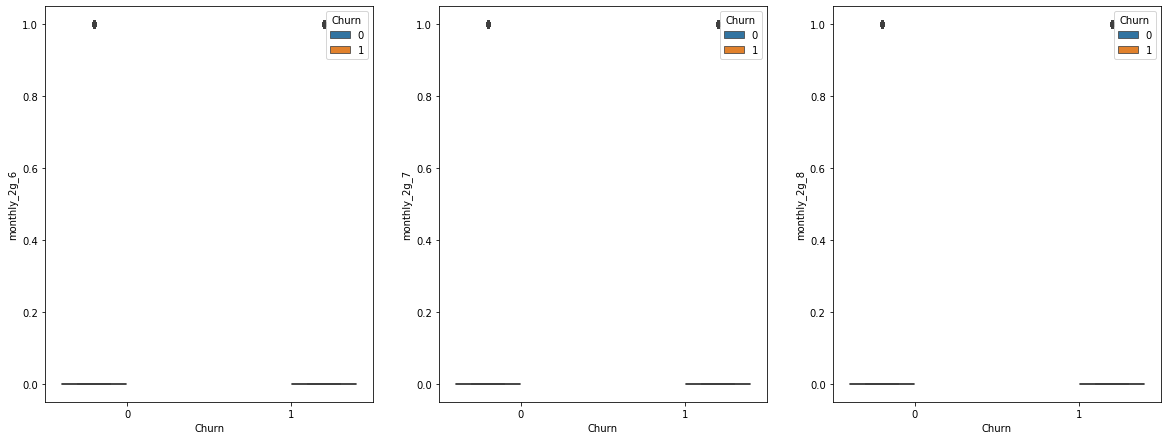

In [639]:
# Ploting box plot for total_rech_num:
plot_box_chart('monthly_2g')

-  The box plot is not at all interpretable. So, plottig bar plot for the mean to get an idea of the values. 

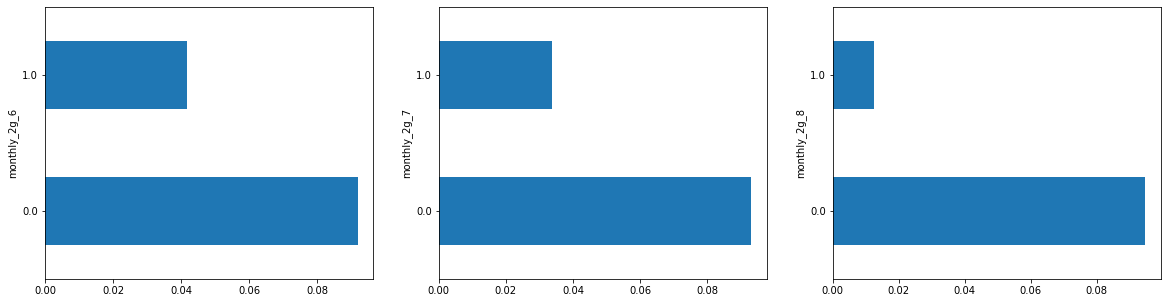

In [640]:
# Ploting bar plot for Monthly 2G:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
data_high_value_cust.groupby(['monthly_2g_6'])['Churn'].mean().plot.barh()

plt.subplot(1,3,2)
data_high_value_cust.groupby(['monthly_2g_7'])['Churn'].mean().plot.barh()

plt.subplot(1,3,3)
data_high_value_cust.groupby(['monthly_2g_8'])['Churn'].mean().plot.barh()

plt.show()

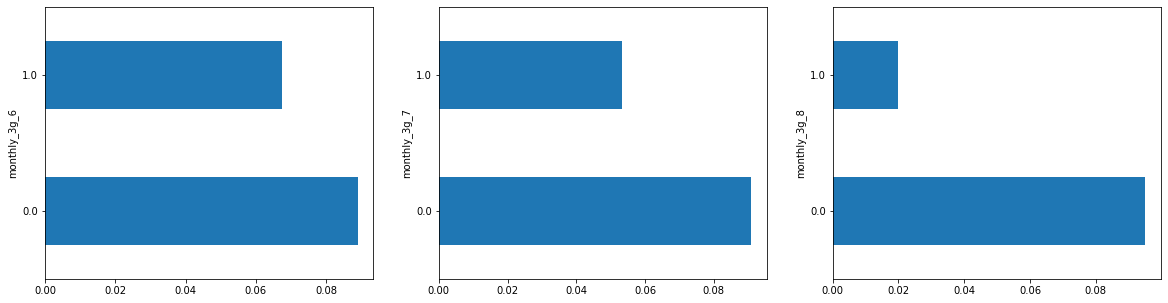

In [641]:
# Ploting bar plot for Monthly 3G:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
data_high_value_cust.groupby(['monthly_3g_6'])['Churn'].mean().plot.barh()

plt.subplot(1,3,2)
data_high_value_cust.groupby(['monthly_3g_7'])['Churn'].mean().plot.barh()

plt.subplot(1,3,3)
data_high_value_cust.groupby(['monthly_3g_8'])['Churn'].mean().plot.barh()

plt.show()

- Conclusion: The Monthly 2G and 3G consumption of data is steadily decreasing for the Curned Customers and it becomes very less in the Month 8 (Action Phase). 

##### 8. Sachet 2G and 3G

In [642]:
sachet_columns =  data_high_value_cust.columns[data_high_value_cust.columns.str.contains('sachet_')]
sachet_list = list(sachet_columns)
sachet_list

['sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8']

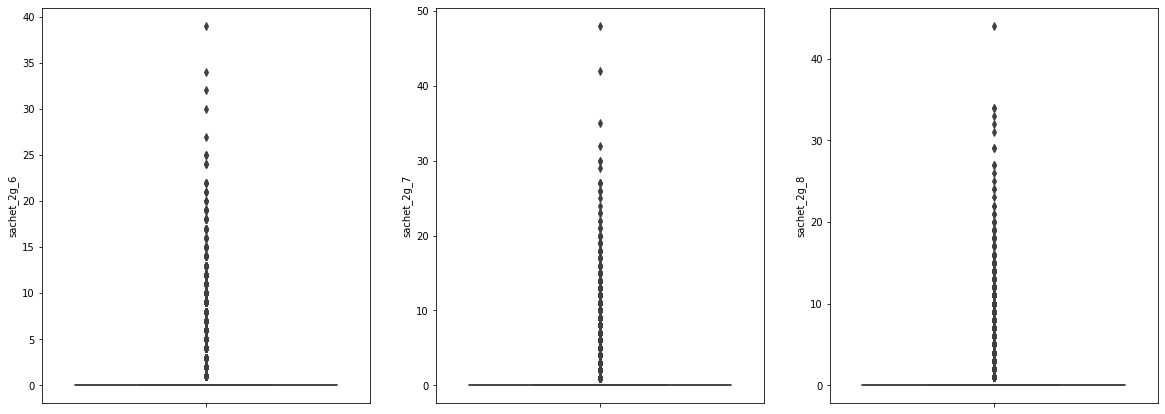

In [643]:
# Ploting box plot for volume recharge 2g data:
plot_box_plot('sachet_2g')

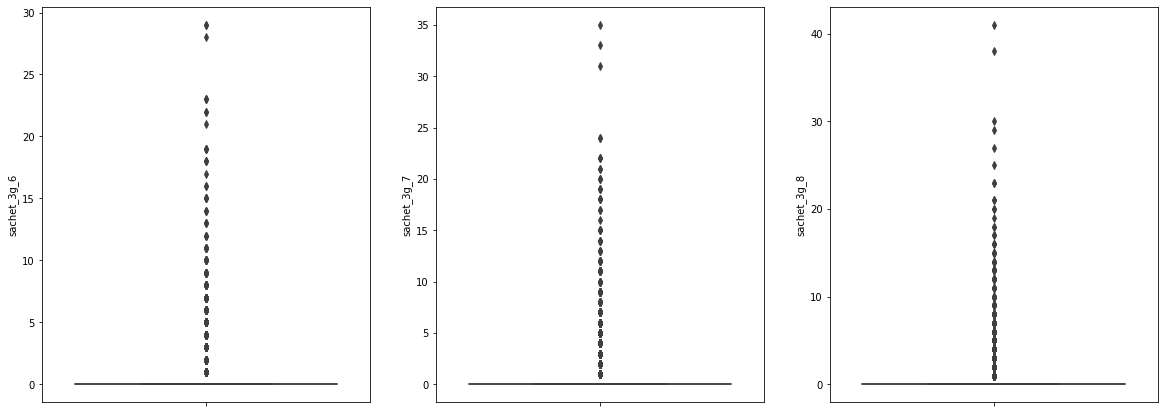

In [644]:
# Ploting box plot for volume recharge 3g data:
plot_box_plot('sachet_3g')

In [645]:
data_high_value_cust[sachet_columns].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,0.499817,0.586877,0.607525,0.138063,0.150339,0.140498
std,1.698845,1.900280,1.844605,0.875984,0.969779,0.975212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000
95%,3.000000,4.000000,4.000000,1.000000,1.000000,1.000000


In [646]:
for item in sachet_list:
    capping(item, 0.90)

sachet_2g_6 : 1.7172593730786905
sachet_2g_7 : 1.9876796522460625
sachet_2g_8 : 1.8455913615415684
sachet_3g_6 : 0
sachet_3g_7 : 0
sachet_3g_8 : 0


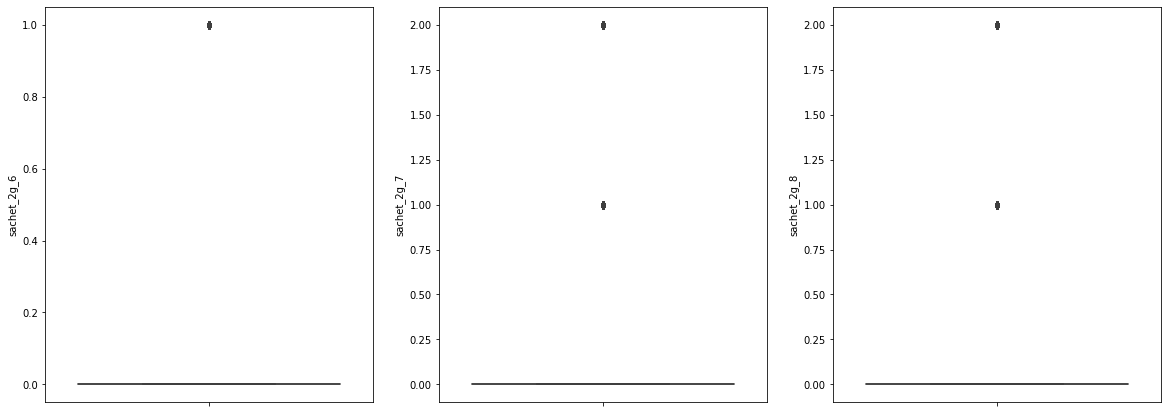

In [647]:
# Ploting box plot for total recharge data:
plot_box_plot('sachet_2g')

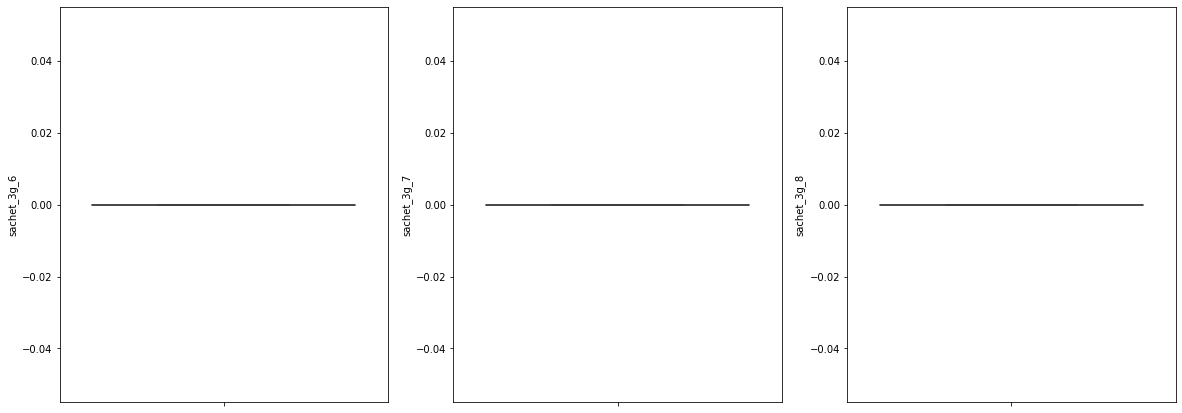

In [648]:
# Ploting box plot for total recharge data:
plot_box_plot('sachet_3g')

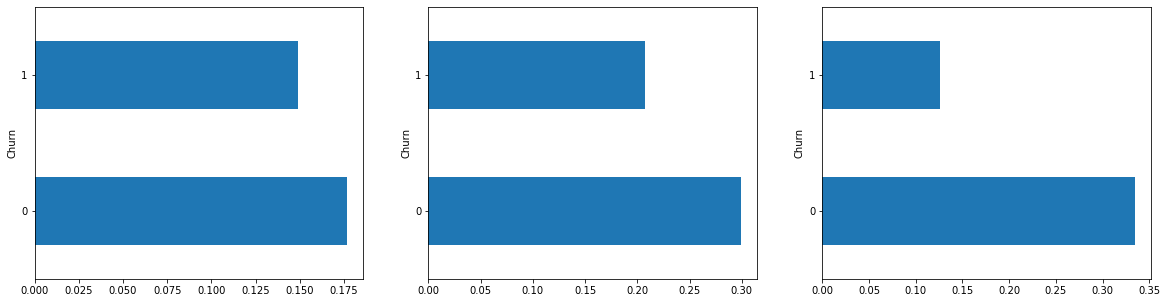

In [649]:
# Ploting bar plot for Monthly 2G:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
data_high_value_cust.groupby(['Churn'])['sachet_2g_6'].mean().plot.barh()

plt.subplot(1,3,2)
data_high_value_cust.groupby(['Churn'])['sachet_2g_7'].mean().plot.barh()

plt.subplot(1,3,3)
data_high_value_cust.groupby(['Churn'])['sachet_2g_8'].mean().plot.barh()

plt.show()

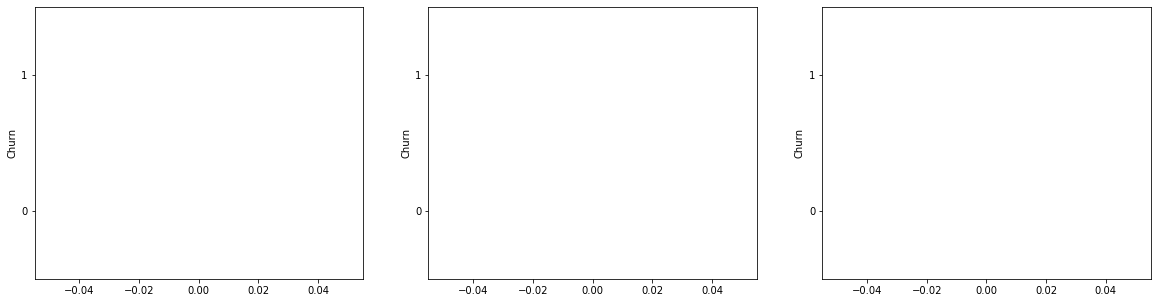

In [650]:
# Ploting bar plot for Monthly 2G:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
data_high_value_cust.groupby(['Churn'])['sachet_3g_6'].mean().plot.barh()

plt.subplot(1,3,2)
data_high_value_cust.groupby(['Churn'])['sachet_3g_7'].mean().plot.barh()

plt.subplot(1,3,3)
data_high_value_cust.groupby(['Churn'])['sachet_3g_8'].mean().plot.barh()

plt.show()

- Conclusion: The Sachet 2G is steadily decreasing for the Curned Customers and it becomes very less in the Month 8 (Action Phase). The value of Sachet 3G is almost 0 for evry month. 

##### 9. VBC

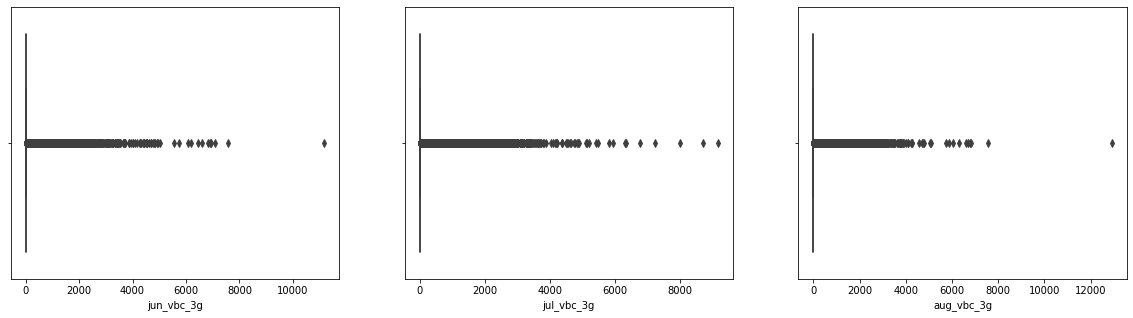

In [651]:
# Ploting box plot for volume recharge 2g data:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data_high_value_cust['jun_vbc_3g'])

plt.subplot(1,3,2)
sns.boxplot(data_high_value_cust['jul_vbc_3g'])

plt.subplot(1,3,3)
sns.boxplot(data_high_value_cust['aug_vbc_3g'])

plt.show()

In [652]:
list2 = ['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g']

In [653]:
data_high_value_cust[list2].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

,jun_vbc_3g,jul_vbc_3g,aug_vbc_3g
count,29979.000000,29979.000000,29979.000000
mean,121.450911,135.225368,129.482436
std,389.910814,408.218570,390.625027
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,2.025000,1.600000
90%,395.168000,455.078000,439.100000
95%,762.122000,845.429000,819.257000


In [654]:
for item in list2:
    capping(item, 0.90)

jun_vbc_3g : 1.9562399365659708
jul_vbc_3g : 1.9019140401666064
aug_vbc_3g : 1.8871347105699716


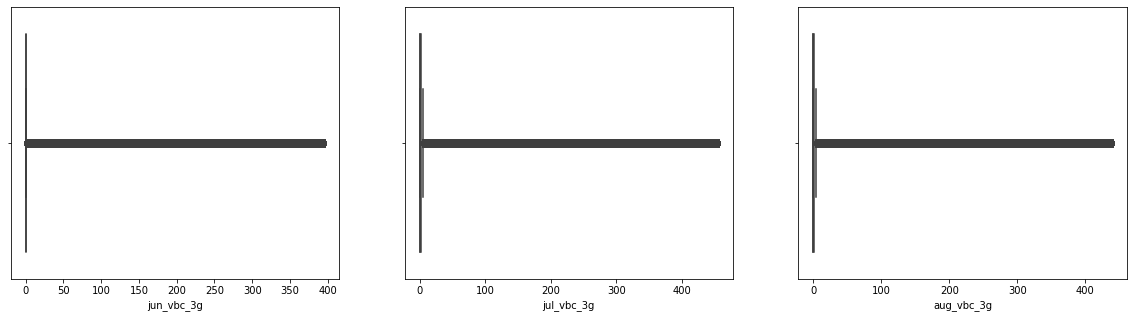

In [655]:
# Ploting box plot for volume recharge 2g data:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data_high_value_cust['jun_vbc_3g'])

plt.subplot(1,3,2)
sns.boxplot(data_high_value_cust['jul_vbc_3g'])

plt.subplot(1,3,3)
sns.boxplot(data_high_value_cust['aug_vbc_3g'])

plt.show()

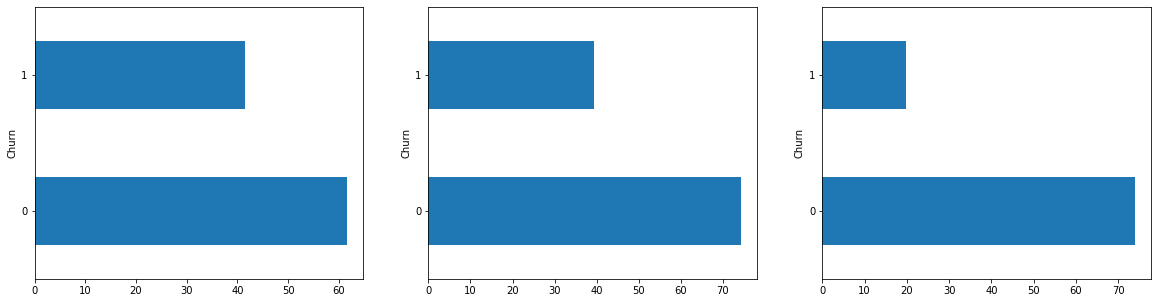

In [656]:
# Ploting bar plot for Monthly 2G:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
data_high_value_cust.groupby(['Churn'])['jun_vbc_3g'].mean().plot.barh()

plt.subplot(1,3,2)
data_high_value_cust.groupby(['Churn'])['jul_vbc_3g'].mean().plot.barh()

plt.subplot(1,3,3)
data_high_value_cust.groupby(['Churn'])['aug_vbc_3g'].mean().plot.barh()

plt.show()

-  Conclusion: The value of VBC 3G is steadily decreasing and it becomes very less in the action month for the churned customers. 

##### 10. AON 

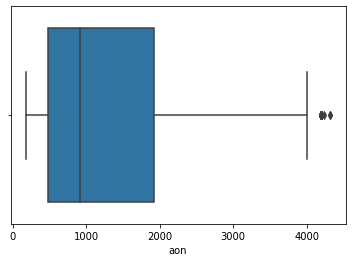

In [657]:
sns.boxplot(data_high_value_cust['aon'])
plt.show()

In [658]:
data_high_value_cust['aon'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

count    29979.000000
mean      1264.158911
std        975.181038
min        180.000000
5%         232.000000
25%        480.000000
50%        914.000000
75%       1923.500000
90%       2846.000000
95%       3178.200000
97%       3424.660000
99%       3651.000000
max       4321.000000
Name: aon, dtype: float64

In [659]:
list3 = ['aon']
for item in list3:
    capping(item, 0.99)

aon : 0.8903041182237125


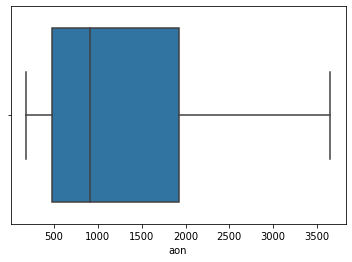

In [660]:
sns.boxplot(data_high_value_cust['aon'])
plt.show()

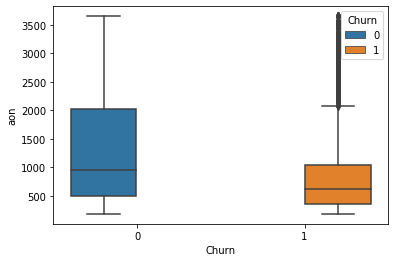

In [661]:
sns.boxplot(data=data_high_value_cust, y="aon",x="Churn",hue="Churn")
plt.show()

- Conclusion:  The value of AON is very less for the Churned customers. 

##### 11. Average Recharge Amount

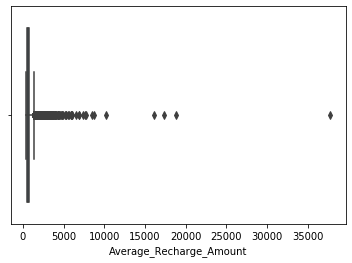

In [662]:
sns.boxplot(data_high_value_cust['Average_Recharge_Amount'])
plt.show()

In [663]:
data_high_value_cust['Average_Recharge_Amount'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

count    29979.000000
mean       697.014644
std        488.925223
min        369.000000
5%         381.500000
25%        450.000000
50%        569.000000
75%        796.000000
90%       1118.100000
95%       1406.500000
97%       1634.330000
99%       2217.000000
max      37762.500000
Name: Average_Recharge_Amount, dtype: float64

In [664]:
list4 = ['Average_Recharge_Amount']
for item in list4:
    capping(item, 0.92)

Average_Recharge_Amount : 0.9377551216374691


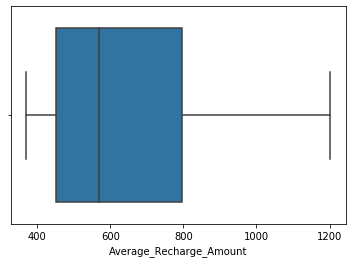

In [665]:
sns.boxplot(data_high_value_cust['Average_Recharge_Amount'])
plt.show()

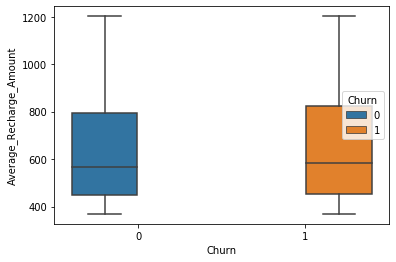

In [666]:
sns.boxplot(data=data_high_value_cust, y="Average_Recharge_Amount",x="Churn",hue="Churn")
plt.show()

- Conclusion:  The value of Average_Recharge_Amount is more or less same for the Churned and non churned customers. 

##### 12. ARPU

In [667]:
arpu_list = ['arpu_6', 'arpu_7', 'arpu_8']

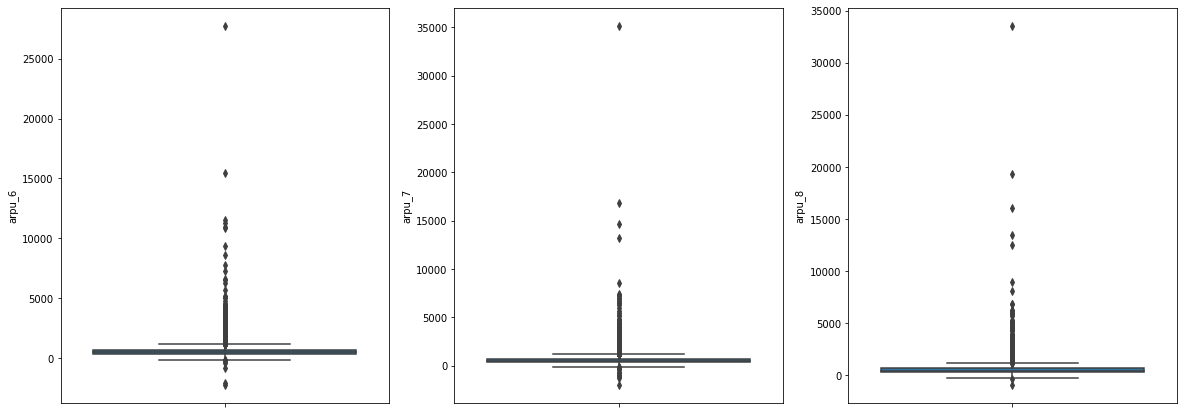

In [668]:
# Ploting box plot for volume recharge 2g data:
plot_box_plot('arpu')

In [669]:
data_high_value_cust[arpu_list].describe(percentiles=[0.02, 0.05,.25, .5, .75, .90, .95, .97, .99])

,arpu_6,arpu_7,arpu_8
count,29979.000000,29979.000000,29979.000000
mean,587.587624,589.424681,535.067748
std,442.848876,463.049067,492.447887
min,-2258.709000,-2014.045000,-945.808000
2%,94.450800,104.028480,0.000000
5%,202.181000,212.824700,22.221200
25%,364.352500,365.235000,289.782000
50%,495.951000,493.781000,452.232000
75%,704.184500,700.986000,671.349500
90%,994.311800,996.051400,985.499200


In [670]:
for item in arpu_list:
    capping(item, 0.95)

arpu_6 : 0.7450024973378101
arpu_7 : 0.8137021616398085
arpu_8 : 0.7016745454085171


In [671]:
def flooring(colname, percentile):
    # Calculating the Cap value
    floor_value = data_high_value_cust[colname].quantile(percentile)

    ## capping the values above provided quantile with value equal to provided quantile
    data_high_value_cust[colname] = np.where(data_high_value_cust[colname]<floor_value, floor_value, data_high_value_cust[colname])

    # Calculating the skewness
    skew_val = data_high_value_cust[colname].skew()
    print(colname,":",skew_val)

In [672]:
for item in arpu_list:
    flooring(item, 0.02)

arpu_6 : 0.8698930128544884
arpu_7 : 0.9357469810661228
arpu_8 : 0.7062275606516054


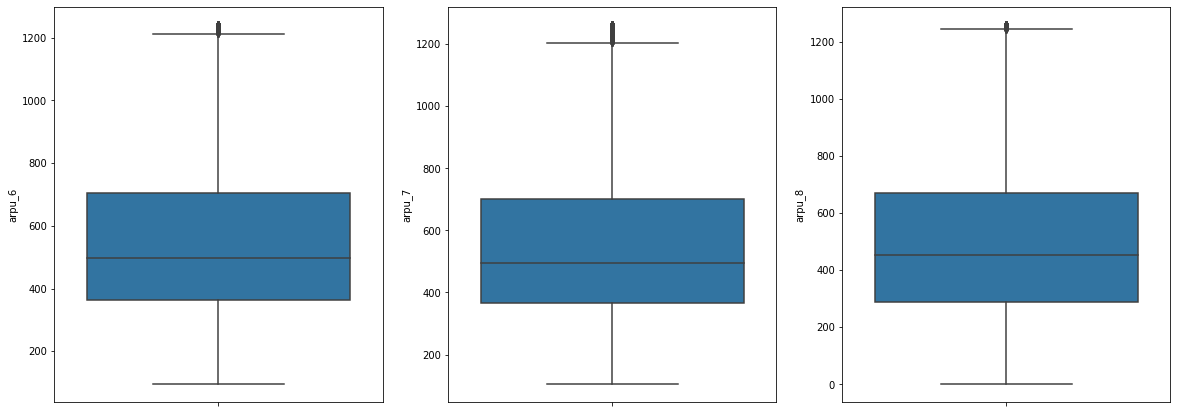

In [673]:
# Ploting box plot for total recharge data:
plot_box_plot('arpu')

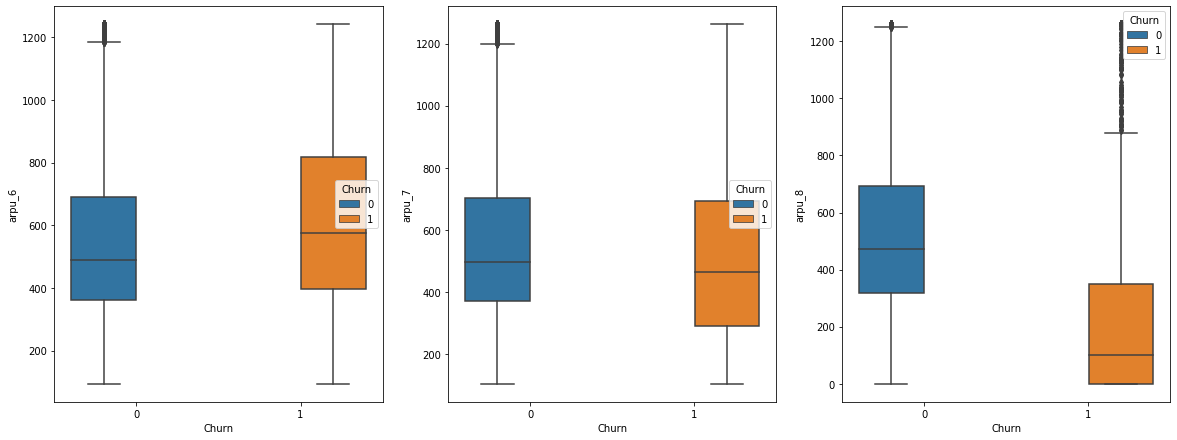

In [674]:
# Ploting box plot for arpu:
plot_box_chart('arpu')

- Conclusion: The value of ARPU decreses steadily and it becomes very less for churned customers in the action phase.  

##### 13. Local Outgoing calls 

In [675]:
loc_og_columns =  data_high_value_cust.columns[data_high_value_cust.columns.str.contains('loc_og_')]
loc_og_list = list(loc_og_columns)
loc_og_list

['loc_og_t2o_mou',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8']

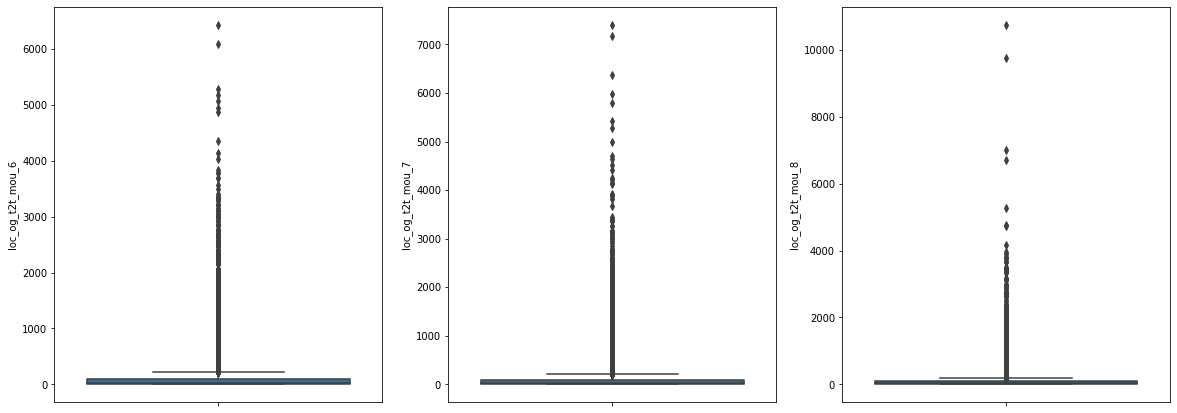

In [676]:
# Ploting box plot for volume recharge 2g data:
plot_box_plot('loc_og_t2t_mou')

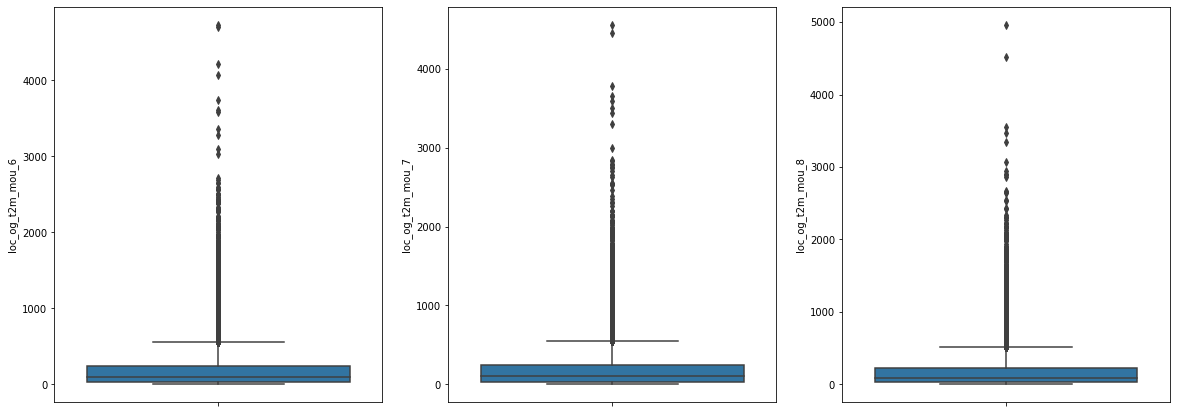

In [677]:
# Ploting box plot for volume recharge 3g data:
plot_box_plot('loc_og_t2m_mou')

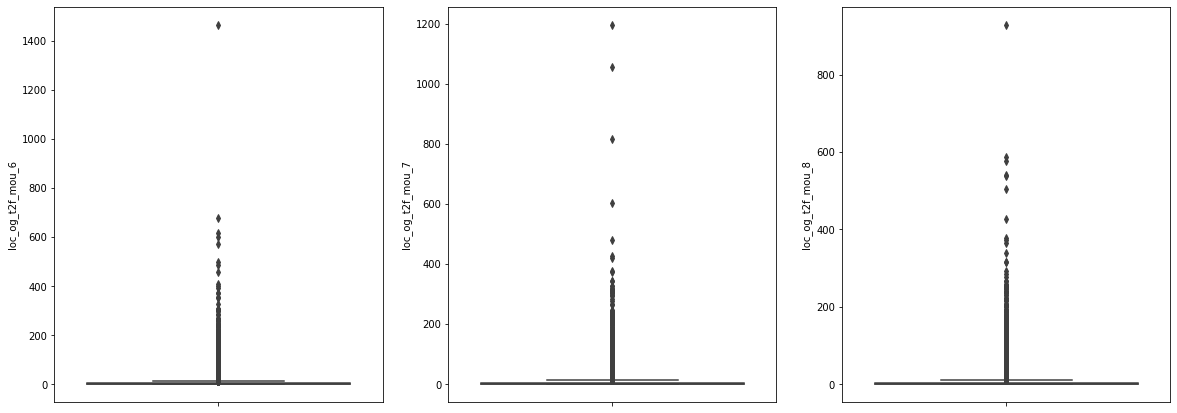

In [678]:
# Ploting box plot for volume recharge 3g data:
plot_box_plot('loc_og_t2f_mou')

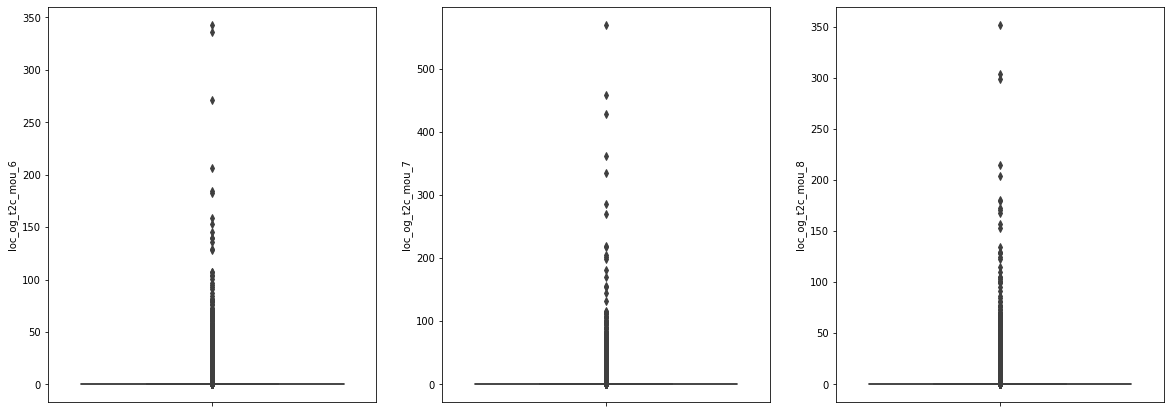

In [679]:
# Ploting box plot for volume recharge 3g data:
plot_box_plot('loc_og_t2c_mou')

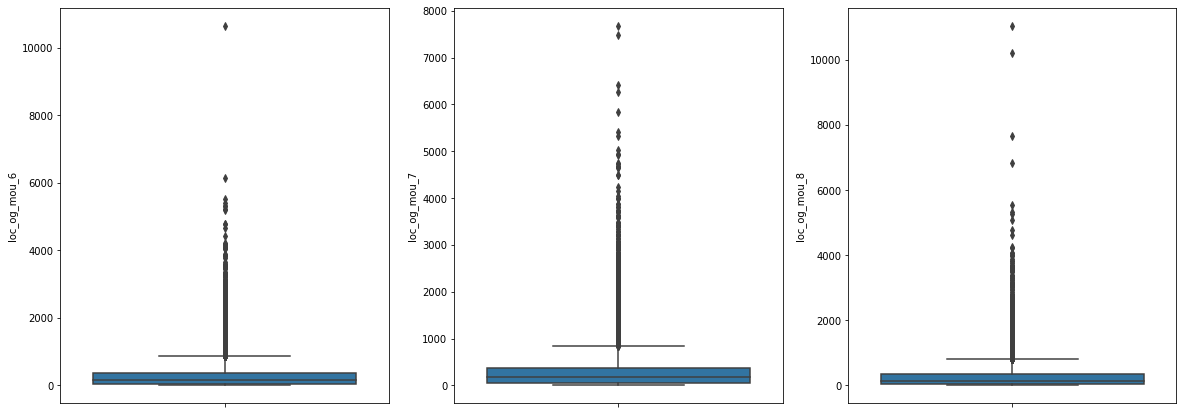

In [680]:
plot_box_plot('loc_og_mou')

In [681]:
data_high_value_cust[loc_og_list].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

,loc_og_t2o_mou,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8
count,29979.0,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000
mean,0.0,94.859102,95.904763,87.551578,181.769237,181.732203,168.879553,6.979198,7.100147,6.496088,1.567723,1.86379,1.714052,283.744623,284.863780,263.299846
std,0.0,236.913861,248.207584,234.706024,249.952768,240.542023,234.099225,22.671604,22.599153,20.228358,6.892348,9.26021,7.401177,379.686893,375.560857,365.408473
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5%,0.0,0.000000,0.000000,0.000000,1.399000,2.159000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.630000,4.808000,0.000000
25%,0.0,8.990000,9.770000,7.760000,32.210000,35.560000,28.480000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,54.110000,60.290000,48.040000
50%,0.0,32.610000,33.190000,28.640000,101.280000,104.360000,89.880000,0.330000,0.400000,0.160000,0.000000,0.00000,0.000000,166.330000,170.460000,148.280000
75%,0.0,91.550000,91.535000,84.700000,240.230000,239.485000,223.615000,5.090000,5.260000,4.680000,0.000000,0.10000,0.050000,374.600000,376.035000,348.340000
90%,0.0,208.006000,207.880000,196.948000,435.364000,437.920000,416.982000,18.380000,18.660000,16.960000,4.040000,4.84200,4.450000,662.456000,658.094000,633.510000
95%,0.0,348.694000,346.993000,324.162000,615.120000,608.183000,585.086000,33.583000,34.095000,31.286000,8.690000,9.95000,9.331000,936.305000,920.378000,883.277000


In [682]:
for item in loc_og_list:
    capping(item, 0.90)

loc_og_t2o_mou : 0
loc_og_t2t_mou_6 : 1.1436063050733667
loc_og_t2t_mou_7 : 1.1424570974869
loc_og_t2t_mou_8 : 1.1716273843651421
loc_og_t2m_mou_6 : 0.8446716101231606
loc_og_t2m_mou_7 : 0.849952877257223
loc_og_t2m_mou_8 : 0.8835521716029662
loc_og_t2f_mou_6 : 1.5213679838599183
loc_og_t2f_mou_7 : 1.5061113394890877
loc_og_t2f_mou_8 : 1.5157461572464752
loc_og_t2c_mou_6 : 1.9563977366628362
loc_og_t2c_mou_7 : 1.9212024519084137
loc_og_t2c_mou_8 : 1.945040746925251
loc_og_mou_6 : 0.7913938759026139
loc_og_mou_7 : 0.7796754941001481
loc_og_mou_8 : 0.837255141962339


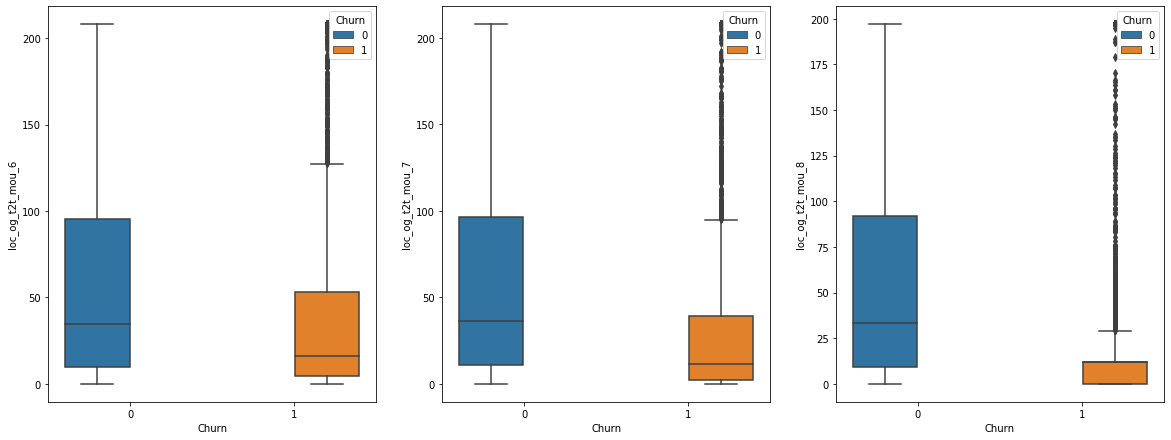

In [683]:
# Ploting box plot for total_rech_num:
plot_box_chart('loc_og_t2t_mou')

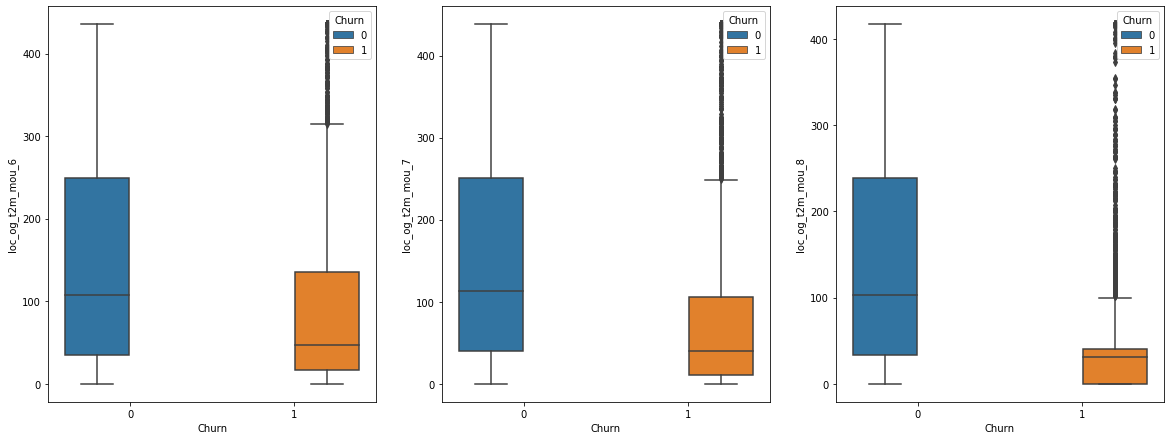

In [684]:
# Ploting box plot for total_rech_num:
plot_box_chart('loc_og_t2m_mou')

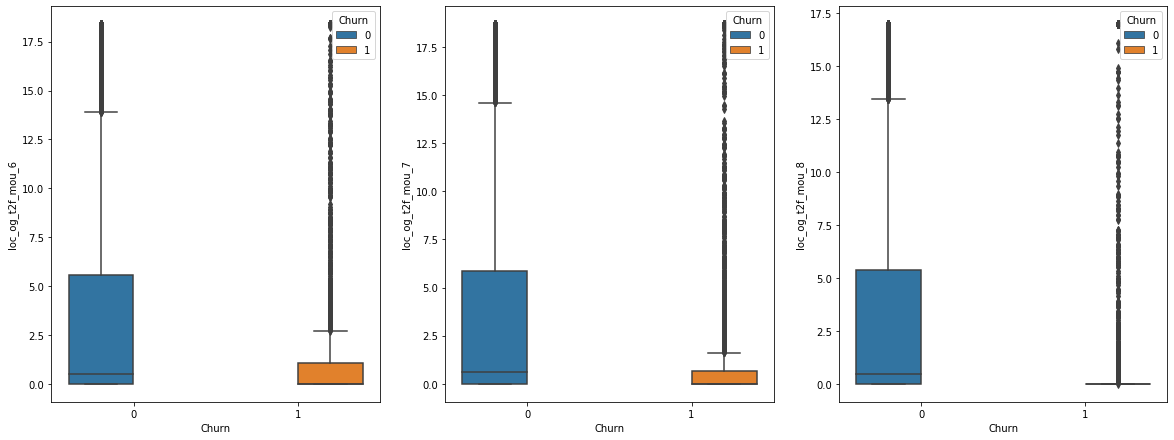

In [685]:
# Ploting box plot for total_rech_num:
plot_box_chart('loc_og_t2f_mou')

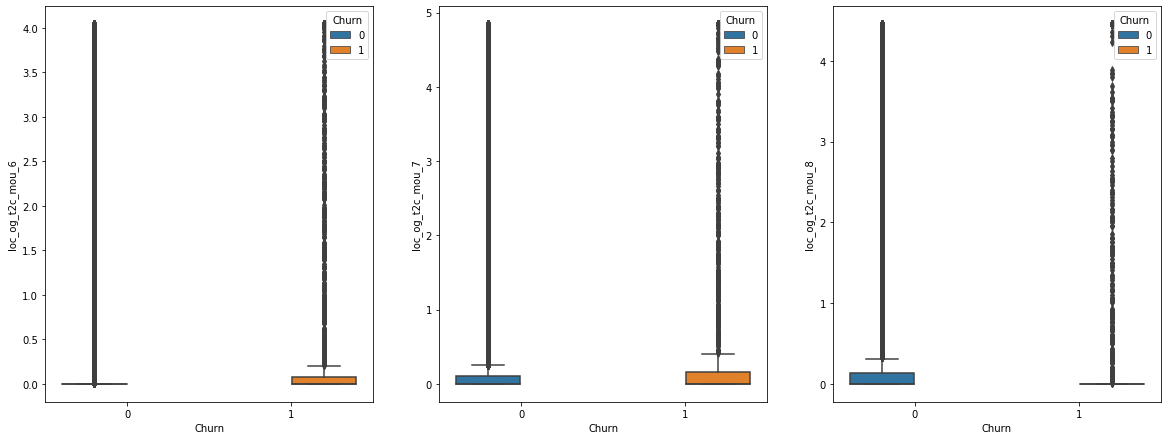

In [686]:
# Ploting box plot for total_rech_num:
plot_box_chart('loc_og_t2c_mou')

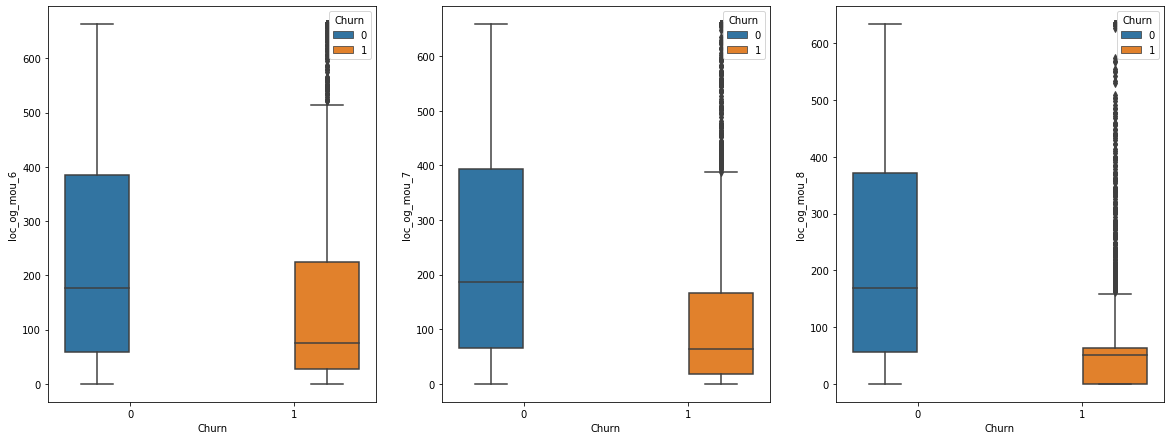

In [687]:
plot_box_chart('loc_og_mou')

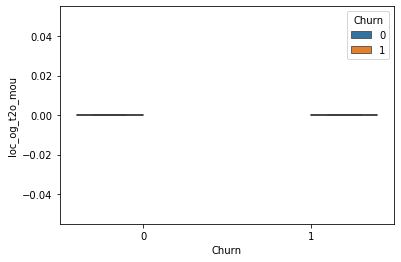

In [688]:
sns.boxplot(data=data_high_value_cust, y="loc_og_t2o_mou",x="Churn",hue="Churn")
plt.show()

- Conclusion:  The trend is very similar for all the above columns. The Local outgoing minutes of usage is very less for the churned customers in the 8th month (action phase). The Local Outgoing T2O does not show any tred. It is almost zero for both churned and non churned customers. 

##### 14. STD Outgoing calls 

In [689]:
std_og_columns =  data_high_value_cust.columns[data_high_value_cust.columns.str.contains('std_og_')]
std_og_list = list(std_og_columns)
std_og_list

['std_og_t2o_mou',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8']

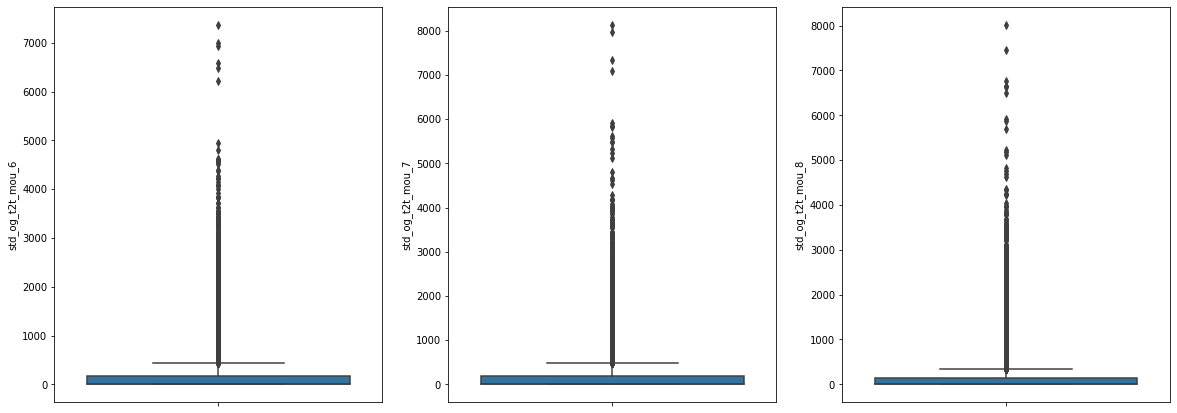

In [690]:
# Ploting box plot for volume recharge 2g data:
plot_box_plot('std_og_t2t_mou')

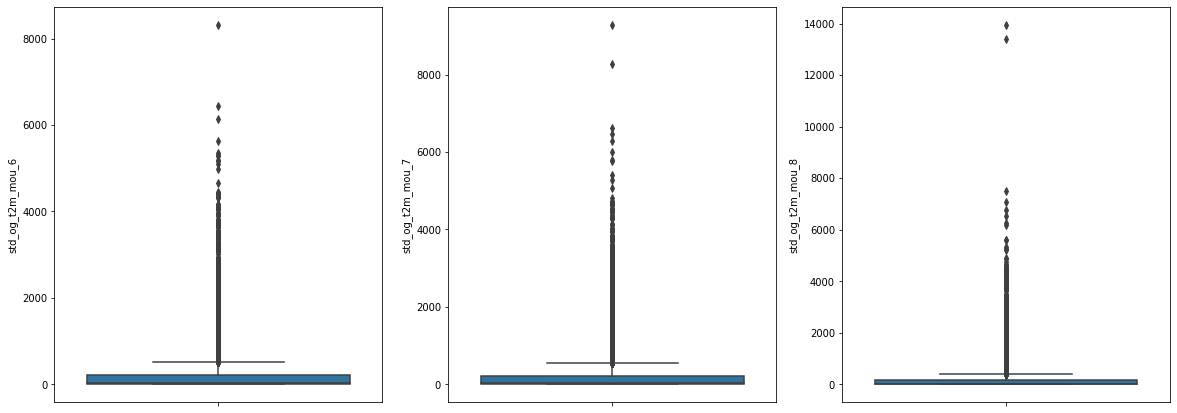

In [691]:
# Ploting box plot for volume recharge 3g data:
plot_box_plot('std_og_t2m_mou')

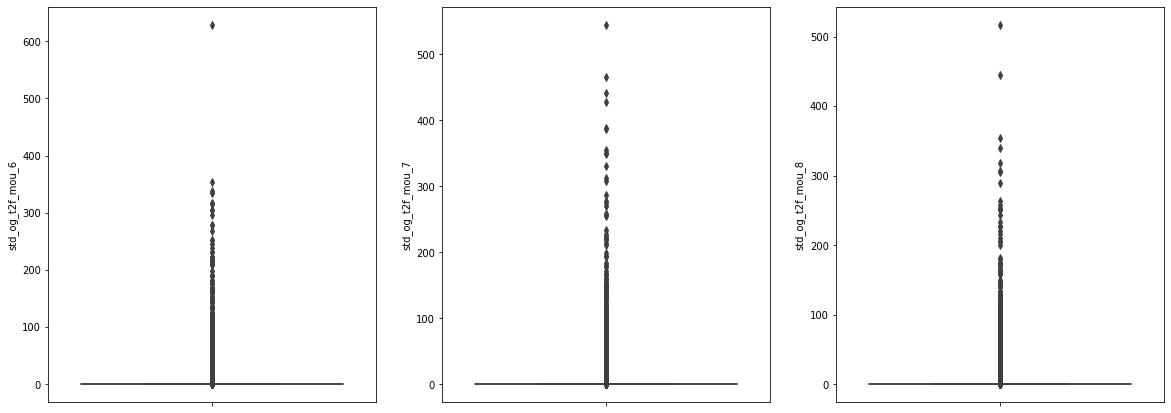

In [692]:
# Ploting box plot for volume recharge 3g data:
plot_box_plot('std_og_t2f_mou')

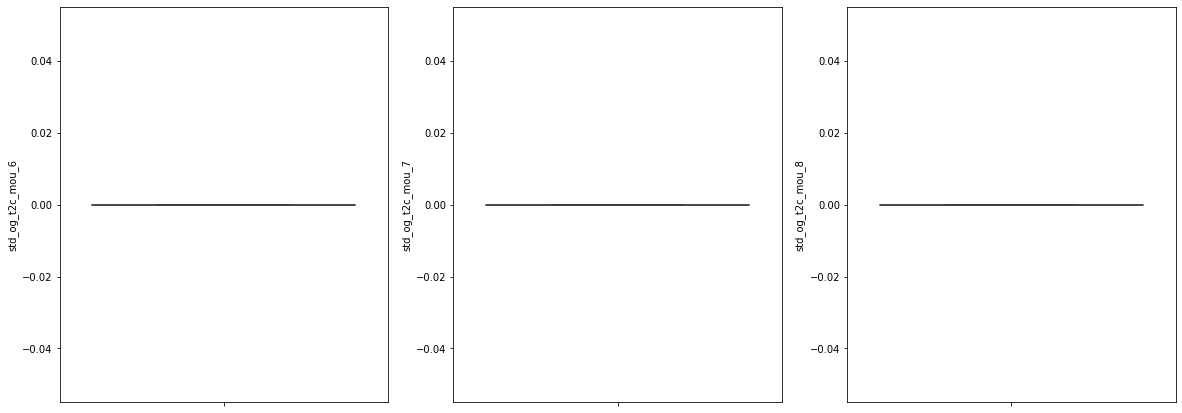

In [693]:
# Ploting box plot for volume recharge 3g data:
plot_box_plot('std_og_t2c_mou')

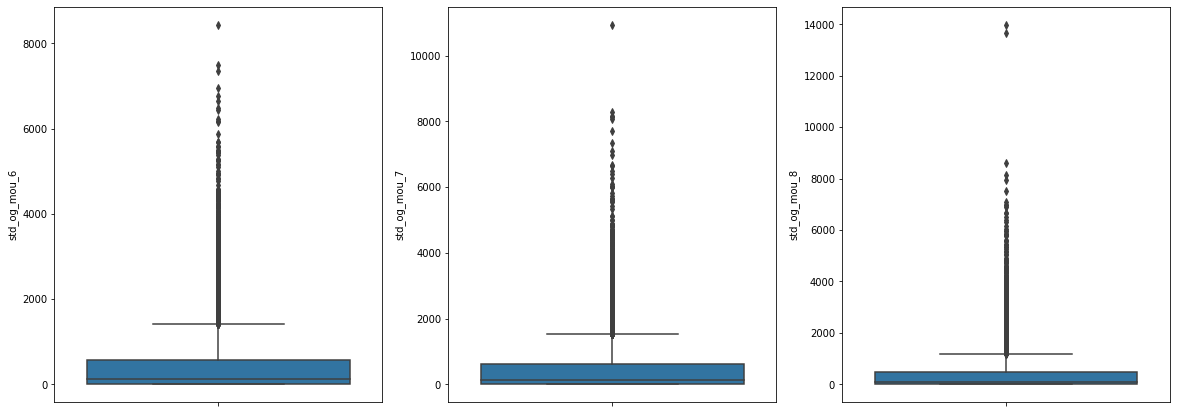

In [694]:
plot_box_plot('std_og_mou')

In [695]:
data_high_value_cust[std_og_list].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

,std_og_t2o_mou,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8
count,29979.0,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.0,29979.0,29979.0,29979.000000,29979.000000,29979.000000
mean,0.0,189.892036,200.060865,172.355233,203.25320,213.553472,179.768836,2.012068,2.035893,1.790935,0.0,0.0,0.0,395.242695,415.729908,354.141054
std,0.0,409.871710,428.303583,410.213116,413.64022,438.088350,416.880090,12.463715,13.357273,11.706431,0.0,0.0,0.0,606.639993,637.601220,616.268555
min,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
5%,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,2.04500,1.760000,0.660000,0.000000,0.000000,0.000000,0.0,0.0,0.0,6.980000,6.660000,3.730000
50%,0.0,12.880000,13.440000,5.960000,37.76000,37.560000,23.730000,0.000000,0.000000,0.000000,0.0,0.0,0.0,126.360000,132.240000,73.160000
75%,0.0,178.355000,191.660000,133.210000,211.21000,223.020000,164.785000,0.000000,0.000000,0.000000,0.0,0.0,0.0,573.375000,615.440000,481.410000
90%,0.0,630.810000,664.440000,567.874000,605.62400,645.882000,531.482000,2.210000,2.182000,1.730000,0.0,0.0,0.0,1141.360000,1177.690000,1057.456000
95%,0.0,986.583000,1029.550000,936.747000,961.14800,1004.757000,886.860000,8.160000,7.930000,7.180000,0.0,0.0,0.0,1559.015000,1625.068000,1519.035000


In [696]:
# removing T2C as there is no change in the values 
std_og_list = ['std_og_t2o_mou', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8']

In [697]:
print(std_og_list)

['std_og_t2o_mou', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8']


In [698]:
for item in std_og_list:
    capping(item, 0.90)

std_og_t2o_mou : 0
std_og_t2t_mou_6 : 1.491854527917792
std_og_t2t_mou_7 : 1.4758169368293093
std_og_t2t_mou_8 : 1.5976831197316357
std_og_t2m_mou_6 : 1.3629429879744128
std_og_t2m_mou_7 : 1.3714414936826296
std_og_t2m_mou_8 : 1.4392050356753845
std_og_t2f_mou_6 : 2.2339115312989715
std_og_t2f_mou_7 : 2.2426693841702536
std_og_t2f_mou_8 : 2.281320197698029
std_og_mou_6 : 1.0056782564740339
std_og_mou_7 : 0.9634364005789144
std_og_mou_8 : 1.1348037184786357


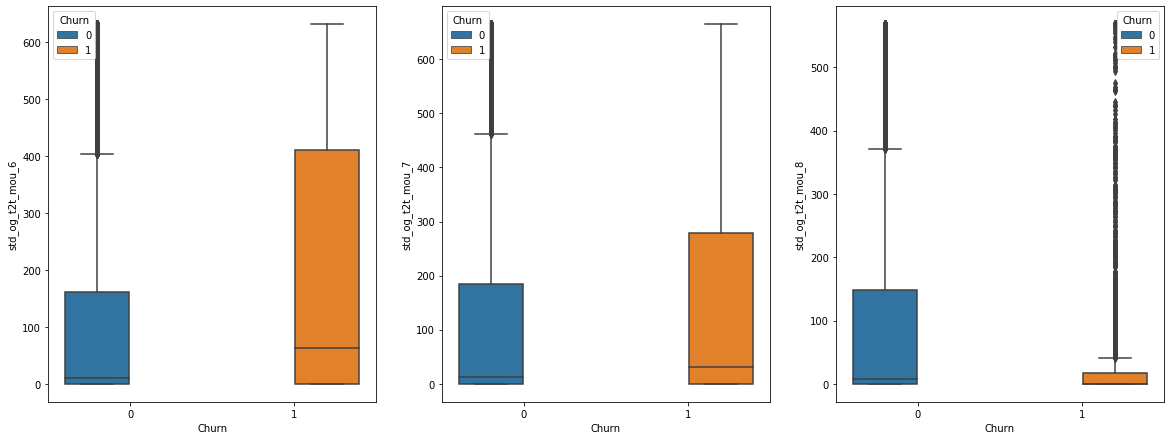

In [699]:
# Ploting box plot for total_rech_num:
plot_box_chart('std_og_t2t_mou')

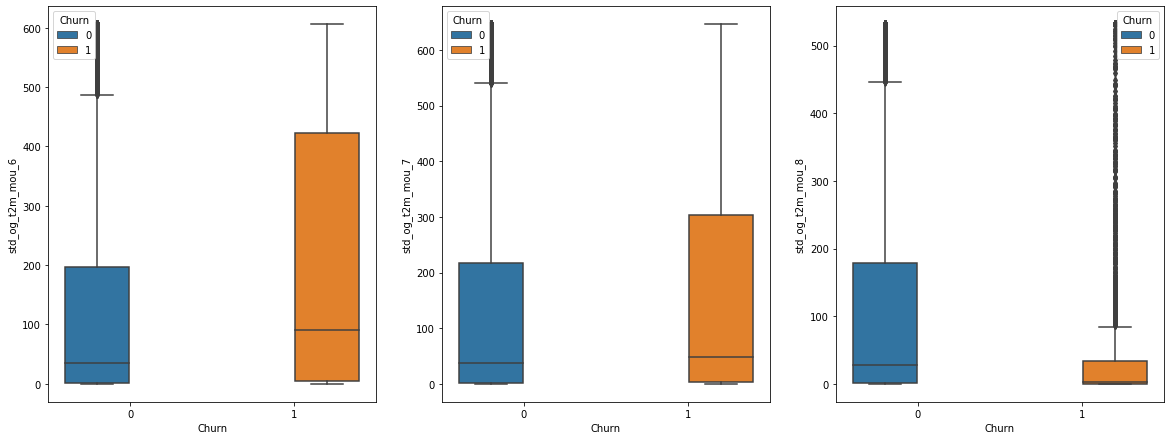

In [700]:
# Ploting box plot for total_rech_num:
plot_box_chart('std_og_t2m_mou')

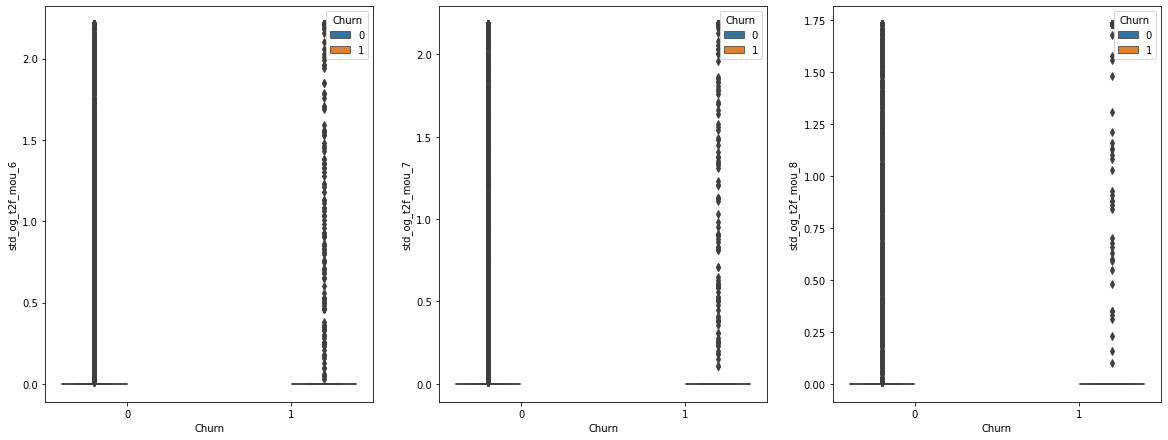

In [701]:
# Ploting box plot for total_rech_num:
plot_box_chart('std_og_t2f_mou')

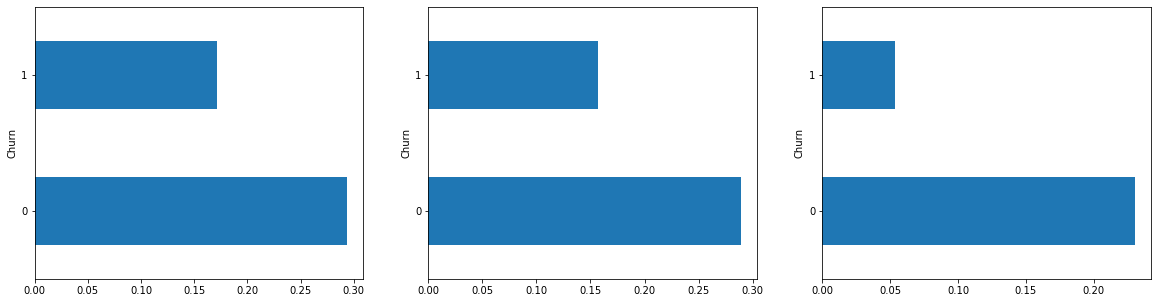

In [702]:
# Ploting bar plot for STD outgoing T2F:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
data_high_value_cust.groupby(['Churn'])['std_og_t2f_mou_6'].mean().plot.barh()

plt.subplot(1,3,2)
data_high_value_cust.groupby(['Churn'])['std_og_t2f_mou_7'].mean().plot.barh()

plt.subplot(1,3,3)
data_high_value_cust.groupby(['Churn'])['std_og_t2f_mou_8'].mean().plot.barh()

plt.show()

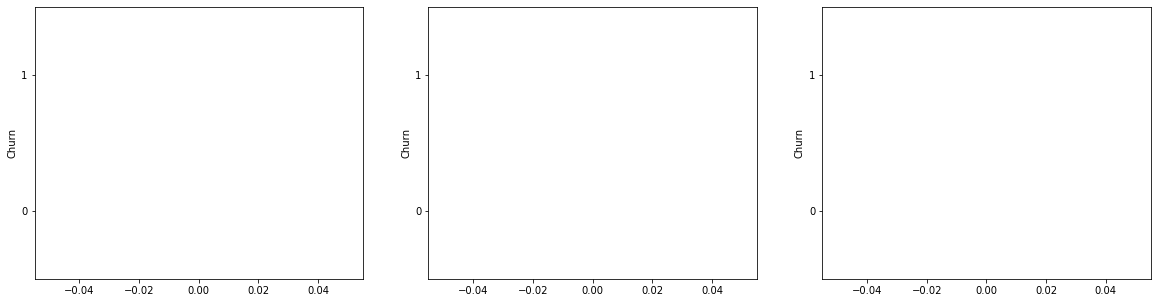

In [703]:
# Ploting bar plot for STD outgoing T2C:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
data_high_value_cust.groupby(['Churn'])['std_og_t2c_mou_6'].mean().plot.barh()

plt.subplot(1,3,2)
data_high_value_cust.groupby(['Churn'])['std_og_t2c_mou_7'].mean().plot.barh()

plt.subplot(1,3,3)
data_high_value_cust.groupby(['Churn'])['std_og_t2c_mou_8'].mean().plot.barh()

plt.show()

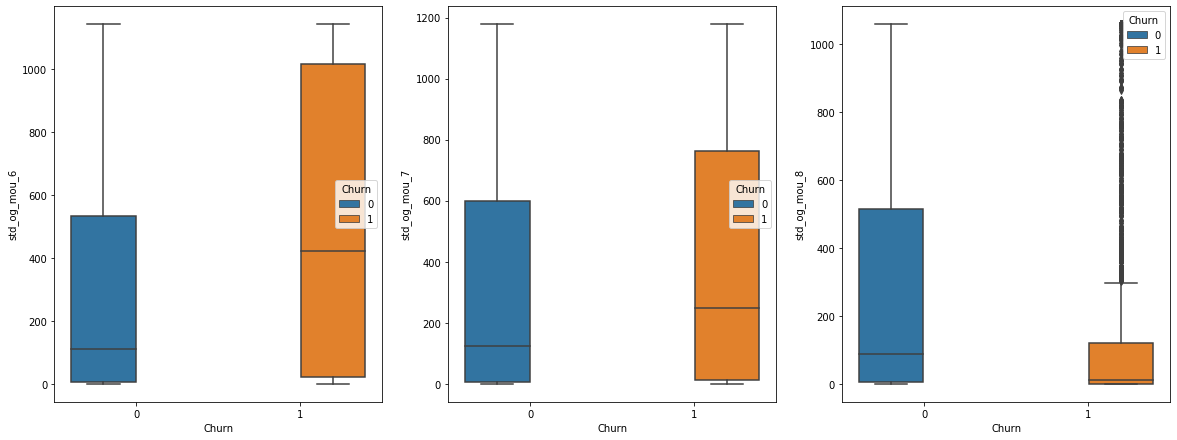

In [704]:
plot_box_chart('std_og_mou')

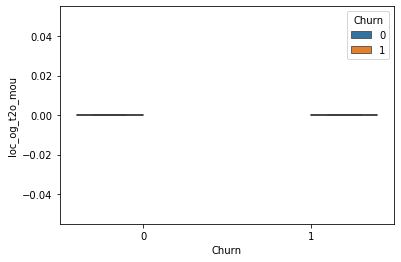

In [705]:
sns.boxplot(data=data_high_value_cust, y="loc_og_t2o_mou",x="Churn",hue="Churn")
plt.show()

- Conclusion:  The trend is very similar for all the above columns. The STD outgoing minutes of usage is very less for the churned customers in the 8th month (action phase). The STD Outgoing T2C does not show any trend. It is almost zero for both churned and non churned customers. 

##### 15. Onnet

In [706]:
onnet_columns =  data_high_value_cust.columns[data_high_value_cust.columns.str.contains('onnet_')]
onnet_list = list(onnet_columns)
onnet_list

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']

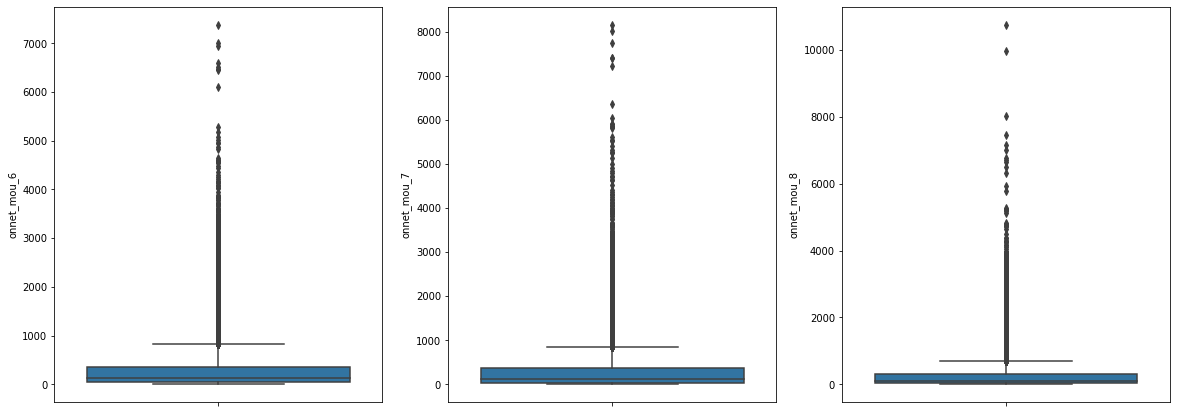

In [707]:
# Ploting box plot for onnet:
plot_box_plot('onnet_mou')

In [708]:
data_high_value_cust[onnet_list].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

,onnet_mou_6,onnet_mou_7,onnet_mou_8
count,29979.000000,29979.000000,29979.000000
mean,296.597992,304.918683,268.821645
std,460.722063,481.771118,466.202921
min,0.000000,0.000000,0.000000
5%,3.860000,3.749000,1.010000
25%,41.170000,41.045000,32.360000
50%,125.890000,125.560000,99.590000
75%,353.500000,360.360000,298.215000
90%,795.354000,825.486000,724.182000
95%,1154.900000,1208.691000,1115.857000


In [709]:
for item in onnet_list:
    capping(item, 0.90)

onnet_mou_6 : 1.149127653005007
onnet_mou_7 : 1.1630181070545762
onnet_mou_8 : 1.2228604345378598


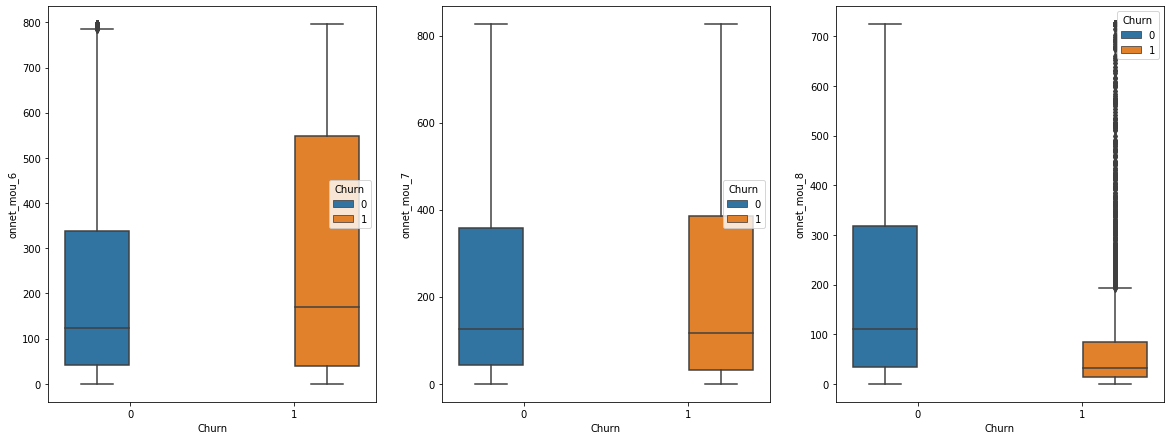

In [710]:
# Ploting box plot for Onnet:
plot_box_chart('onnet_mou')

- Conclusion: The Onnet MOU decreses steadily and is very less for the churned customers in the 8th month (action phase).

##### 15. Offnet

In [711]:
offnet_columns =  data_high_value_cust.columns[data_high_value_cust.columns.str.contains('offnet_')]
offnet_list = list(offnet_columns)
offnet_list

['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']

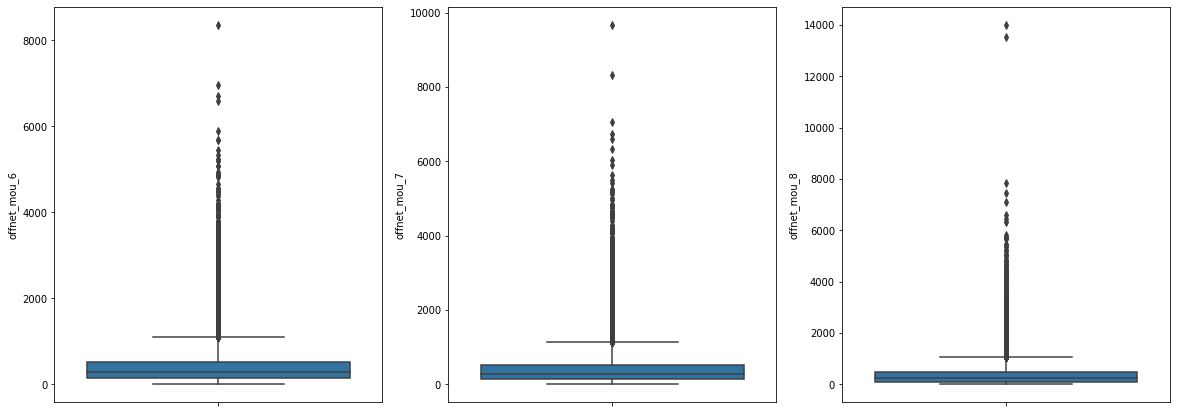

In [712]:
# Ploting box plot for onnet:
plot_box_plot('offnet_mou')

In [713]:
data_high_value_cust[offnet_list].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

,offnet_mou_6,offnet_mou_7,offnet_mou_8
count,29979.000000,29979.000000,29979.000000
mean,419.142919,425.030619,378.042855
std,469.973639,485.988101,475.657798
min,0.000000,0.000000,0.000000
5%,28.180000,28.758000,10.310000
25%,137.340000,135.690000,95.730000
50%,282.260000,282.040000,241.040000
75%,523.625000,532.905000,483.000000
90%,916.490000,935.716000,854.006000
95%,1271.757000,1287.221000,1188.523000


In [714]:
for item in offnet_list:
    capping(item, 0.92)

offnet_mou_6 : 0.9417403222295865
offnet_mou_7 : 0.9283682670027492
offnet_mou_8 : 0.9450060962918835


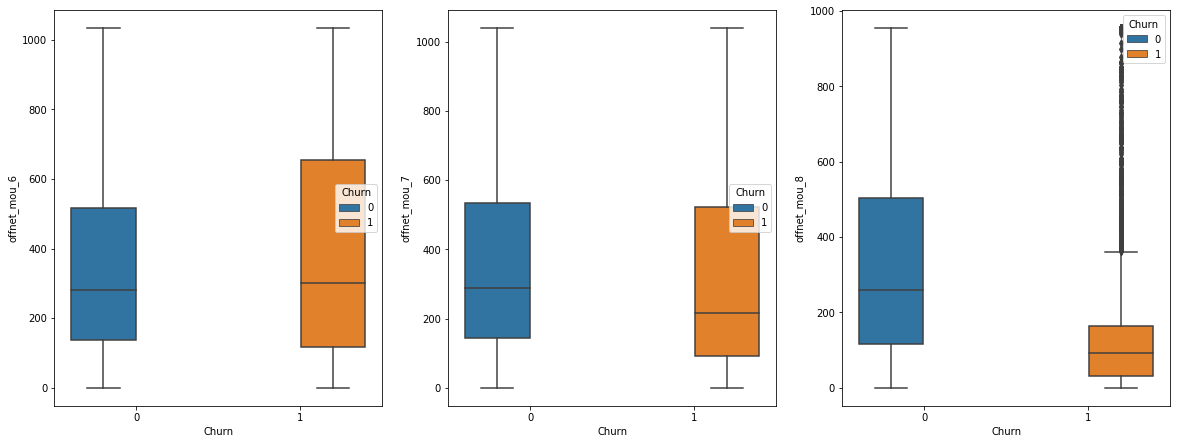

In [715]:
# Ploting box plot for Onnet:
plot_box_chart('offnet_mou')

- Conclusion: The Offnet MOU decreses steadily and is very less for the churned customers in the 8th month (action phase).

##### 16. ISD Outgoing

In [716]:
isd_og_columns =  data_high_value_cust.columns[data_high_value_cust.columns.str.contains('isd_og_')]
isd_og_list = list(isd_og_columns)
isd_og_list

['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8']

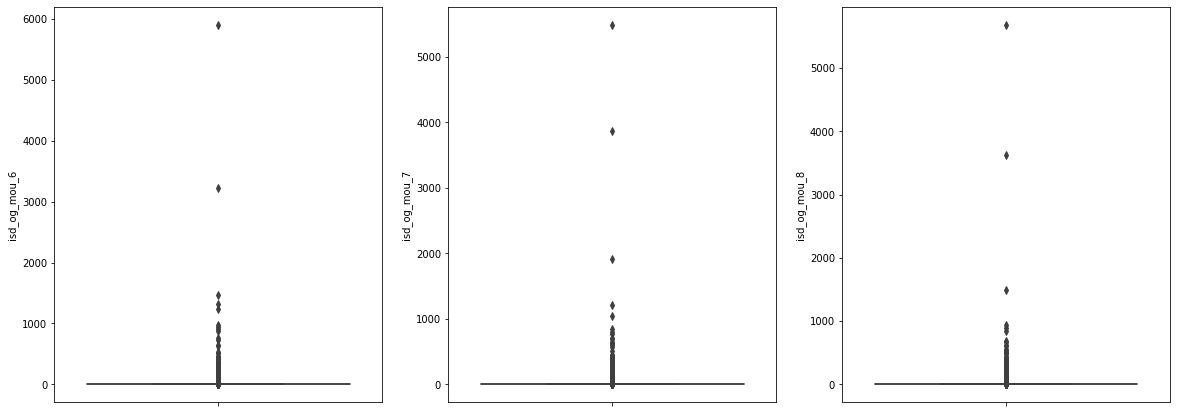

In [717]:
# Ploting box plot for onnet:
plot_box_plot('isd_og_mou')

In [718]:
data_high_value_cust[isd_og_list].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8
count,29979.000000,29979.000000,29979.000000
mean,2.266842,2.207826,2.029675
std,45.942529,45.642568,44.817776
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
90%,0.000000,0.000000,0.000000
95%,1.101000,1.010000,0.550000


In [719]:
for item in isd_og_list:
    capping(item, 0.90)

isd_og_mou_6 : 0
isd_og_mou_7 : 0
isd_og_mou_8 : 0


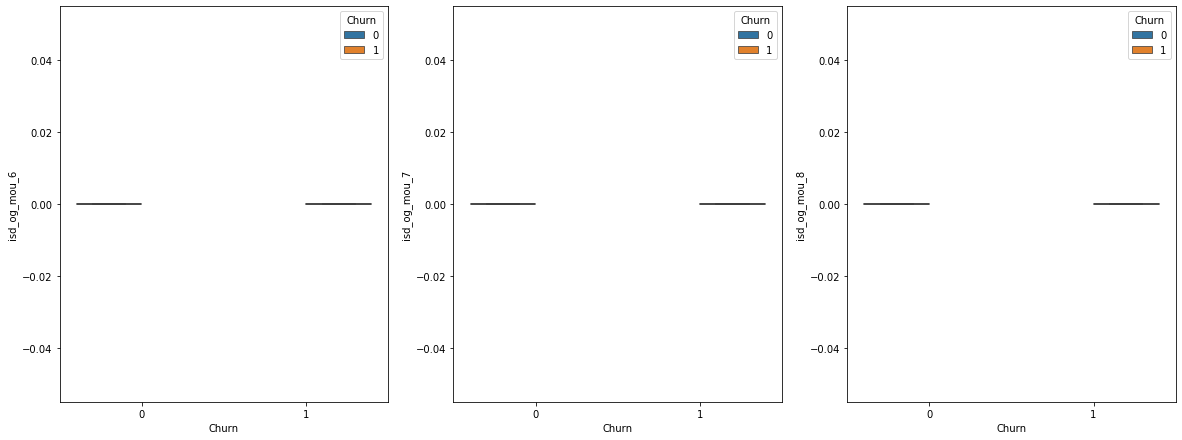

In [720]:
# Ploting box plot for Onnet:
plot_box_chart('isd_og_mou')

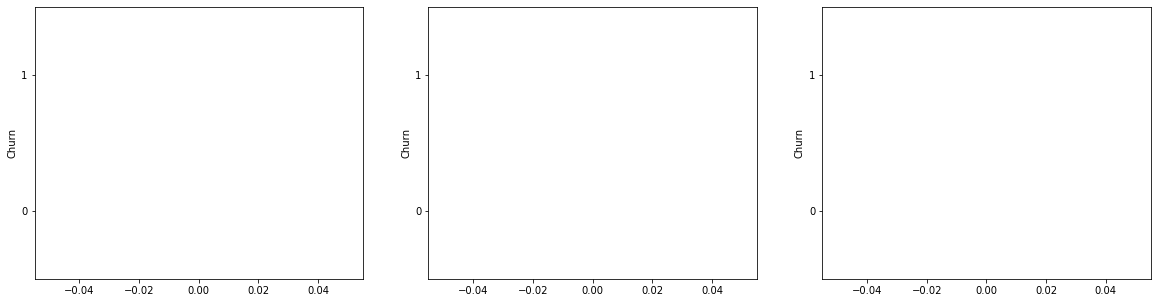

In [721]:
# Ploting bar plot for STD outgoing T2F:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
data_high_value_cust.groupby(['Churn'])['isd_og_mou_6'].mean().plot.barh()

plt.subplot(1,3,2)
data_high_value_cust.groupby(['Churn'])['isd_og_mou_7'].mean().plot.barh()

plt.subplot(1,3,3)
data_high_value_cust.groupby(['Churn'])['isd_og_mou_8'].mean().plot.barh()

plt.show()

- Conclusion: After outlier treatement it shows no trend as most of the values are zero.

##### 17. Roam Outgoing

In [722]:
roam_og_columns =  data_high_value_cust.columns[data_high_value_cust.columns.str.contains('roam_og_')]
roam_og_list = list(roam_og_columns)
roam_og_list

['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8']

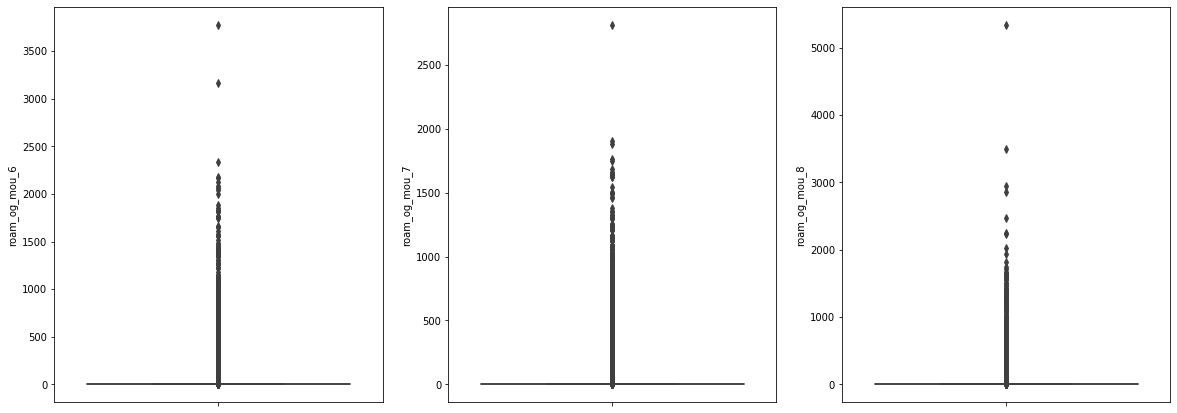

In [723]:
# Ploting box plot for onnet:
plot_box_plot('roam_og_mou')

In [724]:
data_high_value_cust[roam_og_list].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
count,29979.000000,29979.000000,29979.000000
mean,29.348362,22.056425,21.483542
std,118.629898,97.974803,106.294911
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
90%,64.604000,41.216000,37.150000
95%,168.647000,119.447000,114.900000


In [725]:
for item in roam_og_list:
    capping(item, 0.90)

roam_og_mou_6 : 2.0356086825392103
roam_og_mou_7 : 2.137223165222868
roam_og_mou_8 : 2.1544550966882094


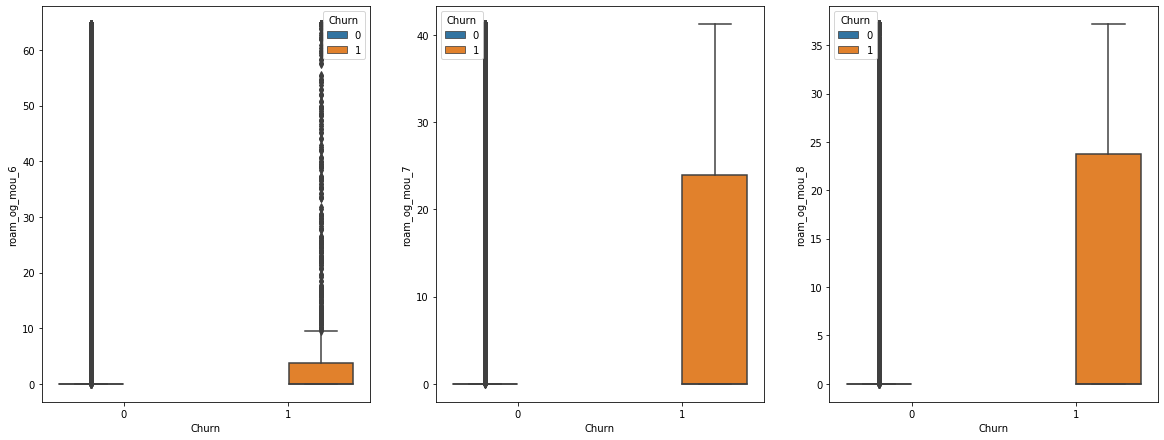

In [726]:
# Ploting box plot for Onnet:
plot_box_chart('roam_og_mou')

- Conclusion: The Roam Outgoing shows a different trend. It steadily incresases and becomes maximum in the Action Phas (month 8). 

##### 18. Special Outgoing MOU

In [727]:
spl_og_mou_columns =  data_high_value_cust.columns[data_high_value_cust.columns.str.contains('spl_og_mou_')]
spl_og_mou_list = list(spl_og_mou_columns)
spl_og_mou_list

['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8']

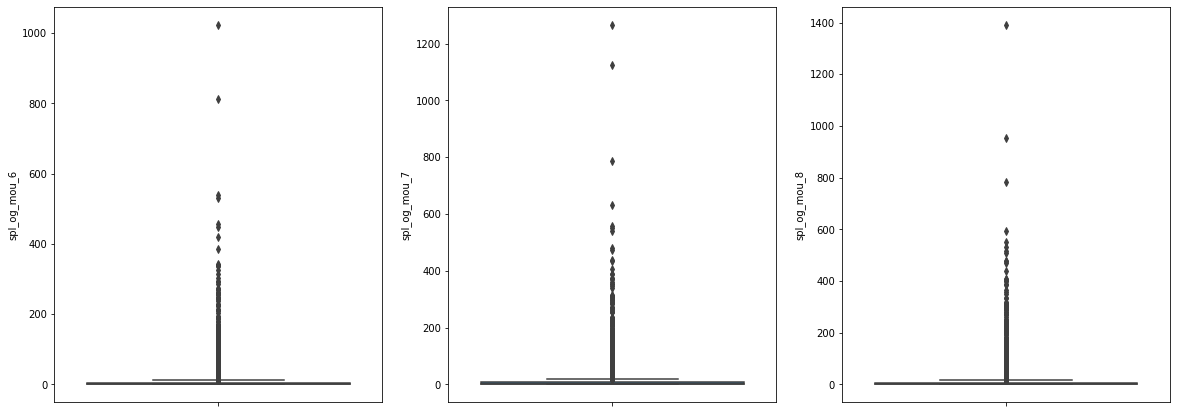

In [728]:
# Ploting box plot for onnet:
plot_box_plot('spl_og_mou')

In [729]:
data_high_value_cust[spl_og_mou_list].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8
count,29979.000000,29979.000000,29979.000000
mean,5.920726,7.429822,6.889372
std,18.630406,23.076593,22.903352
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.210000,0.780000,0.500000
75%,5.170000,7.130000,6.380000
90%,15.940000,19.514000,18.040000
95%,26.812000,32.162000,30.230000


In [730]:
for item in spl_og_mou_list:
    capping(item, 0.90)

spl_og_mou_6 : 1.4167520207697977
spl_og_mou_7 : 1.3187120576908713
spl_og_mou_8 : 1.3491179331436123


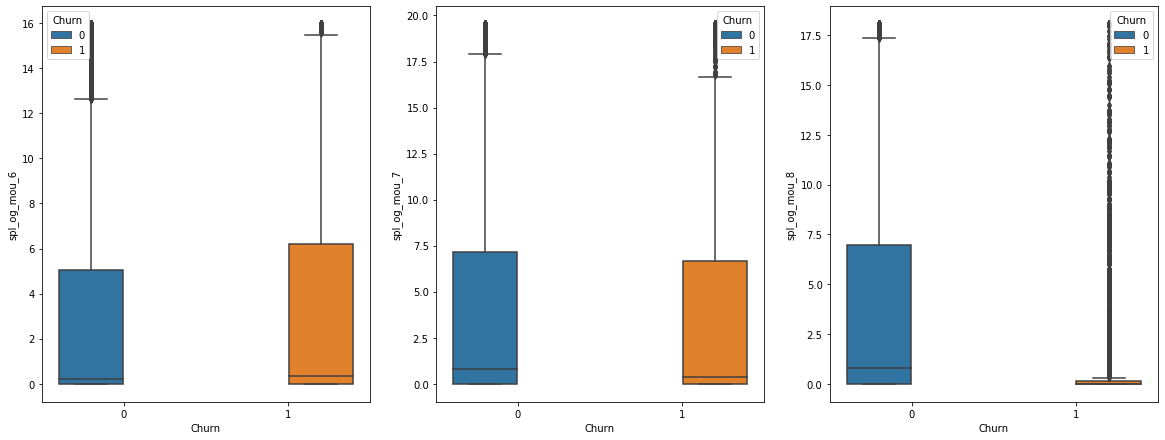

In [731]:
# Ploting box plot for Onnet:
plot_box_chart('spl_og_mou')

- Conclusion: The Special Outgoing is steadily decresing and becomes ver low in the Action Phas (month 8). 

##### 19. Outgoing Others

In [732]:
og_others_columns =  data_high_value_cust.columns[data_high_value_cust.columns.str.contains('og_others_')]
og_others_list = list(og_others_columns)
og_others_list

['og_others_6', 'og_others_7', 'og_others_8']

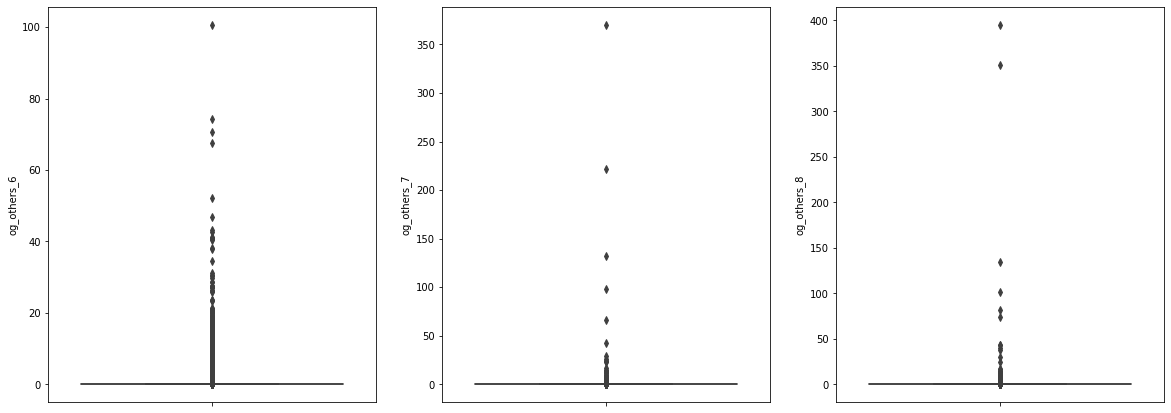

In [733]:
# Ploting box plot for onnet:
plot_box_plot('og_others')

In [734]:
data_high_value_cust[og_others_list].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .99])

,og_others_6,og_others_7,og_others_8
count,29979.000000,29979.000000,29979.000000
mean,0.693200,0.047651,0.059194
std,2.282437,2.743248,3.322091
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
90%,2.260000,0.000000,0.000000
95%,4.140000,0.000000,0.000000


In [735]:
for item in og_others_list:
    capping(item, 0.99)

og_others_6 : 3.364288057699038
og_others_7 : 0
og_others_8 : 0


In [736]:
# The column og_others_6  requires secial capping 
list_spl_1 = ['og_others_6']
for item in list_spl_1:
    capping(item, 0.90)

og_others_6 : 1.8005004895959158


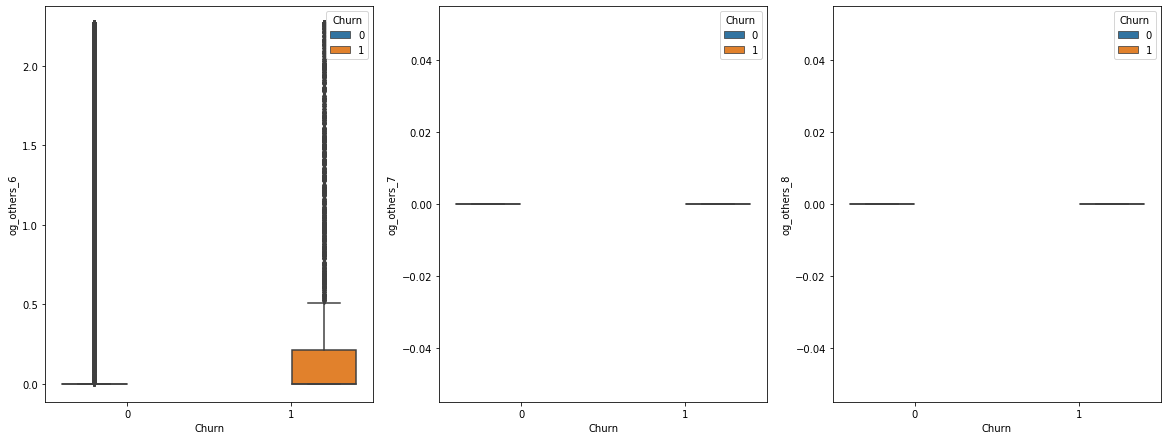

In [737]:
# Ploting box plot for Onnet:
plot_box_chart('og_others')

- Conclusion: The column OG Others 6 shows higher value for churned customer. However, OG Others 7 and 8 are zero for both churned and non churned customers. So, we can say the value is zero in the action phase. 

#### Columns with High Skewness ####

In [738]:
col_list = data_high_value_cust.loc[:,data_high_value_cust.apply(pd.Series.nunique) == 1]
col_list.head(5)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,og_others_7,og_others_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
7,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [739]:
data_high_value_cust = data_high_value_cust.loc[:,data_high_value_cust.apply(pd.Series.nunique) != 1]
data_high_value_cust.shape

(29979, 131)

In [740]:
cor = data_high_value_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

total_og_mou_6           arpu_6               0.600460
std_ic_mou_6             std_ic_t2m_mou_7     0.600494
std_ic_t2m_mou_8         std_ic_t2m_mou_6     0.600611
isd_ic_mou_8             isd_ic_mou_6         0.601727
roam_ic_mou_8            roam_ic_mou_7        0.603549
max_rech_amt_8           max_rech_amt_7       0.605285
count_rech_3g_7          count_rech_3g_6      0.610516
total_og_mou_8           onnet_mou_8          0.613158
                         offnet_mou_8         0.614892
loc_ic_mou_6             loc_ic_t2m_mou_8     0.615872
std_og_mou_7             std_og_t2m_mou_8     0.616374
total_ic_mou_6           loc_ic_t2m_mou_7     0.616811
total_rech_amt_8         total_og_mou_8       0.617762
ic_others_8              ic_others_6          0.618215
std_ic_mou_8             std_ic_t2m_mou_7     0.619497
total_rech_amt_8         arpu_7               0.620137
loc_ic_mou_8             loc_ic_t2m_mou_6     0.620277
total_ic_mou_7           loc_ic_t2m_mou_8     0.620906
std_og_mou

In [741]:
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
                ]

In [742]:
data_high_value_cust.drop(drop_col_list, axis=1, inplace=True)
data_high_value_cust.shape

(29979, 92)

In [743]:
data_high_value_cust.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_Recharge_Amount,Churn,Carpu_8_7,Carpu_7_6,Arlc
7,7000701601,1069.180,1261.84840,1258.7033,57.840,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,37.15,0.0,0.0,0.00,422.16,533.91,255.79,2.21,2.182,1.73,60.86,75.14,77.84,4.50,0.00,6.50,0.00,427.88,355.23,188.04,36.89,11.83,30.39,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,500.0,500.0,455.0,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.380,18.74,1185.0,1,1821.630,280.670,2.323570
8,7001524846,378.721,492.22300,137.3620,413.690,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,4.45,378.09,288.18,63.04,0.00,0.000,0.00,130.26,143.48,98.28,0.00,0.00,10.23,0.00,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,90.0,154.0,30.0,50,0,10,0.0,2.0,3.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,194.458,0.03,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,315.0,21.03,455.078,122.16,519.0,0,-354.861,113.502,1.066990
13,7002191713,492.846,205.67100,593.2600,501.760,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,0.0,0.0,0.49,205.31,53.48,353.99,0.00,0.000,0.00,701.78,138.93,655.18,0.00,0.00,4.78,0.00,215.58,26.11,255.26,115.68,38.29,154.58,0.00,0.00,1.91,423.81,68.09,474.41,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6.0,4.0,11.0,110.0,110.0,130.0,110,50,0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000,0.02,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2607.0,0.00,0.000,0.00,380.0,0,387.589,-287.175,0.165168
16,7000875565,430.975,299.86900,187.8940,50.510,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,0.0,0.0,0.00,315.91,215.64,205.93,0.00,0.000,0.00,30.89,67.09,21.53,0.00,3.26,5.91,0.00,276.86,229.83,211.78,68.79,78.64,6.33,0.51,0.00,2.18,87.99,151.73,82.44,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10.0,6.0,2.0,110.0,110.0,130.0,100,100,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.0,0.00,2.450,21.89,459.0,0,-111.975,-131.106,0.599307
17,7000187447,690.008,104.02848,25.4990,795.354,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,0.0,0.0,0.00,97.54,0.00,0.00,0.00,0.000,0.00,1141.36,0.81,0.00,2.58,0.00,0.00,0.93,81.96,2.31,0.00,8.63,0.00,0.00,0.00,0.00,0.00,9.91,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,2.0,4.0,110.0,0.0,30.0,30,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,667.0,0.00,0.000,0.00,408.0,0,6.519,-671.028,0.367060


### Dropping Mobile-Number ####

In [744]:
data_high_value_cust.drop(['mobile_number'],axis=1,inplace=True)

In [745]:
data_high_value_cust.head()
data_high_value_cust.shape

(29979, 91)

### Train-Test Split ###

In [746]:
from sklearn.model_selection import train_test_split

In [747]:
X = data_high_value_cust.drop(['Churn'], axis=1)

X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_Recharge_Amount,Carpu_8_7,Carpu_7_6,Arlc
7,1069.180,1261.84840,1258.7033,57.840,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,37.15,0.0,0.0,0.00,422.16,533.91,255.79,2.21,2.182,1.73,60.86,75.14,77.84,4.50,0.00,6.50,0.00,427.88,355.23,188.04,36.89,11.83,30.39,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,500.0,500.0,455.0,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.380,18.74,1185.0,1821.630,280.670,2.323570
8,378.721,492.22300,137.3620,413.690,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,4.45,378.09,288.18,63.04,0.00,0.000,0.00,130.26,143.48,98.28,0.00,0.00,10.23,0.00,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,90.0,154.0,30.0,50,0,10,0.0,2.0,3.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,194.458,0.03,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,315.0,21.03,455.078,122.16,519.0,-354.861,113.502,1.066990
13,492.846,205.67100,593.2600,501.760,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,0.0,0.0,0.49,205.31,53.48,353.99,0.00,0.000,0.00,701.78,138.93,655.18,0.00,0.00,4.78,0.00,215.58,26.11,255.26,115.68,38.29,154.58,0.00,0.00,1.91,423.81,68.09,474.41,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6.0,4.0,11.0,110.0,110.0,130.0,110,50,0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000,0.02,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2607.0,0.00,0.000,0.00,380.0,387.589,-287.175,0.165168
16,430.975,299.86900,187.8940,50.510,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,0.0,0.0,0.00,315.91,215.64,205.93,0.00,0.000,0.00,30.89,67.09,21.53,0.00,3.26,5.91,0.00,276.86,229.83,211.78,68.79,78.64,6.33,0.51,0.00,2.18,87.99,151.73,82.44,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10.0,6.0,2.0,110.0,110.0,130.0,100,100,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.0,0.00,2.450,21.89,459.0,-111.975,-131.106,0.599307
17,690.008,104.02848,25.4990,795.354,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,0.0,0.0,0.00,97.54,0.00,0.00,0.00,0.000,0.00,1141.36,0.81,0.00,2.58,0.00,0.00,0.93,81.96,2.31,0.00,8.63,0.00,0.00,0.00,0.00,0.00,9.91,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,2.0,4.0,110.0,0.0,30.0,30,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,667.0,0.00,0.000,0.00,408.0,6.519,-671.028,0.367060


In [748]:
y = data_high_value_cust['Churn']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: Churn, dtype: int32

In [749]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [750]:
X_train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_Recharge_Amount,Carpu_8_7,Carpu_7_6,Arlc
88105,94.4508,653.967,985.600,34.31,52.63,53.040,96.3100,1038.248,953.4708,0.00,0.00,0.00,0.000,0.000,0.00,0.00,4.842,0.25,65.11,55.24,75.13,0.00,0.000,0.00,11.64,1177.69,1057.456,0.00,5.20,5.86,0.00,92.16,40.81,77.39,0.00,1.89,0.00,0.00,0.00,0.00,5.89,17.79,24.33,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,30.0,23.0,0.0,110.0,130.0,0,10,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1078.0,0.00,0.000,0.000,393.0,331.633,653.967,0.506978
34588,343.6390,516.521,160.704,46.49,37.59,17.110,94.7800,97.380,94.4400,0.00,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,126.53,132.76,108.88,0.00,0.000,0.00,14.74,2.21,2.680,0.00,0.00,0.00,0.00,103.31,73.69,63.84,6.64,1.06,4.96,0.00,0.00,0.00,8.31,1.06,5.29,0.00,0.0,0.00,0.00,1.46,0.00,0.00,0.00,0.00,9.0,13.0,7.0,252.0,252.0,50.0,7,23,50,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,184.86,80.420,7.530,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,999.0,137.59,455.078,38.360,484.5,-355.817,172.882,0.340629
16623,898.5900,498.275,518.409,83.06,26.39,11.860,452.5900,476.040,219.4900,0.00,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,513.24,481.04,226.73,0.00,0.000,0.00,0.58,3.09,0.000,15.94,18.63,4.63,0.00,225.83,301.71,237.33,0.00,1.45,0.00,0.38,0.71,3.16,1.18,4.86,3.79,0.00,0.0,0.00,69.01,28.43,1.19,0.00,0.09,0.35,14.0,4.0,12.0,250.0,250.0,289.0,0,0,0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,30.04,73.910,106.020,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2926.0,439.10,455.078,395.168,780.5,20.134,-400.315,0.218190
54904,443.9430,687.776,1022.550,205.29,96.49,58.530,255.8300,1038.248,953.4708,0.00,0.00,0.00,0.000,0.000,0.00,0.00,0.130,0.00,344.16,179.11,99.16,0.00,0.000,0.00,115.24,1169.64,1057.456,1.71,2.01,6.31,0.00,287.68,241.33,104.73,0.63,21.31,3.43,0.00,0.00,0.00,8.28,40.39,40.49,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.0,12.0,11.0,128.0,128.0,144.0,128,128,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1359.0,0.00,0.000,0.000,742.0,334.774,243.833,0.528396
33555,472.1840,310.180,452.128,4.26,13.56,33.160,1031.8712,711.140,953.4708,1.03,0.00,0.00,1.850,0.000,0.00,0.00,0.000,0.00,13.09,23.13,19.86,0.00,0.000,0.00,1121.71,701.58,1057.456,0.00,0.00,0.00,0.00,35.39,59.19,48.43,4.60,0.00,0.00,0.00,0.00,0.00,25.58,6.70,0.84,0.28,0.0,0.00,0.00,0.00,0.00,0.95,0.00,0.00,8.0,4.0,10.0,110.0,110.0,144.0,110,110,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,389.0,0.00,0.000,0.000,471.0,141.948,-162.004,1.057834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

### Feature-Scaling ###

In [751]:
from sklearn.preprocessing import StandardScaler

In [752]:
scaler = StandardScaler()
col_list=list(X_train.columns.values)
# col_list=col_list[2:]
X_train[col_list]= scaler.fit_transform(X_train[col_list])
X_test[col_list] = scaler.transform(X_test[col_list])

In [753]:
#col_list

In [754]:
# X_train

X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_Recharge_Amount,Carpu_8_7,Carpu_7_6,Arlc
88105,-1.675959,0.316175,1.495750,-0.791147,-0.714917,-0.648414,-0.914358,2.169869,2.175238,-0.222957,-0.174142,-0.171427,-0.454685,-0.424078,-0.420677,-0.464661,2.564183,-0.300596,-0.794921,-0.861726,-0.695647,-0.403725,-0.39959,-0.394885,-0.801111,2.022223,2.113975,-0.655222,0.083216,0.274010,-0.485455,-0.484856,-0.651498,-0.522543,-0.212612,-0.175101,-0.206510,-0.146923,-0.151415,-0.133586,-0.331504,-0.237926,-0.169450,-0.434300,-0.097881,-0.250342,-0.165254,-0.154641,-0.153019,-0.078643,-0.088468,-0.090996,-1.593154,2.506491,1.833600,-1.418771,-0.459316,-0.188716,-0.731709,-0.676372,0.225256,-0.669628,-0.686229,-0.687918,-0.564074,-0.579942,-0.590779,-0.455741,-0.457570,-0.443411,-0.486934,-0.487585,-0.482483,-0.354179,-0.362981,-0.341003,-0.462816,-0.450902,-0.476671,-0.363989,-0.370756,-0.362728,-0.186694,-0.478703,-0.476477,-0.464432,-1.033152,1.131412,1.680339,-0.306810
34588,-0.784196,-0.170703,-1.091005,-0.744125,-0.771039,-0.800937,-0.919436,-0.908519,-0.820352,-0.222957,-0.174142,-0.171427,-0.454685,-0.424078,-0.420677,-0.464661,-0.476590,-0.471337,-0.509497,-0.497466,-0.532800,-0.403725,-0.39959,-0.394885,-0.793294,-0.830848,-0.758832,-0.655222,-0.697762,-0.682527,-0.485455,-0.449765,-0.549144,-0.566718,-0.124701,-0.184658,-0.139260,-0.146923,-0.151415,-0.133586,-0.313937,-0.347296,-0.299156,-0.434300,-0.097881,-0.250342,-0.165254,-0.136730,-0.153019,-0.078643,-0.088468,-0.090996,-0.352075,0.224807,-0.363712,0.824007,0.786482,-0.927262,-0.682848,-0.584835,-0.309677,0.328039,1.220493,0.271792,-0.564074,0.821657,0.810068,2.194227,2.185456,-0.443411,2.364830,0.789841,-0.331909,-0.354179,2.754968,2.932529,-0.462816,-0.450902,-0.476671,2.747337,2.697192,-0.362728,-0.268132,0.460083,2.534646,-0.170373,-0.672896,-0.884999,0.440451,-0.448843
16623,1.201792,-0.235337,0.030707,-0.602942,-0.812833,-0.823223,0.267986,0.330403,-0.384281,-0.222957,-0.174142,-0.171427,-0.454685,-0.424078,-0.420677,-0.464661,-0.476590,-0.471337,1.287575,1.139071,0.035841,-0.403725,-0.39959,-0.394885,-0.828999,-0.828713,-0.766131,2.290183,2.100241,0.073235,-0.485455,-0.064166,0.160675,-0.001110,-0.212612,-0.180167,-0.206510,-0.127783,-0.116180,0.020632,-0.365695,-0.322454,-0.309374,-0.434300,-0.097881,-0.250342,0.840330,0.194130,-0.137784,-0.078643,-0.083181,-0.066087,0.337414,-0.983143,0.322948,0.806207,0.768935,1.279145,-0.731709,-0.746785,-0.644010,1.325707,0.267132,1.231503,2.356500,0.821657,0.810068,-0.455741,-0.457570,2.255247,-0.023519,0.686433,1.637540,2.823435,2.754968,2.932529,-0.462816,-0.450902,-0.476671,-0.363989,-0.370756,2.756884,1.718322,2.517307,2.534646,2.564836,0.492521,0.217731,-1.036834,-0.553384
54904,-0.425241,0.435938,1.611620,-0.131057,-0.551252,-0.625108,-0.384978,2.169869,2.175238,-0.222957,-0.174142

In [755]:
X_train.shape

(20985, 90)

### Checking Imbalance ###

In [756]:
y.value_counts()

0    27390
1     2589
Name: Churn, dtype: int64

In [757]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

In [758]:
X_train_res, y_train_res=smote.fit_resample(X_train, y_train)

# X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [760]:
X_train_res

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_Recharge_Amount,Carpu_8_7,Carpu_7_6,Arlc
0,-1.675959,0.316175,1.495750,-0.791147,-0.714917,-0.648414,-0.914358,2.169869,2.175238,-0.222957,-0.174142,-0.171427,-0.454685,-0.424078,-0.420677,-0.464661,2.564183,-0.300596,-0.794921,-0.861726,-0.695647,-0.403725,-0.39959,-0.394885,-0.801111,2.022223,2.113975,-0.655222,0.083216,0.274010,-0.485455,-0.484856,-0.651498,-0.522543,-0.212612,-0.175101,-0.206510,-0.146923,-0.151415,-0.133586,-0.331504,-0.237926,-0.169450,-0.434300,-0.097881,-0.250342,-0.165254,-0.154641,-0.153019,-0.078643,-0.088468,-0.090996,-1.593154,2.506491,1.833600,-1.418771,-0.459316,-0.188716,-0.731709,-0.676372,0.225256,-0.669628,-0.686229,-0.687918,-0.564074,-0.579942,-0.590779,-0.455741,-0.457570,-0.443411,-0.486934,-0.487585,-0.482483,-0.354179,-0.362981,-0.341003,-0.462816,-0.450902,-0.476671,-0.363989,-0.370756,-0.362728,-0.186694,-0.478703,-0.476477,-0.464432,-1.033152,1.131412,1.680339,-0.306810
1,-0.784196,-0.170703,-1.091005,-0.744125,-0.771039,-0.800937,-0.919436,-0.908519,-0.820352,-0.222957,-0.174142,-0.171427,-0.454685,-0.424078,-0.420677,-0.464661,-0.476590,-0.471337,-0.509497,-0.497466,-0.532800,-0.403725,-0.39959,-0.394885,-0.793294,-0.830848,-0.758832,-0.655222,-0.697762,-0.682527,-0.485455,-0.449765,-0.549144,-0.566718,-0.124701,-0.184658,-0.139260,-0.146923,-0.151415,-0.133586,-0.313937,-0.347296,-0.299156,-0.434300,-0.097881,-0.250342,-0.165254,-0.136730,-0.153019,-0.078643,-0.088468,-0.090996,-0.352075,0.224807,-0.363712,0.824007,0.786482,-0.927262,-0.682848,-0.584835,-0.309677,0.328039,1.220493,0.271792,-0.564074,0.821657,0.810068,2.194227,2.185456,-0.443411,2.364830,0.789841,-0.331909,-0.354179,2.754968,2.932529,-0.462816,-0.450902,-0.476671,2.747337,2.697192,-0.362728,-0.268132,0.460083,2.534646,-0.170373,-0.672896,-0.884999,0.440451,-0.448843
2,1.201792,-0.235337,0.030707,-0.602942,-0.812833,-0.823223,0.267986,0.330403,-0.384281,-0.222957,-0.174142,-0.171427,-0.454685,-0.424078,-0.420677,-0.464661,-0.476590,-0.471337,1.287575,1.139071,0.035841,-0.403725,-0.39959,-0.394885,-0.828999,-0.828713,-0.766131,2.290183,2.100241,0.073235,-0.485455,-0.064166,0.160675,-0.001110,-0.212612,-0.180167,-0.206510,-0.127783,-0.116180,0.020632,-0.365695,-0.322454,-0.309374,-0.434300,-0.097881,-0.250342,0.840330,0.194130,-0.137784,-0.078643,-0.083181,-0.066087,0.337414,-0.983143,0.322948,0.806207,0.768935,1.279145,-0.731709,-0.746785,-0.644010,1.325707,0.267132,1.231503,2.356500,0.821657,0.810068,-0.455741,-0.457570,2.255247,-0.023519,0.686433,1.637540,2.823435,2.754968,2.932529,-0.462816,-0.450902,-0.476671,-0.363989,-0.370756,2.756884,1.718322,2.517307,2.534646,2.564836,0.492521,0.217731,-1.036834,-0.553384
3,-0.425241,0.435938,1.611620,-0.131057,-0.551252,-0.625108,-0.384978,2.169869,2.175238,-0.222957,-0.174142,-0.171427,-0.45

### Decision Tree-Without PCA ###

In [761]:
from sklearn.tree import DecisionTreeClassifier

In [762]:
dt = DecisionTreeClassifier(random_state=42)

#### Hyper-Parameter Tuning ####

In [763]:
from sklearn.model_selection import GridSearchCV

In [764]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2,4,6],
    'min_samples_leaf': [500, 1000, 2000, 5000,10000],
    'max_features': [5, 10, 15, 20],
    'criterion': ["gini", "entropy"]
}

In [765]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4,n_jobs=-1, verbose=1, scoring = "accuracy")

In [766]:
%%time
grid_search.fit(X_train_res, y_train_res)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   23.1s finished


Wall time: 23.7 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6],
                         'max_features': [5, 10, 15, 20],
                         'min_samples_leaf': [500, 1000, 2000, 5000, 10000]},
             scoring='accuracy', verbose=1)

In [767]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=20, min_samples_leaf=500,
                       random_state=42)

In [768]:
dt_best = grid_search.best_estimator_

In [769]:
import sklearn.metrics as metrics

In [770]:
# def evaluate_model(dt_classifier):
print("Train Accuracy :", accuracy_score(y_train_res, dt_best.predict(X_train_res)))
print("Train Confusion Matrix:")
confusion_matrix_dt_train=metrics.confusion_matrix(y_train_res, dt_best.predict(X_train_res))
print(confusion_matrix_dt_train)
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, dt_best.predict(X_test)))
print("Test Confusion Matrix:")
confusion_matrix_dt_test=metrics.confusion_matrix(y_test, dt_best.predict(X_test))
print(confusion_matrix_dt_test)
#     return confusion_matrix_dt_train

Train Accuracy : 0.8496434334495861
Train Confusion Matrix:
[[16576  2635]
 [ 3142 16069]]
--------------------------------------------------
Test Accuracy : 0.8541249722036913
Test Confusion Matrix:
[[7057 1122]
 [ 190  625]]


In [771]:
# evaluate_model(dt_best)

### Test Metrics ####

In [772]:
TP = confusion_matrix_dt_test[1,1] # true positive 
TN = confusion_matrix_dt_test[0,0] # true negatives
FP = confusion_matrix_dt_test[0,1] # false positives
FN = confusion_matrix_dt_test[1,0] # false negatives

#### Recall on Test Dataset ####

In [773]:
confusion_matrix_dt_test[1,1]/(confusion_matrix_dt_test[1,0]+confusion_matrix_dt_test[1,1])

0.7668711656441718

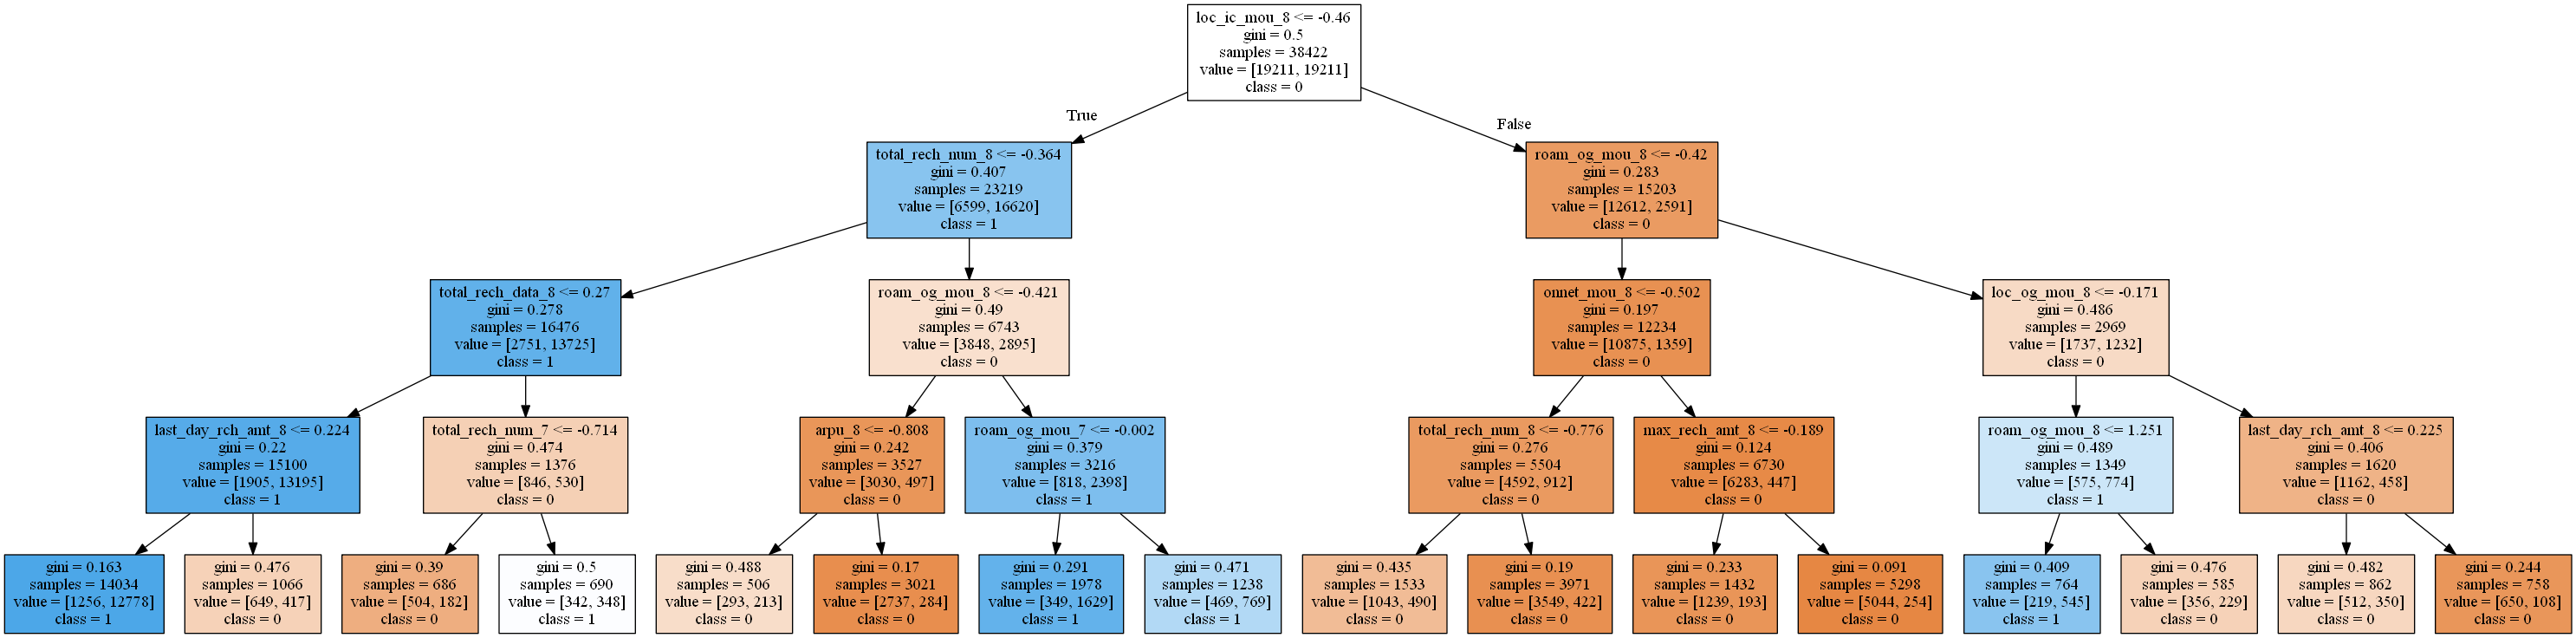

In [774]:
import pydotplus
import sklearn.tree as tree
from IPython.display import Image

dt_feature_names = list(X_train_res.columns)
dt_target_names = [str(s) for s in y_train_res.unique()]
tree.export_graphviz(dt_best, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [775]:
from sklearn.metrics import classification_report

In [776]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8179
           1       0.36      0.77      0.49       815

    accuracy                           0.85      8994
   macro avg       0.67      0.81      0.70      8994
weighted avg       0.92      0.85      0.88      8994



In [777]:
# feature importance
importance = dict(zip(X_train_res.columns, dt_best.feature_importances_))
importance

{'arpu_6': 0.0,
 'arpu_7': 0.0,
 'arpu_8': 0.008862943811523891,
 'onnet_mou_6': 0.0,
 'onnet_mou_7': 0.0,
 'onnet_mou_8': 0.005709299866045244,
 'offnet_mou_6': 0.0,
 'offnet_mou_7': 0.0,
 'offnet_mou_8': 0.0,
 'roam_ic_mou_6': 0.0,
 'roam_ic_mou_7': 0.0,
 'roam_ic_mou_8': 0.0,
 'roam_og_mou_6': 0.0,
 'roam_og_mou_7': 0.005967339469359641,
 'roam_og_mou_8': 0.16646458221460558,
 'loc_og_t2c_mou_6': 0.0,
 'loc_og_t2c_mou_7': 0.0,
 'loc_og_t2c_mou_8': 0.0,
 'loc_og_mou_6': 0.0,
 'loc_og_mou_7': 0.0,
 'loc_og_mou_8': 0.01192820336160158,
 'std_og_t2f_mou_6': 0.0,
 'std_og_t2f_mou_7': 0.0,
 'std_og_t2f_mou_8': 0.0,
 'std_og_mou_6': 0.0,
 'std_og_mou_7': 0.0,
 'std_og_mou_8': 0.0,
 'spl_og_mou_6': 0.0,
 'spl_og_mou_7': 0.0,
 'spl_og_mou_8': 0.0,
 'og_others_6': 0.0,
 'loc_ic_mou_6': 0.0,
 'loc_ic_mou_7': 0.0,
 'loc_ic_mou_8': 0.5227756654452722,
 'std_ic_t2t_mou_6': 0.0,
 'std_ic_t2t_mou_7': 0.0,
 'std_ic_t2t_mou_8': 0.0,
 'std_ic_t2f_mou_6': 0.0,
 'std_ic_t2f_mou_7': 0.0,
 'std_ic_t2f_mou

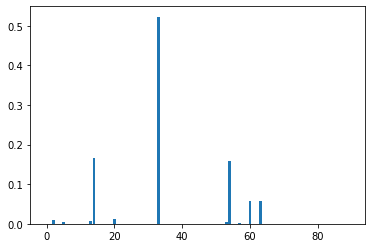

In [778]:
# plot
plt.bar(range(len(dt_best.feature_importances_)), dt_best.feature_importances_)
plt.show()

### Appyling PCA ###

In [436]:
from sklearn.decomposition import PCA

In [437]:
pca = PCA(random_state=42)

In [438]:
pca.fit(X_train_res)

PCA(random_state=42)

In [439]:
# X_train_pca = pca.fit_transform(X_train_res)
# print(X_train_pca.shape)

# X_test_pca = pca.transform(X_test)
# print(X_test_pca.shape)

In [440]:
# %matplotlib inline
# fig = plt.figure(figsize = (12,8))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')
# plt.show()

In [441]:
X_train_res_pca = pca.fit_transform(X_train_res)
print(X_train_res_pca.shape)


X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(38422, 90)
(8994, 90)


In [442]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.11017037, 0.07801011, 0.07226705, 0.05850715, 0.0462161 ,
       0.04439392, 0.04220327, 0.03157422, 0.02963694, 0.02672533,
       0.02399979, 0.02139423, 0.02055695, 0.0188471 , 0.01762735,
       0.01566335, 0.01497768, 0.01445495, 0.01429173, 0.01247861,
       0.01183201, 0.01178393, 0.01094859, 0.01068768, 0.01022551,
       0.00988649, 0.00974673, 0.00944795, 0.00904301, 0.00848006,
       0.00830894, 0.00815437, 0.0072896 , 0.00712843, 0.00693126,
       0.00660429, 0.00644063, 0.00633794, 0.00612909, 0.00583934,
       0.0052321 , 0.00518489, 0.00496573, 0.00468166, 0.00461651,
       0.00434295, 0.00429481, 0.00422566, 0.00403903, 0.00383047,
       0.00366343, 0.00348199, 0.00332452, 0.00313287, 0.00305127,
       0.00295571, 0.00292498, 0.0028652 , 0.00278324, 0.00265863,
       0.00253964, 0.00250641, 0.00243973, 0.00240838, 0.00220591,
       0.00205514, 0.00196817, 0.00191942, 0.00186209, 0.00170422,
       0.00157403, 0.00154303, 0.00153156, 0.00136151, 0.00119

In [443]:
explained_variance=pca.explained_variance_ratio_

explained_variance

array([0.11017037, 0.07801011, 0.07226705, 0.05850715, 0.0462161 ,
       0.04439392, 0.04220327, 0.03157422, 0.02963694, 0.02672533,
       0.02399979, 0.02139423, 0.02055695, 0.0188471 , 0.01762735,
       0.01566335, 0.01497768, 0.01445495, 0.01429173, 0.01247861,
       0.01183201, 0.01178393, 0.01094859, 0.01068768, 0.01022551,
       0.00988649, 0.00974673, 0.00944795, 0.00904301, 0.00848006,
       0.00830894, 0.00815437, 0.0072896 , 0.00712843, 0.00693126,
       0.00660429, 0.00644063, 0.00633794, 0.00612909, 0.00583934,
       0.0052321 , 0.00518489, 0.00496573, 0.00468166, 0.00461651,
       0.00434295, 0.00429481, 0.00422566, 0.00403903, 0.00383047,
       0.00366343, 0.00348199, 0.00332452, 0.00313287, 0.00305127,
       0.00295571, 0.00292498, 0.0028652 , 0.00278324, 0.00265863,
       0.00253964, 0.00250641, 0.00243973, 0.00240838, 0.00220591,
       0.00205514, 0.00196817, 0.00191942, 0.00186209, 0.00170422,
       0.00157403, 0.00154303, 0.00153156, 0.00136151, 0.00119

In [444]:
import matplotlib.pyplot as plt

In [445]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.11017037, 0.18818048, 0.26044753, 0.31895468, 0.36517078,
       0.4095647 , 0.45176797, 0.48334219, 0.51297913, 0.53970446,
       0.56370426, 0.58509849, 0.60565544, 0.62450255, 0.64212989,
       0.65779324, 0.67277092, 0.68722588, 0.70151761, 0.71399623,
       0.72582824, 0.73761217, 0.74856076, 0.75924844, 0.76947394,
       0.77936044, 0.78910717, 0.79855512, 0.80759813, 0.81607819,
       0.82438713, 0.8325415 , 0.8398311 , 0.84695953, 0.85389079,
       0.86049508, 0.86693571, 0.87327365, 0.87940274, 0.88524208,
       0.89047417, 0.89565906, 0.90062479, 0.90530645, 0.90992296,
       0.91426591, 0.91856072, 0.92278638, 0.92682541, 0.93065588,
       0.93431931, 0.93780129, 0.94112581, 0.94425868, 0.94730995,
       0.95026566, 0.95319064, 0.95605584, 0.95883908, 0.96149771,
       0.96403735, 0.96654376, 0.96898349, 0.97139187, 0.97359778,
       0.97565292, 0.97762109, 0.97954051, 0.98140261, 0.98310682,
       0.98468085, 0.98622389, 0.98775544, 0.98911696, 0.99031

#### Making the Scree Plot ####

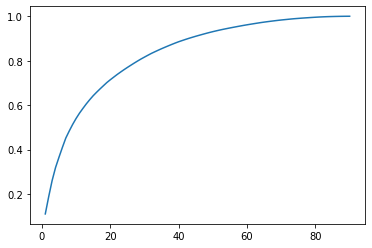

In [446]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

#### PCA with 45 Components ####

In [447]:
pca_45 = PCA(n_components=45)

X_train_pca_45 = pca_45.fit_transform(X_train_res_pca)
print(X_train_pca_45.shape)

X_test_pca_45 = pca_45.transform(X_test_pca)
print(X_test_pca_45.shape)

(38422, 45)
(8994, 45)


In [448]:
# X_train_res_pca.shape

X_test_pca_45.shape
X_train_pca_45.shape
y_train_res.shape

(38422,)

In [449]:
# X_test_res_pca.shape

### Logistic Regression-With PCA ####

In [450]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression()
lr_pca1.fit(X_train_pca_45, y_train_res)

y_train_pred45=lr_pca1.predict(X_train_pca_45)

# Predicted probabilities
#y_pred45 = lr_pca1.predict(X_test_pca_45)

# Converting y_pred to a dataframe which is an array
#df_y_pred = pd.DataFrame(y_pred45)

### Metrics on Train Dataset ###

In [451]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
#print(confusion_matrix(y_test,y_pred45))

confusion_matrix=metrics.confusion_matrix(y_train_res,y_train_pred45)

confusion_matrix

array([[16228,  2983],
       [ 2839, 16372]], dtype=int64)

In [452]:
print("Logistic Regression in Train accuracy with PCA: ",accuracy_score(y_train_res,y_train_pred45))

Logistic Regression in Train accuracy with PCA:  0.8484722294518765


In [453]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [454]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_res, y_train_pred45, drop_intermediate = False )

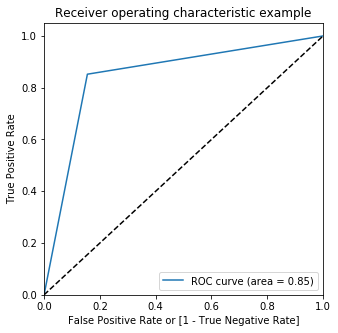

In [455]:
draw_roc(y_train_res, y_train_pred45)

In [456]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

### Precision ###

In [457]:
confusion_matrix[1,1]/(confusion_matrix[0,1]+confusion_matrix[1,1])

0.8458796176698528

### Recall ###

In [458]:
confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])

0.8522200822445474

### Metrics on Test Set ###

In [459]:
y_test_pred45 = lr_pca1.predict(X_test_pca_45)

In [460]:
confusion_matrix=metrics.confusion_matrix(y_test,y_test_pred45)

confusion_matrix

array([[6898, 1281],
       [ 149,  666]], dtype=int64)

In [461]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

### Accuracy ###

In [462]:
print("Logistic Regression accuracy in Test with PCA: ",accuracy_score(y_test,y_test_pred45))

Logistic Regression accuracy in Test with PCA:  0.8410051145207916


### Precision ###

In [463]:
confusion_matrix[1,1]/(confusion_matrix[0,1]+confusion_matrix[1,1])

0.3420647149460709

### Recall ###

In [464]:
confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])

0.8171779141104294

### Classification Matrix for Logistic Regression

In [465]:
print(classification_report(y_test, y_test_pred45))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      8179
           1       0.34      0.82      0.48       815

    accuracy                           0.84      8994
   macro avg       0.66      0.83      0.69      8994
weighted avg       0.92      0.84      0.87      8994



## XG BOOST

In [466]:
import xgboost as xgb
from sklearn import metrics

xgclf = xgb.XGBClassifier()

xgclf.fit(X_train_pca_45,y_train_res)

XGBClassifier()

In [467]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_res,
                                                              y_score=xgclf.predict_proba(X_train_pca_45)[:, 1]))

AUC on train data by XGBoost = 0.9383790571896083


In [468]:
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgclf.predict_proba(X_test_pca_45)[:, 1]))

AUC on test data by XGBoost = 0.8910207721855388


In [469]:
from sklearn import model_selection

In [470]:
xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train_pca_45,y_train_res)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3], 'max_depth': [6],
                         'min_child_weight': [1], 'n_estimators': [100]},
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [471]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.9807131721738145
XGBClassifier(learning_rate=0.3, max_depth=6)


In [472]:
# 1st-Run for best hyperparameters
parameters = {'learning_rate': [0.4 ,0.45],
               'max_depth': [6,8],
               'min_child_weight': [1, 3],
               'n_estimators': [50, 100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train_pca_45,y_train_res)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.4, 0.45], 'max_depth': [6, 8],
                         'min_child_weight': [1, 3],
                         'n_estimators': [50, 100]},
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [473]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.4, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 100}
0.9883135846966896
XGBClassifier(learning_rate=0.4, max_depth=8)


In [474]:
# 2nd-Run for best hyperparameters
parameters = {'learning_rate': [0.3, 0.4],
              'max_depth': [6, 8],
              'min_child_weight': [1, 2],
              'n_estimators': [100, 150]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train_pca_45,y_train_res)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.4], 'max_depth': [6, 8],
                         'min_child_weight': [1, 2],
                         'n_estimators': [100, 150]},
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [475]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.4, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 150}
0.9894769641606525
XGBClassifier(learning_rate=0.4, max_depth=8, n_estimators=150)


In [126]:
# 3rd-Run for best hyperparameters
parameters = {'learning_rate': [0.2, 0.3, 0.4],
              'max_depth': [8, 10],
              'min_child_weight': [1, 2],
              'n_estimators': [150, 200]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train_pca_45,y_train_res)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.4], 'max_depth': [8, 10],
                         'min_child_weight': [1, 2],
                         'n_estimators': [150, 200]},
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [127]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200}
0.9897682952202344
XGBClassifier(learning_rate=0.2, max_depth=10, n_estimators=200)


In [128]:
# 3rd-Run for best hyperparameters
parameters = {'learning_rate': [0.2, 0.3],
              'max_depth': [10, 12],
              'min_child_weight': [1, 2],
              'n_estimators': [200, 250]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train_pca_45,y_train_res)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3], 'max_depth': [10, 12],
                         'min_child_weight': [1, 2],
                         'n_estimators': [200, 250]},
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [129]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 250}
0.9900514716691039
XGBClassifier(learning_rate=0.2, max_depth=10, n_estimators=250)


In [130]:
# 3rd-Run for best hyperparameters
parameters = {'learning_rate': [0.2, 0.3],
              'max_depth': [14, 16],
              'min_child_weight': [1, 2],
              'n_estimators': [250, 300]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train_pca_45,y_train_res)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3], 'max_depth': [14, 16],
                         'min_child_weight': [1, 2],
                         'n_estimators': [250, 300]},
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [131]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 14, 'min_child_weight': 1, 'n_estimators': 300}
0.9902843287113217
XGBClassifier(learning_rate=0.2, max_depth=14, n_estimators=300)


In [476]:
final_model = xgb.XGBClassifier(learning_rate=0.2,
                                max_depth=14,
                                min_child_weight=1,
                                n_estimators=300)

final_model.fit(X_train_pca_45,y_train_res)

XGBClassifier(learning_rate=0.2, max_depth=14, n_estimators=300)

In [477]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_res,
                                                            y_score=final_model.predict_proba(X_train_pca_45)[:, 1]))

AUC on train data by XGBoost = 1.0


In [478]:
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=final_model.predict_proba(X_test_pca_45)[:, 1]))

AUC on test data by XGBoost = 0.8991487251880282


In [479]:
y_pred_XG = final_model.predict(X_test_pca_45)

In [480]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred_XG)

confusion_matrix

array([[7742,  437],
       [ 341,  474]], dtype=int64)

In [481]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

### Accuracy ###

In [482]:
print("XGBoost accuracy in Test with PCA: ",accuracy_score(y_test,y_pred_XG))

XGBoost accuracy in Test with PCA:  0.9134978874805426


### Precision ###

In [483]:
confusion_matrix[1,1]/(confusion_matrix[0,1]+confusion_matrix[1,1])

0.5203073545554336

### Recall ###

In [484]:
confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])

0.5815950920245399

In [485]:
print(classification_report(y_test,y_pred_XG))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8179
           1       0.52      0.58      0.55       815

    accuracy                           0.91      8994
   macro avg       0.74      0.76      0.75      8994
weighted avg       0.92      0.91      0.92      8994



### Random Forest-With PCA ####

In [503]:
from sklearn.ensemble import RandomForestClassifier

#### Grid Search-Hyperparameter Tuning ####

In [504]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [176]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2,4],
    'min_samples_leaf': [500, 1000],
    'max_features': [5,10],
    'n_estimators': [10, 30]
}

In [177]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [178]:
%%time
grid_search.fit(X_train_pca_45,y_train_res)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   27.4s finished


Wall time: 29.1 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4], 'max_features': [5, 10],
                         'min_samples_leaf': [500, 1000],
                         'n_estimators': [10, 30]},
             scoring='accuracy', verbose=1)

In [179]:
rf_best = grid_search.best_estimator_

In [180]:
rf_best

RandomForestClassifier(max_depth=4, max_features=10, min_samples_leaf=500,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [182]:
y_pred_RF = rf_best.predict(X_test_pca_45)

In [183]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred_RF)

confusion_matrix

array([[6811, 1368],
       [ 244,  571]], dtype=int64)

In [185]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

### Accuracy ###

In [186]:
print("Logistic Regression accuracy in Test with PCA: ",accuracy_score(y_test,y_pred_RF))

Logistic Regression accuracy in Test with PCA:  0.9133867022459418


### Precision ###

In [187]:
confusion_matrix[1,1]/(confusion_matrix[0,1]+confusion_matrix[1,1])

0.29448169159360493

### Recall ###

In [188]:
confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])

0.7006134969325153

## 2nd iteration

In [189]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [4,6],
    'min_samples_leaf': [300, 500, 1000],
    'max_features': [5,10, 20],
    'n_estimators': [10, 30, 50]
}

In [190]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [191]:
%%time
grid_search.fit(X_train_pca_45,y_train_res)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  4.8min finished


Wall time: 4min 49s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6], 'max_features': [5, 10, 20],
                         'min_samples_leaf': [300, 500, 1000],
                         'n_estimators': [10, 30, 50]},
             scoring='accuracy', verbose=1)

In [192]:
rf_best = grid_search.best_estimator_

In [193]:
rf_best

RandomForestClassifier(max_depth=6, max_features=10, min_samples_leaf=300,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [194]:
y_pred_RF = rf_best.predict(X_test_pca_45)

In [195]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred_RF)

confusion_matrix

array([[6962, 1217],
       [ 225,  590]], dtype=int64)

In [196]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

### Accuracy ###

In [197]:
print("Logistic Regression accuracy in Test with PCA: ",accuracy_score(y_test,y_pred_RF))

Logistic Regression accuracy in Test with PCA:  0.9133867022459418


### Precision ###

In [198]:
confusion_matrix[1,1]/(confusion_matrix[0,1]+confusion_matrix[1,1])

0.32650802434975096

### Recall ###

In [199]:
confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])

0.7239263803680982

### 3rd Iteration

In [200]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [6, 8, 10],
    'min_samples_leaf': [200, 300, 500],
    'max_features': [5,10, 20],
    'n_estimators': [40, 50, 80]
}

In [201]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [202]:
%%time
grid_search.fit(X_train_pca_45,y_train_res)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 17.5min finished


Wall time: 17min 35s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'max_features': [5, 10, 20],
                         'min_samples_leaf': [200, 300, 500],
                         'n_estimators': [40, 50, 80]},
             scoring='accuracy', verbose=1)

In [203]:
rf_best = grid_search.best_estimator_

In [204]:
rf_best

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=200,
                       n_estimators=80, n_jobs=-1, random_state=42)

In [205]:
y_pred_RF = rf_best.predict(X_test_pca_45)

In [206]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred_RF)

confusion_matrix

array([[7033, 1146],
       [ 218,  597]], dtype=int64)

In [207]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

### Accuracy ###

In [208]:
print("Logistic Regression accuracy in Test with PCA: ",accuracy_score(y_test,y_pred_RF))

Logistic Regression accuracy in Test with PCA:  0.9133867022459418


### Precision ###

In [209]:
confusion_matrix[1,1]/(confusion_matrix[0,1]+confusion_matrix[1,1])

0.342512908777969

### Recall ###

In [210]:
confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])

0.7325153374233129

## 4th Iteration

In [505]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [50, 100, 200],
    'max_features': [10],
    'n_estimators': [80, 100, 120]
}

In [506]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [507]:
%%time
grid_search.fit(X_train_pca_45,y_train_res)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 11.9min finished


Wall time: 12min 1s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20], 'max_features': [10],
                         'min_samples_leaf': [50, 100, 200],
                         'n_estimators': [80, 100, 120]},
             scoring='accuracy', verbose=1)

In [508]:
rf_best = grid_search.best_estimator_

In [509]:
rf_best

RandomForestClassifier(max_depth=15, max_features=10, min_samples_leaf=50,
                       n_estimators=80, n_jobs=-1, random_state=42)

In [510]:
y_pred_RF = rf_best.predict(X_test_pca_45)

In [511]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred_RF)

confusion_matrix

array([[7277,  902],
       [ 221,  594]], dtype=int64)

In [512]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

### Accuracy ###

In [516]:
print("Logistic Regression accuracy in Test with PCA: ",accuracy_score(y_test,y_pred_RF))

Logistic Regression accuracy in Test with PCA:  0.8751389815432511


### Precision ###

In [517]:
confusion_matrix[1,1]/(confusion_matrix[0,1]+confusion_matrix[1,1])

0.39705882352941174

### Recall ###

In [518]:
confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])

0.7288343558282209

#### Classification matrix for Random Forest

In [519]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8179
           1       0.40      0.73      0.51       815

    accuracy                           0.88      8994
   macro avg       0.68      0.81      0.72      8994
weighted avg       0.92      0.88      0.89      8994



### Decision Tree-With PCA ###

In [486]:
from sklearn.tree import DecisionTreeClassifier

In [487]:
dt_pca = DecisionTreeClassifier(random_state=42)

In [488]:
from sklearn.model_selection import GridSearchCV

In [489]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2,4,6],
    'min_samples_leaf': [500, 1000, 2000, 5000,10000],
    'max_features': [5, 10, 15, 20],
    'criterion': ["gini", "entropy"]
}

In [490]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt_pca, 
                           param_grid=params, 
                           cv=4,n_jobs=-1, verbose=1, scoring = "accuracy")

In [491]:
X_train_pca_45.shape
y_train_res.shape

(38422,)

In [492]:
%%time
grid_search.fit(X_train_pca_45, y_train_res)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   30.3s finished


Wall time: 32 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6],
                         'max_features': [5, 10, 15, 20],
                         'min_samples_leaf': [500, 1000, 2000, 5000, 10000]},
             scoring='accuracy', verbose=1)

In [493]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=20,
                       min_samples_leaf=500, random_state=42)

In [494]:
dt_best_pca = grid_search.best_estimator_

In [495]:
print("Train Accuracy :", accuracy_score(y_train_res, dt_best_pca.predict(X_train_pca_45)))
print("Train Confusion Matrix:")
print(metrics.confusion_matrix(y_train_res, dt_best_pca.predict(X_train_pca_45)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, dt_best_pca.predict(X_test_pca_45)))
print("Train Confusion Matrix:")
print(metrics.confusion_matrix(y_test, dt_best_pca.predict(X_test_pca_45)))
print("-"*50)

Train Accuracy : 0.7891052001457498
Train Confusion Matrix:
[[14920  4291]
 [ 3812 15399]]
--------------------------------------------------
Test Accuracy : 0.7738492328218812
Train Confusion Matrix:
[[6342 1837]
 [ 197  618]]
--------------------------------------------------


In [497]:
y_pred_DT_PCA = dt_best_pca.predict(X_test_pca_45)

In [498]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred_DT_PCA)

confusion_matrix

array([[6342, 1837],
       [ 197,  618]], dtype=int64)

In [499]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

### Accuracy ###

In [500]:
print("Decision Tree accuracy in Test with PCA: ",accuracy_score(y_test,y_pred_DT_PCA))

Decision Tree accuracy in Test with PCA:  0.7738492328218812


### Precision ###

In [501]:
confusion_matrix[1,1]/(confusion_matrix[0,1]+confusion_matrix[1,1])

0.25173116089613035

### Recall ###

In [502]:
confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])

0.758282208588957

In [496]:
print(classification_report(y_test, dt_best_pca.predict(X_test_pca_45)))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      8179
           1       0.25      0.76      0.38       815

    accuracy                           0.77      8994
   macro avg       0.61      0.77      0.62      8994
weighted avg       0.90      0.77      0.82      8994



### Descriptive Analysis ###

-Top 5 features affecting churn rate as derived from Decision Tree without PCA are as follows-

- loc_ic_mou_8
- roam_og_mou_8
- total_rech_num_8
- total_rech_data_8
- last_day_rch_amt_8

##### Plotting the Important Features

In [535]:
imp_features_list = ['loc_ic_mou_8','roam_og_mou_8','total_rech_num_8','total_rech_data_8','last_day_rch_amt_8']

In [529]:
# create box plot for  6th, 7th and 8th month
def plot_box_important(attribute):
    plt.figure(figsize =(8,5))
    df = data_high_value_cust
    sns.boxplot(data=df, y=attribute,x="Churn",hue="Churn")
    plt.show()

##### 1. loc_ic_mou_8

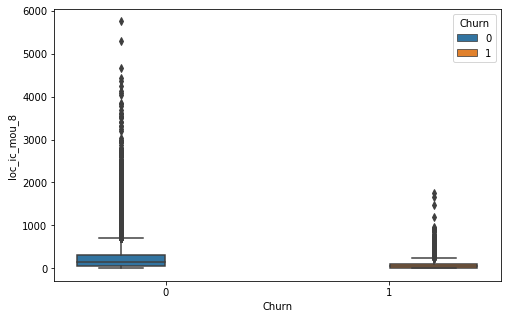

In [530]:
plot_box_important('loc_ic_mou_8')

##### 2. roam_og_mou_8

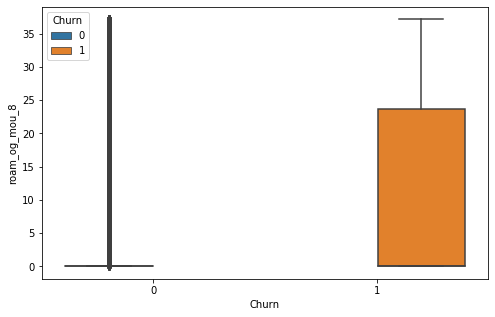

In [531]:
plot_box_important('roam_og_mou_8')

##### 3. total_rech_num_8

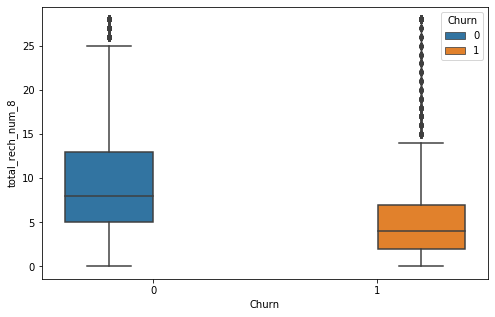

In [532]:
plot_box_important('total_rech_num_8')

##### 4. total_rech_data_8

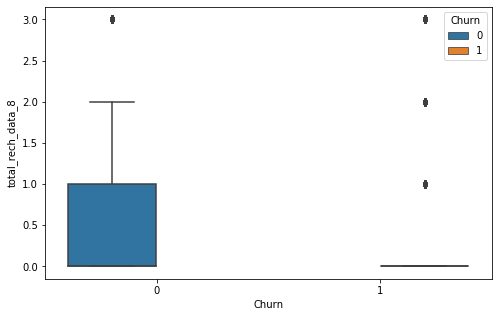

In [539]:
plot_box_important('total_rech_data_8')

##### 5. last_day_rch_amt_8

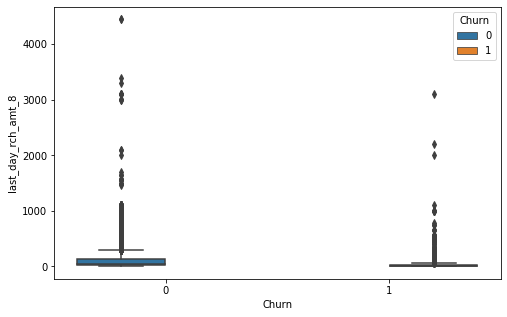

In [534]:
plot_box_important('last_day_rch_amt_8')

### Suggestions and Recomendations

#### Company should look at high end customers which have low values in Action Phase in the below fields-

-Local Incoming calls within the circle having low minutes of usage

-Roaming outgoing calls having high minutes of usage

-Low Total Recharge Number

-Low Total Recharge Data

-Last Day Recharge Amount is far away

### Model Selection

If company wants to predict overall all high valued customers then logistic regression should be used since it has highest Recall percentage for both the classes. So, I suggest the company to use Logistic regression model to predict churn.